# From Wrights Generalized Bessel Function to Tweedie's Compound Poisson Distribution

**Table of Contents<a id="toc"></a>:**
- [1. Tweedie Distribution](#tweedie)
- [2. Wright's Generalized Bessel Function](#wright)
- [3. Asymptotic Expansion](#asymptotic)

## 1. Tweedie Distribution <a id="tweedie"></a>
[back to TOC](#toc)

We start by plotting a few of the most commonly used Tweedie distributions.

In [1]:
import numpy as np
import scipy.stats as stats

#plotting
import matplotlib.pyplot as plt
import seaborn as sns


plt.ion()
sns.set(style="whitegrid")

In [2]:
[
    stats.norm(loc=2, scale=1).stats(),
    stats.gamma(a=4, scale=1/2).stats(),
    stats.invgauss(mu=1/4, scale=8).stats(),
]

[(2.0, 1.0), (2.0, 1.0), (2.0, 1.0)]

Text(0.5, 0.98, 'Common Tweedie Distributions: p=0, 1, 2, 3')

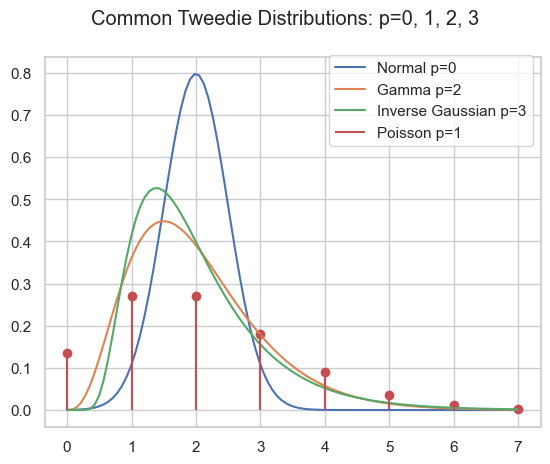

In [3]:
x = np.linspace(1e-10, 7, 100)
fig, ax = plt.subplots()
ax.plot(x, stats.norm(loc=2, scale=1/2).pdf(x), label="Normal p=0")
ax.plot(x, stats.gamma(a=4, scale=1/2).pdf(x), label="Gamma p=2")
ax.plot(x, stats.invgauss(mu=1/4, scale=8).pdf(x), label="Inverse Gaussian p=3")
x = np.arange(8)
ax.scatter(x, stats.poisson(mu=2).pmf(x), color="C3")
ax.vlines(x, 0, stats.poisson(mu=2).pmf(x), color="C3", label="Poisson p=1")
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
fig.suptitle("Common Tweedie Distributions: p=0, 1, 2, 3")
# fig.savefig("tweedie.png")

A special Tweedie distribution is the one *between* Poisson and Gamma, i.e. $1<p<2$.
This gives a distribution with point mass at zero and otherwise a continuous density on the positive axis.

In [4]:
from scipy.special import wright_bessel

def cpg_pmf(mu, phi, p):
    """Compound Poisson Gamma point mass at zero."""
    return np.exp(-np.power(mu, 2 - p) / (phi * (2 - p)))

def cpg_pdf(x, mu, phi, p):
    """Compound Poisson Gamma pdf."""
    if p == 1:
        theta = np.log(mu)
    else:
        theta = np.power(mu, 1 - p) / (1 - p)

    if p == 2:
        kappa = np.log(mu)
    else:
        kappa = np.power(mu, 2 - p) / (2 - p)

    alpha = (2 - p) / (1 - p)
    t = ((p - 1) * phi / x)**alpha
    t /= (2 - p) * phi
    a = 1 / x * wright_bessel(-alpha, 0, t)
    return a * np.exp((x * theta - kappa) / phi)

To make sure that we got the formulas right by checking that the integral over the pdf plus point mass at zero gives one.

In [5]:
from scipy.integrate import quad

mu, phi, p = 2, 0.3, 1.5
quad(cpg_pdf, 1e-9, 30, args=(mu, phi, p))[0] + cpg_pmf(mu, phi, p)

0.9999999999964442

Text(0.5, 0.98, 'Tweedie Distributions mu=2')

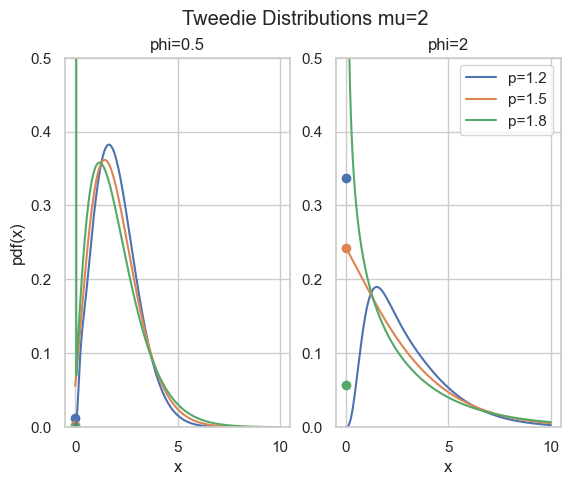

In [17]:
fig, axes = plt.subplots(ncols=2)
x = np.linspace(1e-9, 10, 200)
mu = 2
for p in [1.2, 1.5, 1.8]:
    for i, phi in enumerate([0.5, 2]):
        axes[i].plot(x, cpg_pdf(x=x, mu=mu, phi=phi, p=p), label=f"{p=}")
        axes[i].scatter(0, cpg_pmf(mu=mu, phi=phi, p=p))
        axes[i].set_ylim(0, 0.5)
        axes[i].set_title(f"{phi=}")
        if i > 0:
            axes[i].legend()
        else:
            axes[i].set_ylabel("pdf(x)")
        axes[i].set_xlabel("x")
fig.suptitle("Tweedie Distributions mu=2")

# Wright's Function

$\Phi(\rho, \beta, z) = \sum_{k=0}^{\infty} \frac{z^k}{k!\Gamma(\beta+\rho k)}, \rho > -1, \beta \in R, z \in C$

**Table of Contents<a id="toc"></a>:**
- [1. Series Definition with Arbitrary Precision via MPMATH](#series_mpmath)
- [2. Series Expansion with Finite Precision](#series)
- [3. Asymptotic Expansion](#asymptotic)
- [4. Integral Representation](#integral)
- [5. Taylor Series in rho - For small rho](#series_rho_small)
- [6. Taylor Series for large rho and large z](#series_rho_large)
- [7. Check Precision on Data Grid](#grid)

**Properties**

$\Phi(\rho, \beta, z)$ is an entire function. For positive, real arguments, it is monotonically increasing with increasing $z$ and with decreasing $\rho$ and $\beta$.

It has the following derivatives
$$\frac{\partial^n}{\partial z^n} \Phi(\rho, \beta, z) = \Phi(\rho, \beta + n \rho, z)$$
and the following recurrence relation
$$\Phi(\rho, \beta-1, z) = \rho z \Phi(\rho, \beta + \rho, z) + (\beta-1) \Phi(\rho, \beta, z)$$

**References:**
- https://dlmf.nist.gov/10.46
- Analytical properties and applicationsof the Wright functionRudolf GORENFLO, Yuri LUCHKO, Francesco MAINARDI, https://arxiv.org/pdf/math-ph/0701069.pdf
- On the function of E. M. Wright, R. Stankovic, Pub. L’Institut Math ́ematique18(1970) 113–124. http://elib.mi.sanu.ac.rs/files/journals/publ/30/13.pdf

Numerical Evaluation:
- Y. F. Luchko (2008), Algorithms for Evaluation of the Wright Function for the Real Arguments’ Values,<br>
  Fractional Calculus and Applied Analysis 11(1), https://eudml.org/doc/11309 or [direct link](http://sci-gems.math.bas.bg/jspui/bitstream/10525/1298/1/fcaa-vol11-num1-2008-57p-75p.pdf)

Asymptotic Expansion:
- E. M. Wright (1935), The asymptotic expansion of the generalized Bessel,<br>
  function. Proc. London Math. Soc. (2) 38, pp. 257–270. https://doi.org/10.1112/plms/s2-38.1.257
- R. B. Paris (2017), The asymptotics of the generalised Bessel function,<br>
  Mathematica Aeterna, Vol. 7, 2017, no. 4, 381 - 406, https://arxiv.org/abs/1711.03006
- Smoothing of Stokes' discontinuity for the generalized Bessel function I, R. Wong and Y.-Q. Zhao, https://doi.org/10.1098/rspa.1999.0365
- Smoothing of Stokes's discontinuity for the generalized Bessel function. II, R. Wong and Y.-Q. Zhao, https://doi.org/10.1098/rspa.1999.0440
- Exponentially small expansions of the Wright function on the Stokes lines, R. B. Paris, [direct link](https://rke.abertay.ac.uk/ws/portalfiles/portal/8558833/Paris_ExponentiallySmallExpansionsOfTheWrightFunction_Author_2014.pdf)
- Asymptotic and structural properties of special cases of the Wright function arising in probability theory, Richard B. Paris, https://arxiv.org/pdf/1508.00863.pdf

For Tweedie:
- Vinogradov, V., Paris, R.B. & Yanushkevichiene, O. New properties and representations for members of the power-variance family. I. Lith Math J 52, 444–461 (2012) doi:10.1007/s10986-012-9186-0, https://rke.abertay.ac.uk/files/8536176/Paris_NewPropertiesAndRepresentations_I_Author_2012.pdf
- Vinogradov, V., Paris, R.B. & Yanushkevichiene, O. New properties and representations for members of the power-variance family. II https://rke.abertay.ac.uk/ws/portalfiles/portal/8536555/Paris_NewPropertiesAndRepresentations_Author_2013.pdf


## 1. Series Definition with Arbitrary Precision via MPMATH <a id="series_mpmath"></a>
[back to TOC](#toc)

In [52]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.special as ss

import mpmath
import sympy
from sympy import Rational, S, symbols, gamma, digamma, polygamma, zeta, EulerGamma, pi, series
from sympy.printing.pycode import pycode

#plotting
import matplotlib.pyplot as plt
import seaborn as sns


plt.ion()
sns.set(style="whitegrid")

In [53]:
from functools import lru_cache

@lru_cache(maxsize=10_000)
def rgamma_cached(x, dps):
    with mpmath.workdps(dps):
        return mpmath.rgamma(x)

def Wright_Series_MPMATH(rho, beta, z, dps=20, method='r+s+e', **kwargs):
    """Compute Wright' generalized Bessel function as Series.
    
    This uses mpmath for arbitrary precision.
    """
    with mpmath.workdps(dps):
        res = mpmath.nsum(lambda k: z**k/mpmath.fac(k) * rgamma_cached(rho*k+beta, dps),
                          [0, mpmath.inf],
                          tol=dps, method=method, **kwargs
                          )
        res = sympy.Float(res)

    return res

In [54]:
Wright_Series_MPMATH(1, Rational(1, 2), 1, dps=20)

2.1225916201773919085

The larger $\rho$ or $\beta$ the smaller $\Phi$. For $\rho, \beta, x >= 0$:
$$\Phi(\rho,\beta, x) \leq \Phi(0, \beta, x) = \frac{\exp(x)}{\Gamma(\beta)}$$

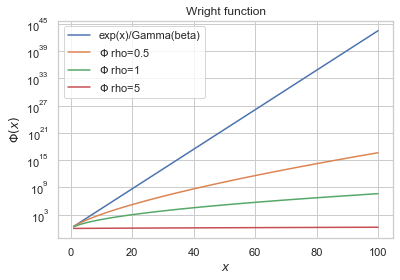

In [4]:
rho = 0.5
beta = 1
x = np.linspace(1, 100, num=100)
y = np.exp(x) * ss.rgamma(beta)
plt.plot(x, y, label='exp(x)/Gamma(beta)')

y = np.asarray([Wright_Series_MPMATH(rho, beta, z) for z in x])
plt.plot(x, y, label=f'$\Phi$ rho={rho}')

rho = 1
y = np.asarray([Wright_Series_MPMATH(rho, beta, z) for z in x])
plt.plot(x, y, label=f'$\Phi$ rho={rho}')

rho = 5
y = np.asarray([Wright_Series_MPMATH(rho, beta, z) for z in x])
plt.plot(x, y, label=f'$\Phi$ rho={rho}')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\Phi(x)$')
plt.yscale('log')
plt.title('Wright function')
plt.show()

## 2. Series Expansion with Finite Precision <a id="series"></a>
[back to TOC](#toc)

In [5]:
def Wright_Series(rho, beta, z, nstart=0, nstop=100, tol=1e-20):
    #if z == 0:
    #    return ss.rgamma(beta)
    #if rho == 0:
    #    return np.exp(z) * ss.rgamma(beta)
        
    # term k=nstart
    k = nstart
    zk_kk = np.power(z, k) * ss.rgamma(k+1)  # z^k/k!
    res = zk_kk * ss.rgamma(beta + rho*k)
    # term k=1,2,...
    for k in range(1, nstop):
        zk_kk *= z/float(k)
        rg = ss.rgamma(beta + rho*k)
        term = zk_kk * rg
        res += term
        if rg != 0 and term/res < tol:
            return res
        
    return res

def Wright_Series_Kahan(rho, beta, z, n=100, tol=1e-20):
    """Use Kahan Summation.
    
    https://en.wikipedia.org/wiki/Kahan_summation_algorithm
    """
    #if z == 0:
    #    return ss.rgamma(beta)
    #if rho == 0:
    #    return np.exp(z) * ss.rgamma(beta)
    
    # A running compensation for lost low-order bits.
    # for Kahan summation
    c = np.zeros_like(z)
    
    # term k=0
    res = ss.rgamma(beta)
    zk_kk = 1.  # z^k/k!
    # term k=1,2,...
    for k in range(1, n):
        zk_kk *= z/float(k)
        rg = ss.rgamma(beta + rho*k)
        term = zk_kk * rg
        # res += term
        # instead use Kahan summation
        y = term - c       # c is zero the first time around.
        t = res + y        # Alas, res is big, y small, so low-order digits of y are lost.
        c = (t - res) - y  # (t - res) cancels the high-order part of y; subtracting y recovers negative (low part of y)
        res = t            # Algebraically, c should always be zero. Beware overly-aggressive optimizing compilers!
        
        if rg != 0 and term/res < tol:
            return res
        
    return res

def Wright_Series_Shanks(rho, beta, z, n=100, tol=1e-20):
    """Use Shanks acceleration.
    
    https://en.wikipedia.org/wiki/Shanks_transformation
    Note: On top of Kahan summation
    """
    #if z == ss.rgamma(beta):
    #    return 0
    #if rho == 0:
    #    return np.exp(z) * ss.rgamma(beta)
    
    res = np.zeros((n,), dtype=float)
    # A running compensation for lost low-order bits.
    # for Kahan summation
    c = np.zeros_like(z)
    
    # term k=0
    res[0] = ss.rgamma(beta)
    zk_kk = 1.  # z^k/k!
    # term k=1,2,...
    for k in range(1, n):
        zk_kk *= z/float(k)
        rg = ss.rgamma(beta + rho*k)
        term = zk_kk * rg
        # res[k] = res[k-1] + term
        # instead use Kahan summation
        y = term - c            # c is zero the first time around.
        t = res[k-1] + y        # Alas, res is big, y small, so low-order digits of y are lost.
        c = (t - res[k-1]) - y  # (t - res) cancels the high-order part of y; subtracting y recovers negative (low part of y)
        res[k] = t              # Algebraically, c should always be zero. Beware overly-aggressive optimizing compilers!
        
    # S(A(n)) = A(n+1) - (A(n+1)-A(n))**2/((A(n+1)-A(n)) - (A(n)-A(n-1)))
    # A = res
    i = n-2
    numerator = ((res[i+1]-res[i]) - (res[i]-res[i-1]))
    if numerator == 0:
        return res[n-1]
    else:
        return res[i+1] - (res[i+1]-res[i])**2/numerator

In [6]:
Wright_Series_Shanks(rho=1, beta=0.5, z=1, n=10)

2.122591620177698

In [7]:
# Compare simple examples
rho = Rational(1, 100)
beta = Rational(1, 10)
z = 0.5

x1 = Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[100])

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstop=18, tol=0)
x3 = Wright_Series_Kahan(rho, beta, z, n=18, tol=0)
x4 = Wright_Series_Shanks(rho, beta, z, n=18-1, tol=0)

x2/x1 - 1, x3/x1 - 1, x4/x1 - 1

----------------------------------------------------------------------
Adding terms #0-#100
Direct error: 1.76935e-186


(-4.1536112595028781915449087256761020402325932745897e-16,
 4.1192640553474831029259250691085929039509324579933e-17,
 4.1192640553474831029259250691085929039509324579933e-17)

In [8]:
# Compare simple examples
rho = Rational(1, 1000)
beta = Rational(1, 100)
z = 1 - 1e-10

x1 = Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[100])

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstop=18, tol=0)
x3 = Wright_Series_Kahan(rho, beta, z, n=18, tol=0)
x4 = Wright_Series_Shanks(rho, beta, z, n=18-1, tol=0)

x2/x1 - 1, x3/x1 - 1, x4/x1 - 1

----------------------------------------------------------------------
Adding terms #0-#100
Direct error: 1.23229e-157


(-8.6799268165127919784724787003401946620461974842649e-17,
 -2.0210125925843003817567894331001419238025335937214e-16,
 1.4380471402147631699718352560982254757188550430852e-16)

In [9]:
# Compare simple examples
rho = Rational(1, 1000_000)
beta = Rational(1, 2)
z = 1

x1 = Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[100])

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstop=18, tol=0)
x2/x1 - 1

----------------------------------------------------------------------
Adding terms #0-#100
Direct error: 6.04652e-157


-1.9335229233693579009584215462238529365445702289341e-16

**MPMATH without steps argument would terminate early, after 10 summands.**
<br>
For $\rho,\beta >=0$ and $0<=z<=1$, 20 terms seem to be sufficient. 

In [10]:
# Compare simple examples
rho = Rational(1, 100)
beta = 100
z = 1

x1 = float(Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[1000], method='s'))

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstop=18, tol=1E-20)
x3 = Wright_Series_Kahan(rho, beta, z, n=18, tol=1E-20)
x4 = Wright_Series_Shanks(rho, beta, z, n=18-1, tol=1E-20)

x2/x1 - 1, x3/x1 - 1, x4/x1 - 1

----------------------------------------------------------------------
Adding terms #0-#1000
Direct error: 0.0


(-1.6764367671839864e-14, -1.6542323066914832e-14, -1.709743457922741e-14)

In [11]:
rho = Rational(1, 1000)
beta = 100
z = 2

x1 = float(Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[2000]))

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstop=20, tol=0)
x3 = Wright_Series_Kahan(rho, beta, z, n=20, tol=0)
x4 = Wright_Series_Shanks(rho, beta, z, n=20, tol=0)

x2/x1 - 1, x3/x1 - 1, x4/x1 - 1

----------------------------------------------------------------------
Adding terms #0-#2000
Direct error: 0.0


(-3.419486915845482e-14, -3.430589146091734e-14, -3.430589146091734e-14)

special case rho=1 => Modified Bessel function of the first kind of real order
<br>
`iv(v, z) = (1/2*z)**v * Phi(rho=1, beta=v+1, 1/4*z**2)`

In [12]:
beta = 1e-06
x = 1e-06
v = beta - 1
np.power(0.5*x, v) * Wright_Series(1, 1+v, 1/4*x**2), ss.iv(v, x), mpmath.besseli(v, x)

(1.9999726373588365, 1.9999726373712479, mpf('1.9999726373588362'))

In [13]:
y1 = ss.iv(v, x)
y2 = np.power(0.5*x, v) * Wright_Series(1, 1+v, 1/4*x**2)
y2 / y1 - 1

-6.2058136407472375e-12

In [14]:
ss.iv(v, x) / mpmath.besseli(v, x)-1

mpf('6.2059246630497e-12')

In [15]:
beta = 0
x = 10
v = beta - 1

y1 = np.power(0.5*x, v) * Wright_Series_MPMATH(1, 1+v, 1/4*x**2, steps=[1000])
y2 = np.power(0.5*x, v) * Wright_Series(1, 1+v, 1/4*x**2, nstop=18, tol=0)
y3 = ss.iv(v, x)
y2/y1-1, y3/y1-1

(-5.1590817900255944630e-10, -2.4299765894126093557e-16)

In [16]:
ss.iv(v, x)

2670.988303701254

In [17]:
rho = 2
beta = 0.145
z = 1000

x1 = Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[100])

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstart=0, nstop=18, tol=0)

float(x2/x1 - 1)

----------------------------------------------------------------------
Adding terms #0-#100
Direct error: 0.0


-1.043698698358907e-10

In [18]:
rho = 1e-5
beta = 100
z = 1000

x1 = Wright_Series_MPMATH(rho, beta, z, dps=50, verbose=True, steps=[2000], method='s')

rho = float(rho)
beta = float(beta)
z = float(z)
x2 = Wright_Series(rho, beta, z, nstart=0, nstop=18, tol=0)

float(x1), float(x2/x1 - 1)

----------------------------------------------------------------------
Adding terms #0-#2000
Direct error: 5.89438e+108
Shanks error: 7.20819e+244


(2.016045087243279e+278, -1.0)

In [19]:
z+beta-(z-1/2)*np.log(z)

-5804.3014013426455

## 3. Asymptotic Expansion <a id="asymptotic"></a>
[back to TOC](#toc)

Implementation according to Wright (1935), for $z=x > 0$, $\rho > 0$:
$$Z = (\rho x)^{\frac{1}{1+\rho}}$$
$$\Phi(\rho, \beta, x) \sim H(Z)$$
$$H(Z) = Z^{\frac{1}{2}-\beta} e^{\frac{1+\rho}{\rho}Z} \sum_{k=0} \frac{(-1)^k a_k}{Z^k}$$
$$a_0 = \frac{1}{\sqrt{2\pi(1+\rho)}}$$
See also R. B. Paris (2017) with different notation:
$$\bar{Z} = (1+\rho)(\rho^{-\rho}x)^{\frac{1}{1+\rho}} = \frac{1+\rho}{\rho} Z$$
$$\Phi(\rho, \beta, x) \sim \bar{Z}^{\frac{1}{2}-\beta} e^{\bar{Z}} \sum_{k=0} \frac{A_k}{\bar{Z}^k}$$
$$A_k = A_0 c_k$$
$$A_0 = \left(\frac{\rho}{1+\rho}\right)^{\frac{1}{2}-\beta} a_0$$
$$a_k = (-1)^k \cdot \left(\frac{1+\rho}{\rho}\right)^{\frac{1}{2}-\beta-k} \cdot A_k
= a_0 \cdot \left(-\frac{\rho}{1+\rho}\right)^{k} \cdot c_k$$
The coefficients $c_k$ are given in Paris (2017) up to $c_3$.

### 3.1 Compute Coefficients of Asymptotic Expansion

In [20]:
v, m, rho, beta = symbols("v m rho beta")

class g(sympy.Function):
    nargs = 3

    @classmethod
    def eval(cls, n, rho, v):
        if not n >= 0:
            raise ValueError("must have n >= 0")
        
        if n == 0:
            return 1
        else:
            return g(n-1, rho,v) + sympy.gammasimp(gamma(rho+2+n)/gamma(rho+2)) \
                               / sympy.gammasimp(gamma(3+n)/gamma(3))*v**n

g(3, rho, v) - (1 + (rho+2)/S(3) * v \
                + ((rho+2)*(rho+3))/S(3*4) * v**2 \
                + ((rho+2)*(rho+3)*(rho+4))/S(3*4*5) * v**3)

0

In [21]:
class a(sympy.Function):
    nargs = 3
    
    @classmethod
    def eval(cls, m, rho, beta):
        if not m >= 0:
            raise ValueError("must have m >= 0")
        
        v = symbols("v")
        expression = (1-v)**(-beta) * g(2*m, rho, v)**(-m-Rational(1, 2))
        res = expression.diff(v, 2*m).subs(v, 0)/sympy.factorial(2*m)
        res = res * (gamma(m + Rational(1, 2)) / (2*pi) * (2/(rho+1))**(m + Rational(1, 2)))
        return res

In [22]:
expression = (1-v)**(-beta) * g(2*1, rho, v)**(-1-Rational(1, 2))

In [23]:
a0 = a(0, rho, beta)
a0

sqrt(2)*sqrt(1/(rho + 1))/(2*sqrt(pi))

In [24]:
a1 = a(1, rho, beta)
a1

sqrt(2)*(beta*(beta + 1)/2 - beta*(2*rho + 4)/4 - (rho + 2)*(rho + 3)/8 + 5*(2*rho + 4)**2/96)*(1/(rho + 1))**(3/2)/(2*sqrt(pi))

In [25]:
(a1/( a0 / (24*(rho+1))) - ((2*rho+1)*(2+rho)-12*beta*(1+rho-beta))).simplify()

0

In [26]:
a2 = a(2, rho, beta)
a2

3*sqrt(2)*(-beta*(beta + 1)*(30*(rho + 2)*(rho + 3) - 7*(60*rho + 120)**2/360)/288 - beta*(60*rho + 120)*(beta**2 + 3*beta + 2)/432 - beta*(6*(rho + 2)*(rho + 3)*(rho + 4) - 7*(rho + 2)*(rho + 3)*(60*rho + 120)/12 + 7*(60*rho + 120)**3/43200)/144 + beta*(beta**3 + 6*beta**2 + 11*beta + 6)/24 + 35*(rho + 2)**2*(rho + 3)**2/1152 - (rho + 2)*(rho + 3)*(rho + 4)*(rho + 5)/144 + 7*(rho + 2)*(rho + 3)*(rho + 4)*(60*rho + 120)/8640 - 7*(rho + 2)*(rho + 3)*(60*rho + 120)**2/138240 + 77*(60*rho + 120)**4/8957952000)*(1/(rho + 1))**(5/2)/(2*sqrt(pi))

In [27]:
(a2 / (a0 / (1152*(rho+1)**2)) - \
 ((2+rho)*(1+2*rho)*(2-19*rho+2*rho**2) \
  + 24*beta*(1+rho)*(2+7*rho-6*rho**2) \
  - 24*beta**2*(4-5*rho-20*rho**2)-96*beta**3*(1+5*rho)+144*beta**4)).simplify()

0

In [28]:
%%time
a3 = a(3, rho, beta)
a3

CPU times: user 3.43 s, sys: 3.79 ms, total: 3.43 s
Wall time: 3.43 s


15*sqrt(2)*(beta*(beta + 1)*(1260*(rho + 2)**2*(rho + 3)**2 - 224*(rho + 2)*(rho + 3)*(rho + 4)*(rho + 5) + 3*(rho + 2)*(rho + 3)*(rho + 4)*(3360*rho + 6720)/5 - 11*(rho + 2)*(rho + 3)*(3360*rho + 6720)**2/13440 + 143*(3360*rho + 6720)**4/2731180032000)/46080 - beta*(3360*rho + 6720)*(beta**4 + 10*beta**3 + 35*beta**2 + 50*beta + 24)/345600 - beta*(1680*(rho + 2)*(rho + 3) - (3360*rho + 6720)**2/2240)*(beta**3 + 6*beta**2 + 11*beta + 6)/138240 - beta*(beta**2 + 3*beta + 2)*(336*(rho + 2)*(rho + 3)*(rho + 4) - 3*(rho + 2)*(rho + 3)*(3360*rho + 6720)/4 + 11*(3360*rho + 6720)**3/135475200)/34560 + beta*(beta**5 + 15*beta**4 + 85*beta**3 + 225*beta**2 + 274*beta + 120)/720 - beta*(-504*(rho + 2)**2*(rho + 3)**2*(rho + 4) + 11*(rho + 2)**2*(rho + 3)**2*(3360*rho + 6720)/16 + 32*(rho + 2)*(rho + 3)*(rho + 4)*(rho + 5)*(rho + 6) - (rho + 2)*(rho + 3)*(rho + 4)*(rho + 5)*(3360*rho + 6720)/10 + 11*(rho + 2)*(rho + 3)*(rho + 4)*(3360*rho + 6720)**2/67200 - 143*(rho + 2)*(rho + 3)*(3360*rho + 672

In [29]:
(a3 / (a0 / (414720*(rho+1)**3)) - \
 (8640*beta**6 - 8640*beta**5*(7*rho - 1) + 10800*beta**4*(14*rho**2 - 7*rho - 2) \
  - 1440*beta**3*(112*rho**3 - 147*rho**2 - 63*rho + 8) \
  + 180*beta**2*(364*rho**4 - 1288*rho**3 - 567*rho**2 + 392*rho + 76) \
  - 180*beta*(rho+1)*(20*rho**4 - 516*rho**3 + 417*rho**2 + 172*rho - 12) \
  - (rho + 2)*(2*rho + 1)*(556*rho**4 + 1628*rho**3 - 9093*rho**2 + 1628*rho + 556))).simplify()

0

In [30]:
%%time
a4 = a(4, rho, beta)

CPU times: user 18.2 s, sys: 21.2 ms, total: 18.2 s
Wall time: 18.3 s


In [31]:
tmp = (a4 / (a0 / (39813120*(rho+1)**4))).simplify().collect(beta, sympy.factor)
pycode(tmp)

'103680*beta**8 - 414720*beta**7*(3*rho - 1) + 725760*beta**6*rho*(8*rho - 7) - 48384*beta**5*(274*rho**3 - 489*rho**2 + 39*rho + 26) + 30240*beta**4*(500*rho**4 - 1740*rho**3 + 495*rho**2 + 340*rho - 12) - 2880*beta**3*(2588*rho**5 - 19780*rho**4 + 14453*rho**3 + 9697*rho**2 - 1892*rho - 404) + 48*beta**2*(11488*rho**6 - 547836*rho**5 + 1007484*rho**4 + 593353*rho**3 - 411276*rho**2 - 114396*rho + 4288) + 48*beta*(rho + 1)*(7784*rho**6 + 48180*rho**5 - 491202*rho**4 + 336347*rho**3 + 163734*rho**2 - 28908*rho - 5560) - (rho + 2)*(2*rho + 1)*(4568*rho**6 - 226668*rho**5 - 465702*rho**4 + 2013479*rho**3 - 465702*rho**2 - 226668*rho + 4568)'

In [32]:
%%time
a5 = a(5, rho, beta)

CPU times: user 1min 32s, sys: 140 ms, total: 1min 32s
Wall time: 1min 33s


In [33]:
tmp = (a5 / (a0 / (6688604160*(rho+1)**5))).simplify().collect(beta, sympy.factor)
pycode(tmp)

'1741824*beta**10 - 2903040*beta**9*(11*rho - 5) + 2177280*beta**8*(110*rho**2 - 121*rho + 14) - 580608*beta**7*(1628*rho**3 - 3333*rho**2 + 1023*rho + 52) + 169344*beta**6*(12364*rho**4 - 43648*rho**3 + 26763*rho**2 + 1232*rho - 788) - 24192*beta**5*(104852*rho**5 - 646624*rho**4 + 721391*rho**3 - 16841*rho**2 - 74096*rho + 148) + 2016*beta**4*(710248*rho**6 - 8878716*rho**5 + 17928834*rho**4 - 3333407*rho**3 - 4339566*rho**2 + 287364*rho + 89128) - 1344*beta**3*(87824*rho**7 - 7150220*rho**6 + 29202756*rho**5 - 15113527*rho**4 - 14223011*rho**3 + 3462492*rho**2 + 1137092*rho - 18896) - 84*beta**2*(1690480*rho**8 + 14139136*rho**7 - 232575464*rho**6 + 296712592*rho**5 + 215856619*rho**4 - 152181392*rho**3 - 47718440*rho**2 + 5813632*rho + 943216) + 84*beta*(rho + 1)*(82224*rho**8 - 5628896*rho**7 - 26466520*rho**6 + 168779208*rho**5 - 104808005*rho**4 - 56259736*rho**3 + 15879912*rho**2 + 4020640*rho - 63952) + (rho + 2)*(2*rho + 1)*(2622064*rho**8 + 12598624*rho**7 - 167685080*rho**6

In [34]:
%%time
a6 = a(6, rho, beta)

CPU times: user 9min 43s, sys: 930 ms, total: 9min 44s
Wall time: 6h 35min 54s


In [35]:
tmp = (a6 / (a0 / (4815794995200*(rho+1)**6))).simplify().collect(beta, sympy.factor)
pycode(tmp)

'104509440*beta**12 - 209018880*beta**11*(13*rho - 7) + 574801920*beta**10*(52*rho**2 - 65*rho + 12) - 63866880*beta**9*(2834*rho**3 - 6279*rho**2 + 2769*rho - 134) + 23950080*beta**8*(27404*rho**4 - 98228*rho**3 + 78663*rho**2 - 10868*rho - 1012) - 13685760*beta**7*(105612*rho**5 - 599196*rho**4 + 791843*rho**3 - 224913*rho**2 - 27612*rho + 4540) + 2661120*beta**6*(693680*rho**6 - 6473532*rho**5 + 13736424*rho**4 - 7047469*rho**3 - 723840*rho**2 + 471588*rho + 7376) - 2661120*beta**5*(432536*rho**7 - 7850804*rho**6 + 27531114*rho**5 - 24234457*rho**4 - 703001*rho**3 + 3633474*rho**2 - 36244*rho - 45128) + 166320*beta**4*(548912*rho**8 - 75660832*rho**7 + 502902712*rho**6 - 764807992*rho**5 + 91248287*rho**4 + 217811464*rho**3 - 20365384*rho**2 - 9776416*rho + 37936) + 10080*beta**3*(18759728*rho**9 + 165932208*rho**8 - 4710418440*rho**7 + 13686052536*rho**6 - 5456818809*rho**5 - 6834514245*rho**4 + 1919299512*rho**3 + 752176152*rho**2 - 45661200*rho - 8616848) - 360*beta**2*(32743360*

In [36]:
%%time
a7 = a(7, rho, beta)

CPU times: user 48min 32s, sys: 1.79 s, total: 48min 34s
Wall time: 1h 25min 23s


In [41]:
tmp = (a7 / (a0 / (115579079884800*(rho+1)**7))).simplify().collect(beta, sympy.factor)
pycode(tmp)

'179159040*beta**14 - 1254113280*beta**13*(5*rho - 3) + 1358622720*beta**12*(70*rho**2 - 95*rho + 22) - 905748480*beta**11*(904*rho**3 - 2109*rho**2 + 1119*rho - 112) + 1245404160*beta**10*(3532*rho**4 - 12824*rho**3 + 11829*rho**2 - 2824*rho + 44) - 59304960*beta**9*(256820*rho**5 - 1397680*rho**4 + 2025545*rho**3 - 869495*rho**2 + 52000*rho + 8788) + 14826240*beta**8*(2274536*rho**6 - 18601572*rho**5 + 40698318*rho**4 - 28230079*rho**3 + 3916398*rho**2 + 832668*rho - 65176) - 59304960*beta**7*(760224*rho**7 - 9849164*rho**6 + 32495784*rho**5 - 34813869*rho**4 + 9175207*rho**3 + 1898688*rho**2 - 469788*rho - 13184) + 25945920*beta**6*(1167504*rho**8 - 28779840*rho**7 + 149752856*rho**6 - 246026112*rho**5 + 111944073*rho**4 + 18341600*rho**3 - 12131496*rho**2 - 274368*rho + 102800) - 157248*beta**5*(12341872*rho**9 - 3122991216*rho**8 + 29900054232*rho**7 - 78024816720*rho**6 + 58914656739*rho**5 + 4637150811*rho**4 - 11523402480*rho**3 + 236218968*rho**2 + 337923216*rho + 1592048) - 2

### 3.2 Resummation

**Highest term in $\beta$ are**
- $a_1 = \frac{1}{2} \beta^2 \frac{a_0}{\rho+1}$
- $a_2 = \frac{1}{8} \beta^4 \frac{a_0}{(\rho+1)^2}$
- $a_3 = \frac{1}{48} \beta^6 \frac{a_0}{(\rho+1)^3}$
- $a_4 = \frac{1}{384} \beta^8 \frac{a_0}{(\rho+1)^4}$
- $a_5 = \frac{1}{3840} \beta^{10} \frac{a_0}{(\rho+1)^5}$
- $a_k = \frac{1}{(2k)!!} \beta^{2k} \frac{a_0}{(\rho+1)^k}
= \frac{1}{2^k k!} \beta^{2k} \frac{a_0}{(\rho+1)^k}$, where we used $(2k)!! = 2^k k!$.

We can sum up the highest term in $\beta$:
$$\sum_{k=0} \frac{(-1)^k a_k}{Z^k}
= a_0 \sum_{k=0} \frac{(-1)^k \beta^{2k}}{2^k (k!) (\rho+1)^k Z^k} + \sum_{k=0} \frac{(-1)^k a_k^{red}}{Z^k}
= a_0 \sum_{k=0} \frac{1}{k!} \left(-\frac{\beta^2}{2 (\rho+1) Z}\right)^k + \sum_{k=0} \frac{(-1)^k a_k^{red}}{Z^k}
= a_0 \exp\left(-\frac{\beta^2}{2 (\rho+1) Z}\right) + \sum_{k=0} \frac{(-1)^k a_k^{red}}{Z^k}$$

In [68]:
display((a1/a0*(rho+1)).expand().coeff(beta, 2).simplify(),
        (a2/a0*(rho+1)**2).expand().coeff(beta, 4).simplify(),
        (a3/a0*(rho+1)**3).expand().coeff(beta, 6).simplify(),
        (a4/a0*(rho+1)**4).expand().coeff(beta, 8).simplify())

1/2

1/8

1/48

1/384

In [69]:
Z, rho, beta = symbols("Z rho beta")
expression = sympy.exp(-beta**2/(2*(rho+1)*Z))
expression.series(beta, 0, n=2*6+1).removeO().collect(beta, func=sympy.factor)

1 - beta**2/(2*Z*(rho + 1)) + beta**4/(8*Z**2*(rho + 1)**2) - beta**6/(48*Z**3*(rho + 1)**3) + beta**8/(384*Z**4*(rho + 1)**4) - beta**10/(3840*Z**5*(rho + 1)**5) + beta**12/(46080*Z**6*(rho + 1)**6)

In [86]:
# Test equivalence of resummed series up to a4/Z^4
expression = 1 - a1/Z + a2/Z**2 - a3/Z**3 + a4/Z**4
expression_resummed = (a0 * sympy.exp(-beta**2/(2*(rho+1)*Z))
                       + expression
                       - a0 * (1
                               - 1/S(2)    * beta**2/(Z*(rho + 1))
                               + 1/S(8)    * beta**4/(Z**2*(rho + 1)**2)
                               - 1/S(48)   * beta**6/(Z**3*(rho + 1)**3)
                               + 1/S(384)  * beta**8/(Z**4*(rho + 1)**4)
                              )
                      )
sympy.series(expression_resummed - expression, beta, 0, n=12).collect(Z, func=sympy.simplify)

(-sqrt(2)*beta**10*sqrt(1/(rho + 1)) + O(beta**12))/(7680*sqrt(pi)*Z**5*(rho**5 + 5*rho**4 + 10*rho**3 + 10*rho**2 + 5*rho + 1))

**Highest term in $\rho$ are**
- $a_1 = \frac{(1+\rho^0)}{48}  (2\rho+1)(2+\rho) \frac{a_0}{\rho+1}$
- $a_2 = \frac{(1+\rho^2)}{576} (2\rho+1)(2+\rho) \frac{a_0}{(\rho+1)^2}$
- $a_3 = -\frac{139(1+\rho^4)}{103680} (2\rho+1)(2+\rho) \frac{a_0}{(\rho+1)^3}$
- $a_4 = -\frac{571(1+\rho^6)}{4976640} (2\rho+1)(2+\rho) \frac{a_0}{(\rho+1)^4}$
- $a_5 = \frac{163879(1+\rho^8)}{418037760} (2\rho+1)(2+\rho) \frac{a_0}{(\rho+1)^5}$
- $a_6 = \frac{5246819(1+\rho^10)}{150493593600} (2\rho+1)(2+\rho) \frac{a_0}{(\rho+1)^6}$
- $a_k = ?$.

No pattern recognizable.

In [37]:
Rational(1, 48), Rational(2, 1152), Rational(556, 414720), Rational(4568, 39813120), \
Rational(2622064, 6688604160), Rational(167898208, 4815794995200)

(1/48, 1/576, 139/103680, 571/4976640, 163879/418037760, 5246819/150493593600)

In [38]:
Rational(1,      2**4   * 3), \
Rational(1,      2**6   * 3**2), \
Rational(139,    2**8   * 3**4 * 5), \
Rational(571,    2**12  * 3**5 * 5), \
Rational(163879, 2**14  * 3**6 * 5    * 7), \
Rational(5246819, 2**17 * 3**8 * 5**2 * 7)

(1/48, 1/576, 139/103680, 571/4976640, 163879/418037760, 5246819/150493593600)

In [39]:
sympy.ntheory.primetest.isprime(139), \
sympy.ntheory.primetest.isprime(571), \
sympy.ntheory.primetest.isprime(163879)

(True, True, False)

In [40]:
[Rational(1, 48) / Rational(1, 576),
 Rational(1, 576) / Rational(2, 1152),
 Rational(2, 1152)/ Rational(556, 414720),
 Rational(556, 414720) / Rational(4568, 39813120),
 Rational(4568, 39813120) / Rational(2622064, 6688604160)]

[12, 1, 180/139, 6672/571, 47964/163879]

### 3.3 Zeros of Coefficients

In [58]:
# zero of a1
# we are only interested in positive rho and beta
rho, beta = symbols("rho beta")
expression = (a1 / (a0 / (24 * (rho+1)))).simplify()
sympy.solve(expression, beta)

[rho/2 - sqrt(3*rho**2 + 3*rho + 3)/6 + 1/2,
 rho/2 + sqrt(3*rho**2 + 3*rho + 3)/6 + 1/2]

In [59]:
a1.subs(beta, rho/2 + sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).simplify()

0

In [60]:
expression = a2.subs(beta, rho/2 + sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).simplify()
sympy.solve(expression, rho)

[-2, -1/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [61]:
expression = a2.subs(beta, rho/2 - sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).simplify()
sympy.solve(expression, rho)

[-2, -1/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

In [62]:
expression = a3.subs(beta, rho/2 + sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).simplify()
sympy.solve(expression, rho)

[-2,
 -1/2,
 1,
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 2)]

In [63]:
expression = a3.subs(beta, rho/2 - sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).simplify()
sympy.solve(expression, rho)

[-2,
 -1/2,
 1,
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 0),
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 1),
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 3),
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 4),
 CRootOf(4*rho**6 - 28*rho**5 - 4723*rho**4 - 4906*rho**3 - 4723*rho**2 - 28*rho + 4, 5)]

In [64]:
(rho/2 + sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).subs(rho, 1), \
(rho/2 - sympy.sqrt(3*rho**2 + 3*rho + 3)*Rational(1,6) + Rational(1,2)).subs(rho, 1)

(3/2, 1/2)

In [123]:
[a1.subs(rho, 1).subs(beta, Rational(1, 2)),
 a2.subs(rho, 1).subs(beta, Rational(1, 2)),
 a3.subs(rho, 1).subs(beta, Rational(1, 2)),
 a4.subs(rho, 1).subs(beta, Rational(1, 2)),
 a5.subs(rho, 1).subs(beta, Rational(1, 2)),
 a6.subs(rho, 1).subs(beta, Rational(1, 2)),
 a7.subs(rho, 1).subs(beta, Rational(1, 2)),
]

[0, 0, 0, 0, 0, 0, 0]

In [149]:
rho, beta = symbols("rho beta")
a1.subs(rho, 1).simplify()

(4*beta**2 - 8*beta + 3)/(32*sqrt(pi))

In [144]:
# Zero of a1: rho= 1 and beta in [1/2, 3/2]
(a1.subs(rho, 1) - (beta - Rational(1,2)) * (beta - Rational(3,2))/sympy.sqrt(2**6*sympy.pi)).simplify()

0

In [158]:
# Zero of a2: rho= 1 and beta in [1/2, 3/2, 5/2, -1/2]
(a2.subs(rho, 1).simplify() - (beta - Rational(1,2)) * (beta - Rational(3,2)) * (beta - Rational(5,2)) * (beta + Rational(1,2))/sympy.sqrt(2**12*sympy.pi)).simplify()

0

In [166]:
# Zero of a3: rho= 1 and beta in [1/2, 3/2, 5/2, 7/2, -1/2, -3/2]
(a3.subs(rho, 1).simplify() / ((beta - Rational(1,2))
                               * (beta - Rational(3,2))
                               * (beta - Rational(5,2))
                               * (beta - Rational(7,2))
                               * (beta + Rational(1,2))
                               * (beta + Rational(3,2))
                               * 1/S(6)/sympy.sqrt(2**14*sympy.pi))).simplify()

1

We find that $a_k = 0$ for $k \geq 1$ if:
- $\rho = 1$ and
- $\beta = \frac{1}{2}$ or $\beta = \frac{3}{2}$.

Furthermore, $a_k = 0$ for $k \geq 1$ with $\rho = 1$ has the roots in $\beta$
- $k=1$: $\beta \in \{\frac{1}{2}, \frac{3}{2}\}$
- $k=2$: $\beta \in \{\frac{1}{2}, \frac{3}{2}, \frac{5}{2}, -\frac{1}{2}\}$
- $k=3$: $\beta \in \{\frac{1}{2}, \frac{3}{2}, \frac{5}{2}, \frac{7}{2} -\frac{1}{2}, -\frac{3}{2}\}$

For $\rho=0$ we have:
- $a_1 = \frac{1}{2^3\sqrt{\pi}} (\beta - \frac{1}{2}) (\beta - \frac{3}{2})$
- $a_2 = \frac{1}{2^{6}\sqrt{\pi}} (\beta - \frac{1}{2}) (\beta - \frac{3}{2}) (\beta - \frac{5}{2}) (\beta + \frac{1}{2})$
- $a_3 = \frac{1}{6\cdot 2^{7}\sqrt{\pi}} (\beta - \frac{1}{2}) (\beta - \frac{3}{2}) (\beta - \frac{5}{2}) (\beta - \frac{7}{2}) (\beta + \frac{1}{2}) (\beta + \frac{3}{2})$

### 3.4 Implementation of Asymptotic Expansion

In [7]:
# as in Wright
def H(Z, rho, beta, order=4, verbose=False):
    a0 = 1./np.sqrt(2. * np.pi * (rho+1))
    
    a1 = a0 / (24 * (rho+1))
    a1 *= (2*rho+1)*(2+rho)-12*beta*(1+rho-beta)
    
    a2 = a0 / (1152 * (rho+1)**2)
    a2 *= ((2+rho)*(1+2*rho)*(2-19*rho+2*rho**2) \
          + 24*beta*(1+rho)*(2+7*rho-6*rho**2) \
          - 24*beta**2*(4-5*rho-20*rho**2)-96*beta**3*(1+5*rho)+144*beta**4)
    
    a3 = a0 / (414720*(rho+1)**3)
    a3 *= 8640*beta**6 - 8640*beta**5*(7*rho - 1) + 10800*beta**4*(14*rho**2 - 7*rho - 2) \
        - 1440*beta**3*(112*rho**3 - 147*rho**2 - 63*rho + 8) \
        + 180*beta**2*(364*rho**4 - 1288*rho**3 - 567*rho**2 + 392*rho + 76) \
        - 180*beta*(rho+1)*(20*rho**4 - 516*rho**3 + 417*rho**2 + 172*rho - 12) \
        - (rho + 2)*(2*rho + 1)*(556*rho**4 + 1628*rho**3 - 9093*rho**2 + 1628*rho + 556)
    
    a4 = a0 / (39813120*(rho+1)**4)
    a4 *= 103680*beta**8 - 414720*beta**7*(3*rho - 1) + 725760*beta**6*rho*(8*rho - 7) \
        - 48384*beta**5*(274*rho**3 - 489*rho**2 + 39*rho + 26) \
        + 30240*beta**4*(500*rho**4 - 1740*rho**3 + 495*rho**2 + 340*rho - 12) \
        - 2880*beta**3*(2588*rho**5 - 19780*rho**4 + 14453*rho**3 + 9697*rho**2 - 1892*rho - 404) \
        + 48*beta**2*(11488*rho**6 - 547836*rho**5 + 1007484*rho**4 + 593353*rho**3 - 411276*rho**2 \
                      - 114396*rho + 4288) \
        + 48*beta*(rho + 1)*(7784*rho**6 + 48180*rho**5 - 491202*rho**4 + 336347*rho**3 \
                             + 163734*rho**2 - 28908*rho - 5560) \
        - (rho + 2)*(2*rho + 1)*(4568*rho**6 - 226668*rho**5 - 465702*rho**4 + 2013479*rho**3 \
                                 - 465702*rho**2 - 226668*rho + 4568)
    
    a5 = a0 / (6688604160.*(rho+1)**5)
    a5 *= 1741824*beta**10 - 2903040*beta**9*(11*rho - 5) + 2177280*beta**8*(110*rho**2 - 121*rho + 14) \
        - 580608*beta**7*(1628*rho**3 - 3333*rho**2 + 1023*rho + 52) \
        + 169344*beta**6*(12364*rho**4 - 43648*rho**3 + 26763*rho**2 + 1232*rho - 788) \
        - 24192*beta**5*(104852*rho**5 - 646624*rho**4 + 721391*rho**3 - 16841*rho**2 - 74096*rho + 148) \
        + 2016*beta**4*(710248*rho**6 - 8878716*rho**5 + 17928834*rho**4 - 3333407*rho**3 \
                        - 4339566*rho**2 + 287364*rho + 89128) \
        - 1344*beta**3*(87824*rho**7 - 7150220*rho**6 + 29202756*rho**5 - 15113527*rho**4 \
                        - 14223011*rho**3 + 3462492*rho**2 + 1137092*rho - 18896) \
        - 84*beta**2*(1690480*rho**8 + 14139136*rho**7 - 232575464*rho**6 + 296712592*rho**5 \
                      + 215856619*rho**4 - 152181392*rho**3 - 47718440*rho**2 + 5813632*rho + 943216) \
        + 84*beta*(rho + 1)*(82224*rho**8 - 5628896*rho**7 - 26466520*rho**6 + 168779208*rho**5 \
                             - 104808005*rho**4 - 56259736*rho**3 + 15879912*rho**2 + 4020640*rho - 63952) \
        + (rho + 2)*(2*rho + 1)*(2622064*rho**8 + 12598624*rho**7 - 167685080*rho**6 - 302008904*rho**5 \
                                 + 1115235367*rho**4 - 302008904*rho**3 - 167685080*rho**2 + 12598624*rho + 2622064)
    
    a6 = a0 / (4815794995200.*(rho+1)**6)
    a6 *= 104509440*beta**12 - 209018880*beta**11*(13*rho - 7) \
        + 574801920*beta**10*(52*rho**2 - 65*rho + 12) \
        - 63866880*beta**9*(2834*rho**3 - 6279*rho**2 + 2769*rho - 134) \
        + 23950080*beta**8*(27404*rho**4 - 98228*rho**3 + 78663*rho**2 - 10868*rho - 1012) \
        - 13685760*beta**7*(105612*rho**5 - 599196*rho**4 + 791843*rho**3 - 224913*rho**2 - 27612*rho + 4540) \
        + 2661120*beta**6*(693680*rho**6 - 6473532*rho**5 + 13736424*rho**4 - 7047469*rho**3 \
                           - 723840*rho**2 + 471588*rho + 7376) \
        - 2661120*beta**5*(432536*rho**7 - 7850804*rho**6 + 27531114*rho**5 - 24234457*rho**4 \
                           - 703001*rho**3 + 3633474*rho**2 - 36244*rho - 45128) \
        + 166320*beta**4*(548912*rho**8 - 75660832*rho**7 + 502902712*rho**6 - 764807992*rho**5 \
                          + 91248287*rho**4 + 217811464*rho**3 - 20365384*rho**2 - 9776416*rho + 37936) \
        + 10080*beta**3*(18759728*rho**9 + 165932208*rho**8 - 4710418440.*rho**7 + 13686052536.*rho**6 \
                         - 5456818809.*rho**5 - 6834514245.*rho**4 + 1919299512*rho**3 + 752176152*rho**2 \
                         - 45661200*rho - 8616848) \
        - 360*beta**2*(32743360*rho**10 - 3381871792.*rho**9 - 21488827776.*rho**8 + 200389923864.*rho**7 \
                       - 198708005340.*rho**6 - 171633799779.*rho**5 + 123124874028.*rho**4 \
                       + 40072774872.*rho**3 - 9137993280.*rho**2 - 1895843248*rho + 18929728) \
        - 360*beta*(rho + 1)*(57685408*rho**10 + 406929456*rho**9 - 6125375760.*rho**8 \
                              - 27094918920.*rho**7 + 128752249410.*rho**6 - 74866710561.*rho**5 \
                              - 42917416470.*rho**4 + 16256951352.*rho**3 + 4375268400.*rho**2 \
                              - 316500688*rho - 47197152) \
        + (rho + 2)*(2*rho + 1)*(167898208*rho**10 - 22774946512.*rho**9 - 88280004528.*rho**8 \
                                 + 611863976472.*rho**7 + 1041430242126.*rho**6 - 3446851131657.*rho**5 \
                                 + 1041430242126.*rho**4 + 611863976472.*rho**3 - 88280004528.*rho**2 \
                                 - 22774946512.*rho + 167898208)
    
    a7 = a0 / (115579079884800.*(rho+1)**7)
    a7 *= (179159040*beta**14 - 1254113280*beta**13*(5*rho - 3) + 1358622720*beta**12*(70*rho**2 - 95*rho + 22)
           - 905748480*beta**11*(904*rho**3 - 2109*rho**2 + 1119*rho - 112) 
           + 1245404160*beta**10*(3532*rho**4 - 12824*rho**3 + 11829*rho**2 - 2824*rho + 44)
           - 59304960*beta**9*(256820*rho**5 - 1397680*rho**4 + 2025545*rho**3 - 869495*rho**2 + 52000*rho + 8788)
           + 14826240*beta**8*(2274536*rho**6 - 18601572*rho**5 + 40698318*rho**4 - 28230079*rho**3 + 3916398*rho**2
                               + 832668*rho - 65176)
           - 59304960*beta**7*(760224*rho**7 - 9849164*rho**6 + 32495784*rho**5 - 34813869*rho**4 + 9175207*rho**3
                               + 1898688*rho**2 - 469788*rho - 13184)
           + 25945920*beta**6*(1167504*rho**8 - 28779840*rho**7 + 149752856*rho**6 - 246026112*rho**5
                               + 111944073*rho**4 + 18341600*rho**3 - 12131496*rho**2 - 274368*rho + 102800)
           - 157248*beta**5*(12341872*rho**9 - 3122991216*rho**8 + 29900054232*rho**7 - 78024816720*rho**6
                             + 58914656739*rho**5 + 4637150811*rho**4 - 11523402480*rho**3 + 236218968*rho**2
                             + 337923216*rho + 1592048)
           - 28080*beta**4*(265154912*rho**10 + 2276098704*rho**9 - 105569461008*rho**8 + 496560666360*rho**7
                            - 627891462858*rho**6 + 41935358025*rho**5 + 203913875814*rho**4 - 23984801544*rho**3
                            - 13869306000*rho**2 + 372786832*rho + 103532640)
           + 1440*beta**3*(310292864*rho**11 - 55169117872*rho**10 - 358957020112*rho**9 + 5714152556088*rho**8
                           - 13241597459352*rho**7 + 4220720097141*rho**6 + 6845418090249*rho**5 - 2129559215808*rho**4
                           - 909225098472*rho**3 + 107518582576*rho**2 + 25619444368*rho - 113832704)
           + 12*beta**2*(135319651136*rho**12 + 1119107842176*rho**11 - 22193518174320*rho**10 - 133421793595520*rho**9
                         + 860103051087996*rho**8 - 703353374803080*rho**7 - 704240127687381*rho**6 + 513111704637960*rho**5
                         + 166909061348316*rho**4 - 57671564069120*rho**3 - 12453426246000*rho**2 + 695901207936*rho + 93786157376)
           - 12*beta*(rho + 1)*(4365353408*rho**12 - 720248637504*rho**11 - 4222331152560*rho**10 + 29413934270560*rho**9
                                + 132123980710980*rho**8 - 511247376962820*rho**7 + 283403639131779*rho**6
                                + 170415792320940*rho**5 - 79274388426588*rho**4 - 21009953050400*rho**3
                                + 3284035340880*rho**2 + 589294339776*rho - 3693760576)
           - (rho + 2)*(2*rho + 1)*(34221025984*rho**12 + 226022948160*rho**11 - 5067505612464*rho**10 - 18868361443936*rho**9
                                    + 86215425028308*rho**8 + 143500920544692*rho**7 - 437682618704613*rho**6
                                    + 143500920544692*rho**5 + 86215425028308*rho**4 - 18868361443936*rho**3
                                    - 5067505612464*rho**2 + 226022948160*rho + 34221025984)
          )
    
    a8 = a0 / (22191183337881600.*(rho+1)**8)
    a8 *= (2149908480.*beta**16 - 5733089280.*beta**15*(17*rho - 11) + 7166361600.*beta**14*(272*rho**2 - 391*rho + 104)
           - 3344302080.*beta**13*(6766*rho**3 - 16371*rho**2 + 9741*rho - 1306)
           + 1811496960.*beta**12*(93092*rho**4 - 341564*rho**3 + 344199*rho**2 - 104924*rho + 6308)
           - 517570560*beta**11*(1626220*rho**5 - 8641508*rho**4 + 13274773*rho**3 - 6952303*rho**2 + 1007420*rho + 5564)
           + 284663808*beta**10*(9979136*rho**6 - 75766892*rho**5 + 169256148*rho**4 - 136824959*rho**3 + 35714348*rho**2
                                 - 463692*rho - 293664)
           - 1423319040.*beta**9*(4466648*rho**7 - 49231116*rho**6 + 157507414*rho**5 - 187114257*rho**4 + 78372295*rho**3
                                  - 4470082*rho**2 - 1913996*rho + 82424)
           + 266872320*beta**8*(33133136*rho**8 - 564264544*rho**7 + 2618606424.*rho**6 - 4491310104.*rho**5
                                + 2853943765.*rho**4 - 374694552*rho**3 - 135365288*rho**2 + 17623968*rho + 696912)
           - 2156544*beta**7*(2914256144.*rho**9 - 93491712432.*rho**8 + 664876176984.*rho**7 - 1661362937880.*rho**6
                              + 1563719627313.*rho**5 - 382840842843.*rho**4 - 115399415640.*rho**3 + 34565562936.*rho**2
                              + 1609337232.*rho - 217321904)
           + 179712*beta**6*(1266018560.*rho**10 - 789261834512.*rho**9 + 10186841596896.*rho**8 - 38877799073352.*rho**7
                             + 54334425968952.*rho**6 - 22529574889533.*rho**5 - 5132942328000.*rho**4 + 3438377465592.*rho**3
                             + 84287641248.*rho**2 - 72493479440.*rho - 807415936)
           + 13824*beta**5*(156356794976.*rho**11 + 1180898077328.*rho**10 - 90615270907936.*rho**9 + 609258947056248.*rho**8
                            - 1312655191366722.*rho**7 + 885900509321745.*rho**6 + 112162151855265.*rho**5
                            - 212803071513258.*rho**4 + 6805217831352.*rho**3 + 10051742651296.*rho**2 - 55035924848.*rho
                            - 52946379296.)
           - 576*beta**4*(143943926464.*rho**12 - 60115486481856.*rho**11 - 376366989757200.*rho**10 + 9534223075576160.*rho**9
                          - 35603777465262396.*rho**8 + 39375990156664980.*rho**7 - 868175004137259.*rho**6
                          - 14279180718355020.*rho**5 + 1985747535239364.*rho**4 + 1264001337603680.*rho**3
                          - 75972792514320.*rho**2 - 23855850572736.*rho - 4996648256.)
           - 384*beta**3*(2038525473856.*rho**13 + 16057322146112.*rho**12 - 502133360559024.*rho**11
                          - 2985686417468080.*rho**10 + 32418922182093292.*rho**9 - 63665380623022452.*rho**8
                          + 16481208821092575.*rho**7 + 34161547357596099.*rho**6 - 11490298497454932.*rho**5
                          - 5117272758337156.*rho**4 + 933703210750480.*rho**3 + 234855186762000.*rho**2
                          - 7860524600000.*rho - 1226607567040.)
           + 96*beta**2*(324439754752.*rho**14 - 77231415197120.*rho**13 - 539102931841856.*rho**12
                         + 4618258299956336.*rho**11 + 28588485529469792.*rho**10 - 141383982651179428.*rho**9
                         + 98783147840417772.*rho**8 + 112831723492305801.*rho**7 - 83329761150975036.*rho**6
                         - 26553582937192900.*rho**5 + 12469117738765952.*rho**4 + 2587165396642160.*rho**3
                         - 340406368038080.*rho**2 - 53659641606080.*rho + 219671272960.)
           + 96*beta*(rho + 1)*(1026630779520.*rho**14 + 8781958472768.*rho**13 - 210659786204384.*rho**12
                             - 1222283505284208.*rho**11 + 5064251967491416.*rho**10 + 24013052207628140.*rho**9
                             - 79710880160087370.*rho**8 + 42596558293213227.*rho**7 + 26570293386695790.*rho**6
                             - 14407831324576884.*rho**5 - 3617322833922440.*rho**4 + 950664948554384.*rho**3
                             + 172358006894496.*rho**2 - 7430887938496.*rho - 889746675584.)
           - (rho + 2)*(2*rho + 1)*(573840801152.*rho**14 - 156998277198784.*rho**13 - 898376974770592.*rho**12
                                + 8622589006459984.*rho**11 + 32874204024803560.*rho**10 - 111492707520083828.*rho**9
                                - 184768503480287646.*rho**8 + 528612016938984183.*rho**7 - 184768503480287646.*rho**6
                                - 111492707520083828.*rho**5 + 32874204024803560.*rho**4 + 8622589006459984.*rho**3
                                - 898376974770592.*rho**2 - 156998277198784.*rho + 573840801152.)
          )
    
    res = a0
    if order >= 1:
        res += - a1/Z
    if order >= 2:
        res += a2/Z**2
    if order >= 3:
        res += - a3/Z**3
    if order >= 4:
        res += a4/Z**4
    if order >= 5:
        res += - a5/Z**5
    if order >= 6:
        res += a6/Z**6
    if order >= 7:
        res += - a7/Z**7
    if order >= 8:
        res += a8/Z**8
        
    #res *= np.power(Z, 0.5 - beta) * np.exp((1+rho)/rho * Z)
    logZ = np.log(Z)
    res *= np.exp(logZ * (0.5 - beta) + (1+rho)/rho * Z)
    
    if verbose is False:
        return res
    else:
        return res, np.array([a0, a1, a2, a3, a4, a5, a6, a7])

def Wright_Asymptotic(rho, beta, z, order=6):
    if z == 0:
        return ss.rgamma(beta)
    #if rho == 0:
    #    return np.exp(z) * ss.rgamma(beta)
    
    # asymptotic expansion
    if rho >= 0:
        Z = np.power(rho * z, 1/(rho+1))
        if z > 0:
            if rho <= 1:
                return H(Z, rho, beta, order=order)
            #elif rho < 5:
            #    res = H(Z, rho, beta, order=order)
            #    res += 2 * H(Z, rho, beta, order=0) * np.cos(Z*np.pi/2*(0.5-beta))
            #    return res
            else:
                #tmp = (1+rho)/4 - 1/2
                #if tmp == int(tmp):
                #    n = int(tmp) + 1
                #else:
                #    n = int(np.ceil(tmp))
                #res = 0
                #for i in range(-n, n+1):
                #    res += np.real(H(Z * np.exp(2j*i*np.pi/(1+rho)), rho, beta, order=order))
                #return res
                return H(Z, rho, beta, order=order)
        else:
            return 0 # not implemented yet
    else:
        return 0 # not implemented yet


def Wright_Asympt_Resummed(rho, beta, z):
    if z == 0:
        return ss.rgamma(beta)
    
    # asymptotic expansion
    if rho >= 0:
        Z = np.power(rho * z, 1/(rho+1))
        if z > 0:
            res = 0
            res = H(Z, rho, beta, order=6)
            a0 = 1./np.sqrt(2. * np.pi * (rho+1))
            #factor = np.power(Z, 0.5 - beta) * np.exp((1+rho)/rho * Z) * a0
            factor = np.exp(np.log(Z) * (0.5 - beta) + (1+rho)/rho * Z) * a0
            res += factor * np.exp(-beta**2/(2*(rho+1)*Z))
            res -= factor * (1 - 1/2  * beta**2/(Z*(rho + 1)) \
                             + 1/8    * beta**4/(Z**2*(rho + 1)**2) \
                             - 1/48   * beta**6/(Z**3*(rho + 1)**3) \
                             + 1/384  * beta**8/(Z**4*(rho + 1)**4) \
                             - 1/3840 *beta**10/(Z**5*(rho + 1)**5) \
                             + 1/46080*beta**12/(Z**6*(rho + 1)**6))
            return res
        else:
            return 0 # not implemented yet
    else:
        return 0 # not implemented yet

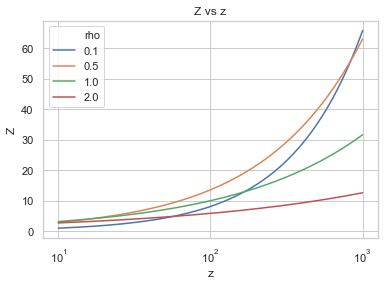

In [6]:
rho = np.array([0.1, 0.5, 1., 2.])
z = np.linspace(10., 1e3, 1000)
df = pd.DataFrame(np.asarray(np.meshgrid(rho, z)).T.reshape(-1, 2), columns=['rho', 'z'])
df = df.assign(Z = lambda x: np.power(x['rho'] * x['z'], 1/(x['rho']+1)))
df['rho'] = df['rho'].astype('category')

ax = sns.lineplot(x='z', y='Z', hue='rho', data=df)
ax.set(xscale='log')
ax.set_title('Z vs z');

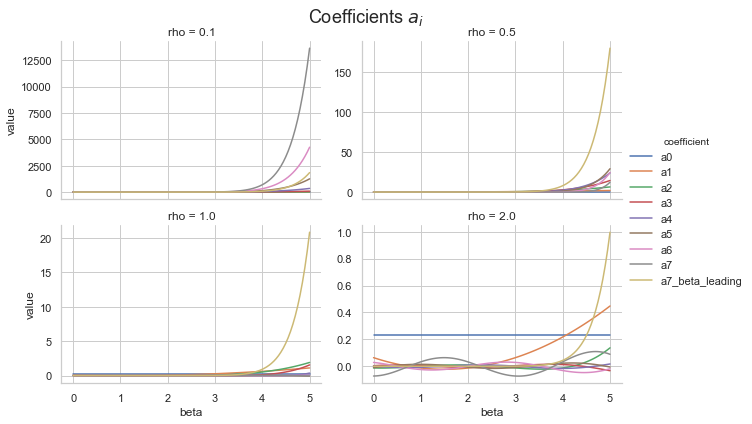

In [7]:
rho = np.array([0.1, 0.5, 1., 2.])
beta = np.linspace(0, 5, 100)
df = pd.DataFrame(np.asarray(np.meshgrid(rho, beta)).T.reshape(-1, 2), columns=['rho', 'beta'])
df['a0'], df['a1'], df['a2'], df['a3'], df['a4'], df['a5'], df['a6'], df['a7'] = [0.] * 8
df['a_beta_leading'] = 0.

for row in df.itertuples():
    df.loc[row.Index, ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']] = \
    H(1., row.rho, row.beta, order=5, verbose=True)[1]
df['a7_beta_leading'] = df['a0'] * df['beta']**(2*7) / (2**7 * ss.factorial(7)* (df['rho'] + 1)**7)

df = df.melt(id_vars=['rho', 'beta'],
             value_vars=['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a7_beta_leading'],
             var_name='coefficient')
g = sns.FacetGrid(data=df, col='rho', hue='coefficient', sharey=False, col_wrap=2, aspect=1.5)
g.map(plt.plot, 'beta', 'value')
#g.set(yscale='log')
g.add_legend()
g.fig.suptitle('Coefficients $a_i$', fontsize=18)
#g.fig.subplots_adjust(hspace=0.3);
g.fig.subplots_adjust(top=0.9);

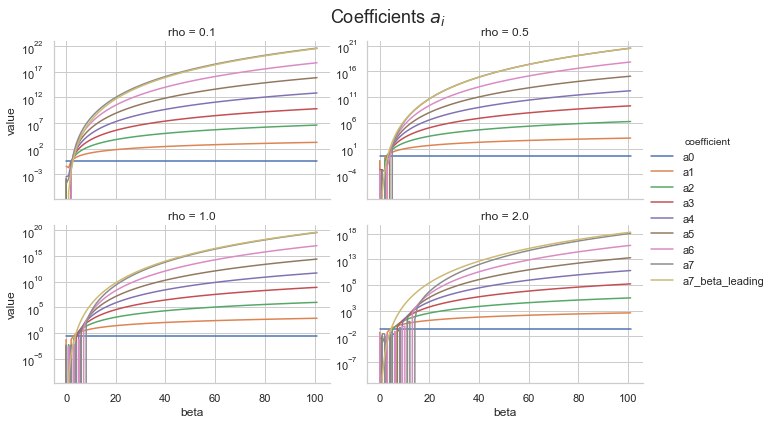

In [8]:
rho = np.array([0.1, 0.5, 1., 2.])
beta = np.linspace(0, 101, 101)
df = pd.DataFrame(np.asarray(np.meshgrid(rho, beta)).T.reshape(-1, 2), columns=['rho', 'beta'])
df['a0'], df['a1'], df['a2'], df['a3'], df['a4'], df['a5'], df['a6'], df['a7'] = [0.] * 8
df['7a_beta_leading'] = 0.

for row in df.itertuples():
    df.loc[row.Index, ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']] = \
    H(1., row.rho, row.beta, order=5, verbose=True)[1]
df['a7_beta_leading'] = df['a0'] * df['beta']**(2*7) / (2**7 * ss.factorial(7)* (df['rho'] + 1)**7)

df = df.melt(id_vars=['rho', 'beta'],
             value_vars=['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a7_beta_leading'],
             var_name='coefficient')
g = sns.FacetGrid(data=df, col='rho', hue='coefficient', sharey=False, col_wrap=2, aspect=1.5)
g.map(plt.plot, 'beta', 'value')
g.set(yscale='log')
g.add_legend()
g.fig.suptitle('Coefficients $a_i$', fontsize=18)
#g.fig.subplots_adjust(hspace=0.3);
g.fig.subplots_adjust(top=0.9);

In [9]:
# Coefficients (except a0) are zero at rho=1, beta=1/2 ?
H(1., rho=1, beta=1/2, order=7, verbose=True)[1]

array([0.28209479, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [10]:
# Coefficients terms a_k/Z^k
Z = np.power(100_000 * 1, 1/(1+1))
H(1., rho=1, beta=100, order=7, verbose=True)[1] * np.power(Z, -np.arange(8))

array([ 0.28209479,  2.1857193 ,  8.4659379 , 21.85179854, 42.27605383,
       65.37874879, 84.16921262, 92.76612708])

#### Search for region of convergence $Z > \ldots$

In [11]:
%%time
# grid of (rho, beta) where we try to find Z such that accuracy <= 5e-12
rho =  [0.1, 0.5, 0.9, 1, 2, 4, 5, 6, 8]
beta = [0, 1, 2, 4, 8, 10, 16, 20, 40, 80, 100]
df = pd.DataFrame(np.asarray(np.meshgrid(rho, beta)).T.reshape(-1, 2), columns=['rho', 'beta'])

df['start_Z'] = 0
df['smallest_Z'] = 0.
df['Phi_MPMATH'] = 0.
df['Phi_asympt_7'] = 0.
df['Phi_asympt_8'] = 0.

def accuracy(Z, rho, beta, order=7):
    if rho <= 0.1:
        steps = 2000
    elif rho <= 1:
        steps = 400
    elif rho <= 5:
        steps = 300
    else:
        steps = 100
    
    return np.abs(H(Z, rho, beta, order=order)
                  / float(Wright_Series_MPMATH(rho, beta, np.power(Z, 1 + rho)/rho, dps=30,
                                        steps=[steps], maxterms=1100, method='d'))
                  - 1)

# Note: Optimization will find dubious points where accuray accidentally hits
# the target, example:
# sp.optimize.newton(lambda Z: accuracy(Z, 1, 1), x0=1)
#
# Therefor we do a simple search over integers

for row in df.itertuples():
    df.at[row.Index, 'start_Z'] = int(5 + 0.25*row.beta**2)
    for Z in range(df.at[row.Index, 'start_Z'], 500):
        if Z > 100 and Z % 2 == 1:
            continue
        if accuracy(Z, row.rho, row.beta) <= 1e-11:
            df.at[row.Index, 'smallest_Z'] = Z
            break
        elif H(Z, row.rho, row.beta, order=7) >= 1e300:
            #print(f"Break at rho={row.rho}, beta={row.beta} and Z={Z}")
            df.at[row.Index, 'smallest_Z'] = np.nan
            break
    
    Z = df.at[row.Index, 'smallest_Z']
    df.at[row.Index, 'Phi_MPMATH'] = float(Wright_Series_MPMATH(row.rho, row.beta, np.power(Z, 1+row.rho)/row.rho, dps=30,
                                                             steps=[200], maxterms=1100, method='d'))
    df.at[row.Index, 'Phi_asympt_7'] = H(Z, row.rho, row.beta, order=7)
    df.at[row.Index, 'Phi_asympt_8'] = H(Z, row.rho, row.beta, order=8)
    
df['accuracy_7'] = np.abs(df['Phi_asympt_7'] / df['Phi_MPMATH'] - 1)
df['accuracy_8'] = np.abs(df['Phi_asympt_8'] / df['Phi_MPMATH'] - 1)

df = df.query("not smallest_Z.isnull() and smallest_Z > 0")

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in exp
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in double_scalars
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in double_scalars
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in double_scalars
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:161: RuntimeWarning: divide by zero encountered in double_scalars
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:163: Run

CPU times: user 2min 3s, sys: 249 ms, total: 2min 3s
Wall time: 2min 4s


In [12]:
df

,rho,beta,start_Z,smallest_Z,Phi_MPMATH,Phi_asympt_7,Phi_asympt_8,accuracy_7,accuracy_8
0,0.1,0.0,5,10.0,7.054131e+47,7.054131e+47,7.054131e+47,7.696954e-12,5.037082e-13
1,0.1,1.0,5,10.0,7.086008e+46,7.086008e+46,7.086008e+46,5.217160e-12,9.017231e-13
2,0.1,2.0,6,13.0,9.629296e+59,9.629296e+59,9.629296e+59,6.145306e-12,3.907985e-14
11,0.5,0.0,5,12.0,4.807937e+15,4.807937e+15,4.807937e+15,6.950773e-12,4.372058e-13
12,0.5,1.0,5,9.0,5.794730e+10,5.794730e+10,5.794730e+10,7.690959e-12,8.356760e-12
...,...,...,...,...,...,...,...,...,...
92,8.0,8.0,21,92.0,2.204223e+29,2.204223e+29,2.204223e+29,4.726552e-12,2.166378e-12
93,8.0,10.0,30,94.0,1.992710e+26,1.992710e+26,1.992710e+26,3.828271e-12,3.538392e-12
94,8.0,16.0,69,91.0,1.530730e+13,1.530730e+13,1.530730e+13,6.464940e-12,4.390266e-12
95,8.0,20.0,105,106.0,2.314134e+11,2.314134e+11,2.314134e+11,2.121858e-12,1.680656e-12


In [13]:
rho, beta = 0.1, 4
z = 1e2
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=7)
y1, y2/y1 - 1

Z = 8.11130830789687


(7.72488597852701e+34, -0.0002945917794304753)

In [25]:
float(Wright_Series_MPMATH(2, 100, 100000, steps=[3000], method='s'))

5.475089686699177e-153

In [26]:
def func(data, a1, a2, a3):
    rho = data['rho']
    beta = data['beta']
    return a1 * (1 + rho) * np.exp(a2 * beta + a3 /(1 + rho)**2 * beta)

func_params = list(sp.optimize.curve_fit(func, df, df['smallest_Z'], method='trf')[0])
func_params

[5.399794959033605, 0.045606426557303695, 0.6489926004435954]

In [27]:
print("Mean Squared Error")
np.square(func(df, *func_params)
          - df['smallest_Z']).mean()

Mean Squared Error


304.27288490173726

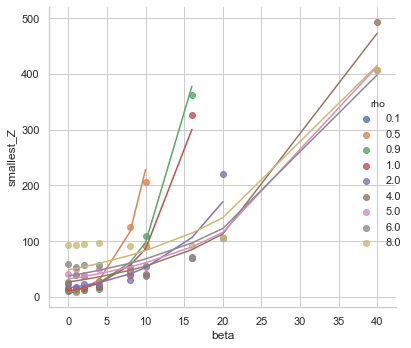

In [28]:
g = sns.lmplot(x = 'beta', y = 'smallest_Z',
              hue='rho',
              data = df,
              fit_reg=False,
              )

# g = sns.FacetGrid(df, hue='beta', col='rho')
# g.map(plt.scatter, "beta", "smallest_Z")

def my_fit(*args, **kwargs):
    beta = args[0]
    rho = args[2].iloc[0]
    Z = func(pd.DataFrame({'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(beta, Z, **kwargs)

g.map(my_fit, 'beta', 'smallest_Z', 'rho')
#g.set(xscale = 'log')
#g.set(yscale = 'log')

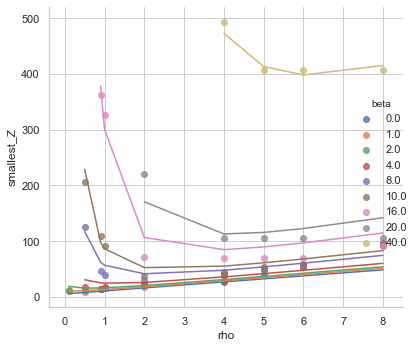

In [455]:
g = sns.lmplot(x = 'rho', y = 'smallest_Z',
              hue='beta',
              data = df,
              fit_reg=False,
              )

# g = sns.FacetGrid(df, hue='beta', col='rho')
# g.map(plt.scatter, "beta", "smallest_Z")

def my_fit(*args, **kwargs):
    rho = args[0]
    beta = args[2].iloc[0]
    Z = func(pd.DataFrame({'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(rho, Z, **kwargs)

g.map(my_fit, 'rho', 'smallest_Z', 'beta')
#g.set(xscale = 'log')
#g.set(yscale = 'log')

In [16]:
%%time
# Grid search for region of convergence
# set Z = 12  + beta**2 / (10*(1+rho))
rho = np.array([1e-2, 1e-1, 0.2, 0.5, 0.7, 0.9, 1, 1.1, 1.5, 2, 5, 10])
beta = np.array([0, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 1.2, 1.5, 2, 5, 10, 100])
df = pd.DataFrame(np.asarray(np.meshgrid(rho, beta)).T.reshape(-1, 2), columns=['rho', 'beta'])

df['x'] = np.power(12 + df['beta']**2/4/(1+df['rho']), 1+df['rho']) / df['rho']
df['Z'] = np.power(df['rho'] * df['x'], 1./(df['rho']+1))

df = df.query('log(Z) * (0.5 - beta) + (1+rho)/rho * Z <= 900')  # protection against overflow
df = df.sort_values(by=['rho', 'beta', 'x'])

df['a0'], df['a1'], df['a2'], df['a3'], df['a4'], df['a5'], df['a6'], df['a7'] = [0.]*8
df['H_5'] = 0.
df['H_6'] = 0.
df['H_7'] = 0.
df['H_resummed'] = 0.
df['H_8'] = 0.
df['MPMATH'] = 0.

for row in df.itertuples():
    df.loc[row.Index, ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']] = \
    H(1., row.rho, row.beta, order=5, verbose=True)[1]
    df.at[row.Index, 'H_6'] = H(row.Z, row.rho, row.beta, order=6)
    df.at[row.Index, 'H_7'] = H(row.Z, row.rho, row.beta, order=7)
    df.at[row.Index, 'H_8'] = H(row.Z, row.rho, row.beta, order=8)
    df.at[row.Index, 'H_resummed'] = Wright_Asympt_Resummed(row.rho, row.beta, row.x)
    df.at[row.Index, 'MPMATH'] = float(Wright_Series_MPMATH(row.rho, row.beta, row.x, dps=30,
                                                            steps=[200], maxterms=1100, method='s'))

df['rel_error_5'] = df['H_5'] / df['MPMATH'] - 1
df['rel_error_6'] = df['H_6'] / df['MPMATH'] - 1
df['rel_error_res'] = df['H_resummed'] / df['MPMATH'] - 1
df['rel_error_7'] = df['H_7'] / df['MPMATH'] - 1
df['rel_error_8'] = df['H_8'] / df['MPMATH'] - 1

CPU times: user 10.6 s, sys: 52.1 ms, total: 10.6 s
Wall time: 10.6 s


In [17]:
with pd.option_context("display.max_rows", 150, "display.float_format", '{:.4g}'.format):
    display(df
            .sort_values(by=['rho', 'beta', 'x'])
            .loc[:, ['rho', 'beta', 'x', 'Z', 'MPMATH', 'rel_error_5', 'rel_error_6', 'rel_error_res', 'rel_error_7', 'rel_error_8']])

,rho,beta,x,Z,MPMATH,rel_error_5,rel_error_6,rel_error_res,rel_error_7,rel_error_8
13,0.1,0,153.9,12,2.775e+57,-1,-8.001e-13,-8.001e-13,-1.771e-12,-1.013e-13
14,0.1,0.1,153.9,12,2.228e+57,-1,-1.032e-11,-1.032e-11,-1.735e-12,-2.576e-14
15,0.1,0.2,154,12.01,1.879e+57,-1,-1.664e-11,-1.664e-11,-1.189e-12,8.105e-14
16,0.1,0.5,154.7,12.06,1.514e+57,-1,-6.403e-12,-6.403e-12,1.334e-12,1.443e-13
17,0.1,0.7,155.4,12.11,1.673e+57,-1,1.2e-11,1.2e-11,1.409e-12,-4.186e-14
18,0.1,0.9,156.4,12.18,2.248e+57,-1,1.569e-11,1.568e-11,-1.733e-13,-1.64e-13
19,0.1,1,157.1,12.23,2.801e+57,-1,9.182e-12,9.163e-12,-1.022e-12,-1.591e-13
20,0.1,1.2,158.5,12.33,5.031e+57,-1,-1.015e-11,-1.039e-11,-1.379e-12,1.865e-14
21,0.1,1.5,161.1,12.51,1.738e+58,-1,-7.161e-12,-1.209e-11,8.951e-13,1.272e-13
22,0.1,2,166.7,12.91,3.578e+59,-1,3.266e-10,9.693e-11,-6.51e-12,-4.841e-14


In [60]:
rho, beta, z = 0.1, 2., 125.892541
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[1_000], method='s+e'))
y2 = Wright_Asymptotic(rho, beta, z, order=5)
y3 = Wright_Asymptotic(rho, beta, z, order=6)
y4 = Wright_Asympt_Resummed(rho, beta, z)
y1, y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 9.99999998704402


(6.517994353929352e+45,
 -6.037922650747873e-08,
 1.9783776838977474e-09,
 5.860567586779553e-10)

In [61]:
# Does a small term correspond to small relative error in total? Yes.
# exclude zeros of coefficients: rho=1 and beta=0.5 or beta=1.5
df.loc[(np.abs(df['a5']/df['Z']**5 / df['a0']) < 1e-8) \
       & ~((df['rho']==1) & (df['beta']==0.5)) \
       & ~((df['rho']==1) & (df['beta']==1.5)),
       ['rho', 'beta', 'x', 'Z', 'a0', 'a1', 'a5', 'a6', 'MPMATH', 'rel_error_5', 'rel_error_6', 'rel_error_res']]

,rho,beta,x,Z,a0,a1,a5,a6,MPMATH,rel_error_5,rel_error_6,rel_error_res
13,0.1,0.0,153.850662,12.000000,0.380377,0.036309,0.000179,-0.000260,2.774655e+57,-1.0,-8.001377e-13,-8.001377e-13
14,0.1,0.1,153.882715,12.002273,0.380377,0.019019,0.000288,-0.000186,2.227664e+57,-1.0,-1.031542e-11,-1.031519e-11
15,0.1,0.2,153.978876,12.009091,0.380377,0.005187,0.000318,-0.000066,1.878871e+57,-1.0,-1.663880e-11,-1.663880e-11
16,0.1,0.5,154.652157,12.056818,0.380377,-0.015561,-0.000029,0.000246,1.513574e+57,-1.0,-6.403322e-12,-6.403322e-12
17,0.1,0.7,155.421948,12.111364,0.380377,-0.012103,-0.000295,0.000146,1.673350e+57,-1.0,1.199751e-11,1.199729e-11
18,0.1,0.9,156.448875,12.184091,0.380377,0.005187,-0.000211,-0.000141,2.247520e+57,-1.0,1.568656e-11,1.568190e-11
19,0.1,1.0,157.058903,12.227273,0.380377,0.019019,-0.000029,-0.000245,2.801291e+57,-1.0,9.182211e-12,9.162671e-12
20,0.1,1.2,158.472425,12.327273,0.380377,0.057056,0.000322,-0.000168,5.031101e+57,-1.0,-1.014966e-11,-1.038702e-11
21,0.1,1.5,161.077586,12.511364,0.380377,0.140048,0.000020,0.000245,1.738026e+58,-1.0,-7.161161e-12,-1.209233e-11
26,0.2,0.0,98.625110,12.000000,0.364183,0.038947,-0.000155,-0.000186,2.323892e+31,-1.0,2.521250e-11,2.521250e-11


In [63]:
df.query("abs(rel_error_8) <= 1e-10").loc[:, 'rho'].unique()

array([0.1, 0.2, 0.5, 0.7, 0.9, 1. , 1.1, 1.5])

In [64]:
# Where is resummed (matched at order 5) better than order 6? For beta > 1 this can make sense
(df.query("abs(rel_error_res) <= 0.5*abs(rel_error_6) and abs(rel_error_res) <= 1e-6")
 .loc[:, ['rho', 'beta', 'x', 'Z', 'MPMATH', 'rel_error_5', 'rel_error_6', 'rel_error_res']]
)

,rho,beta,x,Z,MPMATH,rel_error_5,rel_error_6,rel_error_res
22,0.1,2.0,166.719049,12.909091,3.578216e+59,-1.0,3.266414e-10,9.692758e-11
48,0.5,2.0,90.161994,12.666667,2.217102e+14,-1.0,4.753464e-11,1.842104e-11


**Resummed asymptotic series does not improve results&mdash;unfortunately.**

In [57]:
rho, beta, z = 0.5, 1, 100.1
Z = np.power(rho * z, 1/(rho+1))
[H(Z, rho, beta),
 H(Z * np.exp(-2j*np.pi/(1+rho)), rho, beta),
 H(Z * np.exp(+2j*np.pi/(1+rho)), rho, beta)
]

[4.384497089770522e+16,
 (-1.1906052656245927e-10+3.9675547079410774e-11j),
 (-1.1906052656245927e-10-3.9675547079410774e-11j)]

In [58]:
rho, beta, z = 3, 1, 100.1

y1 = Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s')
Z = np.power(rho * z, 1/(rho+1))
y2 = H(Z, rho, beta, order=5)
y3 = y2 + H(Z * np.exp(-2j*np.pi/(1+rho)), rho, beta, order=5) + H(Z * np.exp(+2j*np.pi/(1+rho)), rho, beta, order=5)
y1, y2/y1 - 1, y3/y1 - 1

(25.111139268961203303, -0.00058301595955023452440, -0.00020144082778425311809)

In [59]:
rho, beta, z = 0.5, 1, 100.1
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")
float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s')), Wright_Asymptotic(rho, beta, z, order=5)

Z = 13.581134634356562


(4.384497070029932e+16, 4.3844970712388376e+16)

In [60]:
y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=4)
y3 = Wright_Asymptotic(rho, beta, z, order=5)
y4 = Wright_Asymptotic(rho, beta, z, order=6)
y5 = Wright_Asympt_Resummed(rho, beta, z)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

(4.5023611505712324e-09,
 2.75722777942633e-10,
 1.2945644556339175e-11,
 1.294453433331455e-11)

In [61]:
rho, beta, z = 1e-1, 1, 100.1
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=4)
y3 = Wright_Asymptotic(rho, beta, z, order=5)
y4 = Wright_Asymptotic(rho, beta, z, order=6)
y5 = Wright_Asympt_Resummed(rho, beta, z)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 8.118681889484202


(2.472133608932836e-10,
 2.4150392796684628e-09,
 1.510684910499549e-10,
 1.5072654235837035e-10)

In [62]:
rho, beta, z = 1e-1, 1, 10.1
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=4)
y3 = Wright_Asymptotic(rho, beta, z, order=5)
y4 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 1.009086791807736


(0.0004463372627814266, 0.0005230936508771045, -0.00012184439016216242)

In [63]:
rho, beta, z = 1, 1, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y5 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 10.0


(-7.775125417941453e-07,
 -8.104419391141704e-08,
 -1.0526773563945824e-08,
 -1.6386403345336475e-09)

In [64]:
rho, beta, z = 2, 1, 100.1
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[200], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y5 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 5.84998417216357


(3.739612770048417e-05,
 8.194863118760054e-06,
 -8.596898964929878e-07,
 -3.4734805314240447e-06)

In [65]:
Z = np.power(rho * z, 1/(rho+1))
y_add = H(Z * np.exp(2j*np.pi/(1+rho)), rho, beta)
display((y4+y_add)/y1 - 1, y1, y3, y_add)
del(y_add)

(9.70571717440194e-07+4.883987639667443e-07j)

621.9688185347017

621.9739154840337

(0.001138365653599434+0.00030376880219820456j)

In [66]:
rho, beta, z = 10, 1, 1000.1
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5_000], method='s+e'))
y2 = Wright_Asymptotic(rho, beta, z, order=4)
y3 = Wright_Asymptotic(rho, beta, z, order=5)
y4 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 2.3101507003077133


(0.2457705379670152, 0.36175856907411763, -3.8952531963658976)

In [67]:
Z = np.power(rho * z, 1/(rho+1))
y5 = H(Z * np.exp(2j*np.pi/(1+rho)), rho, beta)
(y3+y5)/y1 - 1, y1, y3, y5

((0.6396686431150642+0.19034996708727492j),
 1.0002756007497646,
 1.362133870756753,
 (0.27798666626571944+0.19040242768092186j))

In [68]:
[z**k * ss.rgamma(k+1) * ss.rgamma(rho*k+beta) for k in range(10)]

[1.0,
 0.00027560074955908286,
 2.0555698639700018e-13,
 6.285197897013248e-25,
 5.108782331858298e-38,
 2.741328100141114e-52,
 1.6701413086619197e-67,
 1.657556797635316e-83,
 3.4681603775778296e-100,
 1.856487470931858e-117]

In [69]:
rho, beta, z = 0.1, 1.001, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y5 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 8.11130830789687


(-3.098466638817854e-07,
 4.122373553627767e-10,
 2.4328996595102126e-09,
 1.504378843719678e-10)

In [65]:
rho, beta, z = 1.0, 1.0, 500
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=5)
y3 = Wright_Asymptotic(rho, beta, z, order=6)
y4 = Wright_Asymptotic(rho, beta, z, order=7)
y5 = Wright_Asymptotic(rho, beta, z, order=8)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 22.360679774997898


(-7.658984557679105e-11,
 -5.229150445984487e-12,
 -4.135580766728708e-13,
 -3.5083047578154947e-14)

In [71]:
rho, beta, z = 0.5, 0.5, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='s'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y5 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 13.572088082974531


(-6.740016955664174e-08,
 -2.1563182350803345e-09,
 1.2778889058040477e-11,
 1.5330847702443862e-11)

In [72]:
(1+rho)/rho * np.power(rho*z, 1/(1+rho))

40.71626424892359

In [73]:
rho, beta, z = 1e-1, 1e-1, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y5 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1, y5/y1 - 1

Z = 8.11130830789687


(-3.3857046277674385e-08,
 2.323627557032637e-08,
 1.5577490408702488e-09,
 -1.7240331384726915e-10)

In [74]:
rho, beta, z = 1e-1, 10, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=3)
y3 = Wright_Asymptotic(rho, beta, z, order=4)
y4 = Wright_Asymptotic(rho, beta, z, order=5)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 8.11130830789687


(-948.486594425962, 1533.904704167459, -2196.4591327103963)

In [75]:
Z = np.power(rho*z, 1/(1+rho))
a0 = 1./np.sqrt(2. * np.pi * (rho+1))
a1 = a0 / (24 * (rho+1)) * ((2*rho+1)*(2+rho)-12*beta*(1+rho-beta))
{'Z': Z,
 'a0': a0,
 'a1': a1
}

{'Z': 8.11130830789687, 'a0': 0.3803765396310911, 'a1': 15.424268682040742}

In [76]:
rho, beta, z = 1e-5, 1e-5, 100
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=4)
y3 = Wright_Asymptotic(rho, beta, z, order=5)
y4 = Wright_Asymptotic(rho, beta, z, order=6)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 0.001000069079247883


(-2852415804.760771, -9865737490066.809, 866436578519213.0)

In [78]:
Z = np.power(rho*z, 1/(1+rho))
a0 = 1./np.sqrt(2. * np.pi * (rho+1))
a1 = a0 / (24 * (rho+1)) * ((2*rho+1)*(2+rho)-12*beta*(1+rho-beta))
{'Z': Z,
 'a0': a0,
 'a1': a1
}

{'Z': 0.001000069079247883,
 'a0': 0.39894028570499085,
 'a1': 0.03324352780096242}

In [79]:
np.power(Z, 0.5 - beta) * np.exp((1+rho)/rho * Z) * (a0 - a1/Z )

-2.814239380430427e+43

In [68]:
rho, beta, z = 1, 10, 500
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}, beta**2/(10(1+rho))={beta**2/(10*(1+rho))}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=6)
y3 = Wright_Asymptotic(rho, beta, z, order=7)
y4 = Wright_Asymptotic(rho, beta, z, order=8)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 22.360679774997898, beta**2/(10(1+rho))=5.0


(4.058306498389008e-05, -1.4374891217361352e-06, 1.596724197305832e-08)

**Note:**
- Asymptotic series only makes sense for $Z >> 1$. Tiny $\rho$ make this impossible.
- Large $\beta$ is also difficult.

In [80]:
rho, beta = 0.7, 0.1
x = np.arange(1, 101, 1)
y1 = np.array([Wright_Series_MPMATH(rho, beta, z, steps=[100]) for z in x], dtype=np.float)
y2 = np.array([Wright_Asymptotic(rho, beta, z) for z in x])

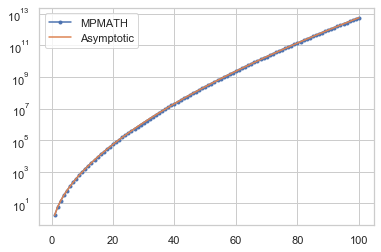

In [81]:
plt.plot(x, y1, '.-', label="MPMATH")
plt.plot(x, y2, '-', label="Asymptotic")
plt.yscale('log')
plt.legend()

Text(0.5, 1.0, 'Abs of Relative Error of Asymptotic, rho=0.7, beta=0.1')

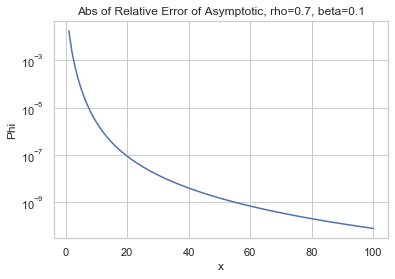

In [82]:
plt.plot(x, np.abs(y2/y1 - 1))
#plt.xlim(1, 1000)
#plt.ylim(-1E-1, 1E-1)
plt.xlabel("x")
plt.ylabel("Phi")
plt.yscale('log')
plt.title(f"Abs of Relative Error of Asymptotic, rho={rho}, beta={beta}")

**For large rho, the asymptotic Series seems to be very bad!!!**

Text(0.5, 1.0, 'Dependency of $\\frac{1+\\rho}{\\rho} \\; Z$ on $\\rho$')

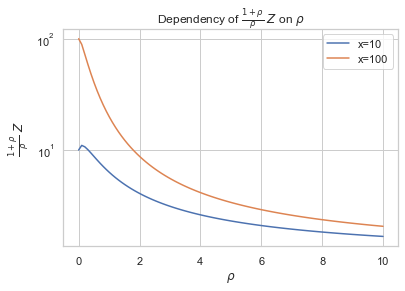

In [83]:
rho = np.linspace(1E-6, 10, 100)
z = 10
Z = (1+rho)/rho * np.power(rho*z, 1/(1+rho))
plt.plot(rho, Z, label="x=10")
z = 100
Z = (1+rho)/rho * np.power(rho*z, 1/(1+rho))
plt.plot(rho, Z, label="x=100")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\frac{1+\rho}{\rho} \; Z$")
plt.yscale("log")
plt.legend()
plt.title(r"Dependency of $\frac{1+\rho}{\rho} \; Z$ on $\rho$")

In [176]:
rho = 10
beta = 10
z = 1e10
Z = np.power(rho * z, 1/(rho+1))

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=6)

Z, y1, y2/y1-1

(10.0, 2.8379439298544466e-06, -0.23248191745249558)

In [181]:
rho = 2
beta = 10
z = 100_000
Z = np.power(rho * z, 1/(rho+1))

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=40, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=7)

Z, y1, y2/y1-1

(58.48035476425731, 3.8164005593863894e+20, -1.957323192414151e-13)

In [94]:
rho = 1
beta = 10
z = 5e2
Z = np.power(rho * z, 1/(rho+1))

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=50, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=6)
y3 = Wright_Asymptotic(rho, beta, z, order=7)

Z, y1, y2/y1-1, y3/y1-1

(22.360679774997898,
 454308.6292213986,
 4.058306498389008e-05,
 -1.4374891217361352e-06)

In [7]:
rho = 1
beta = 100
z = 100_000
Z = np.power(rho * z, 1/(rho+1))
print(f"Z = {Z}, beta**2/(10(1+rho))={beta**2/(10*(1+rho))}")

y1 = float(Wright_Series_MPMATH(rho, beta, z, steps=[5000], dps=50, maxterms=10_000, method='d'))
y2 = Wright_Asymptotic(rho, beta, z, order=6)
y3 = Wright_Asymptotic(rho, beta, z, order=7)
y4 = Wright_Asymptotic(rho, beta, z, order=8)

y1, y2/y1-1, y3/y1-1, y4/y1-1

Z = 316.22776601683796, beta**2/(10(1+rho))=500.0


(1.0269334596230763e+22,
 372436.10590366233,
 -382299.31505776744,
 344501.58446206304)

## 4. Integral Representation <a id="integral"></a>
[back to TOC](#toc)
<br>
See Luchko (2008). Note that the definition of $P(\rho, \beta, x, \epsilon, \varphi)$ in Eq. (9) has a misprint.
$a=\rho$ and $b=\beta$
$$K(a, b, x, r) = \exp(-r + x \cdot r^{-a} \cos(\pi a)) \cdot r^{-b} \cdot
                  \sin(x \cdot r^{-a} \sin(\pi a) + \pi b)$$
$$P(\epsilon, a, b, x, \varphi) = \exp(\epsilon \cos(\varphi) + x \cdot \epsilon^{-a} \cos(a \varphi))
                          \cdot \cos(\epsilon \sin(\varphi) - x \cdot \epsilon^{-a} \sin(a \varphi)
                              + (1-b) \varphi)$$
Then
$$\Phi(a, b, x) = \frac{1}{\pi} \int_{\epsilon}^\inf K(a, b, x, r) \; dr
        + \frac{\epsilon^{1-b}}{\pi} \int_0^\pi P(\epsilon, a, b, x, \varphi) \; d\varphi$$

for any $\epsilon > 0$.

### 4.1 Definition of Integral Representation

In [184]:
import scipy.integrate
from scipy.integrate import quad, fixed_quad

def K(rho, beta, x, r):
    r_rho = np.power(r, -rho)
    return np.exp(-r + x * r_rho * np.cos(np.pi*rho)) \
        * np.power(r, -beta) \
        * np.sin(x * r_rho * np.sin(np.pi * rho) + np.pi * beta)

def Kmod(eps, rho, beta, x, r):
    """
    Kmod = K(rho, beta, x, r+eps) / exp(-r-eps)
    """
    r_rho = np.power(r+eps, -rho)
    return np.exp(x * r_rho * np.cos(np.pi*rho)) \
        * np.power(r+eps, -beta) \
        * np.sin(x * r_rho * np.sin(np.pi * rho) + np.pi * beta)

def Pfull(eps, rho, beta, x, phi):
    eps_rho = np.power(1.*eps, -rho)
    return np.exp(eps*np.cos(phi) + x * eps_rho * np.cos(rho*phi)) \
        * np.cos(eps*np.sin(phi) - x * eps_rho * np.sin(rho*phi) + (1-beta)*phi)

def P(rho, beta, x, phi):
    """Beware of misprint in Luchko!!!"""
    return np.exp(np.cos(phi) + x * np.cos(rho*phi)) \
        * np.cos(np.sin(phi) - x * np.sin(rho*phi) + (1-beta)*phi)


def Wright_Integral_quad(rho, beta, z, error_out=False, eps=1e-10, epsrel=1e-10):
    if rho <= -1:
        raise ValueError("rho must be larger than -1.")    
    
    # boundary r0 for integral over K according to Luchko:
    if z * np.cos(np.pi*rho) <= 0:
        if beta >= 0:
            r0 = -np.log(eps)
        else:
            r0 = max(-beta + 1,
                     -2 * np.log(eps * np.power(-2.*beta, beta)/(-beta + 2)))
    elif beta >= 0:
        r0 = max(-2 * np.log(eps*np.power(2., beta-1)), \
                 np.power(2 * z * np.cos(rho*np.pi), 1/(1+rho)))
    else:
        r0 = max(2 * (-beta + 1), \
                 -4 * np.log(eps * np.power(-4.*beta, beta) / (2*(-beta + 2))), \
                 np.power(2 * z * np.cos(rho*np.pi), 1/(1+rho)))

    if z > 0:
        if (rho < 0 and beta <= 1) or (rho == 0 and beta < 1):
            K_int = quad(lambda r: K(rho, beta, z, r), 0, r0, epsrel=epsrel, limit=1000)
            err = 1./np.pi * K_int[1]
            res = 1./np.pi * K_int[0]
        
            if beta == 1 and rho < 0:
                res += 1.
        else:
            K_int = quad(lambda r:   K(rho, beta, z, r),   1, r0, epsrel=epsrel, limit=1000)
            P_int = quad(lambda phi: P(rho, beta, z, phi), 0, np.pi,  epsrel=epsrel, limit=1000)
            err = 1./np.pi * (K_int[1] + P_int[1])
            res = 1./np.pi * (K_int[0] + P_int[0])            
    else:
        raise NotImplementedError("z < 0 is not yet implemented.")
        
    if error_out:
        return res, err
    else:
        return res


def _cached_roots_laguerre(n):
    """Cache roots_laguerre results to speed up calls of the fixed_laguerre function.
    """
    if n in _cached_roots_laguerre.cache:
        return _cached_roots_laguerre.cache[n]

    _cached_roots_laguerre.cache[n] = ss.roots_laguerre(n)
    return _cached_roots_laguerre.cache[n]


_cached_roots_laguerre.cache = dict()


def fixed_laguerre(func, args=(), n=5):
    """Compute fixed order Gauss-Laguerre quadruature"""
    x, w = _cached_roots_laguerre(n)
    x = np.real(x)
    return np.sum(w*func(x, *args), axis=-1), None


def eps_select(rho, beta, z):
    """Select an appropriate eps for integration.
    a = rho, b=beta, z = x
    """
    # We use the free choice of eps to make the integral better behaved.
    # 1. Concern is oscillatory behaviour of P. Therefore, we'd like to
    #    make the change in the argument of cosine small, i.e. make arc length
    #    int_0^phi sqrt(1 + f'(phi)^2) dphi small, with
    #    f(phi) = eps * sin(phi) - x * eps^(-a) * sin(a*phi) + (1-b)*phi
    #    Proxy, make |f'(phi)| small.
    # 2. Concern is int_0 K ~ int_0 (r+eps)^(-b) .. dr
    #    This is difficult as r -> 0  for large b. It behaves better for larger
    #    values of eps.
    #
    # 1. Minimize oscillatory behaviour of P.
    #a = [2.25974, 12.3104, 0.975979, 1.57556, 2.42271, 1.94177E-03]
    #eps = a[0] * beta + a[1] * np.power(z, a[2]/(1.+rho)) * np.power(rho, a[3]) * (np.exp(-a[4]*np.sqrt(rho)) + a[5])
    A = [0.41037, 0.30833, 6.9952, 18.382, -2.8566, 2.1122]
    eps = A[0] * beta * np.exp(-0.5*rho) + np.exp(A[1] + 1/(1+rho) * np.log(z) - A[2] * np.exp(-A[3]*rho) + A[4] / (1 + np.exp(A[5]*rho)))
    if rho > 4 and z >= 100:
        eps += 1
        
    # 2. Large b
    if beta >= 8:
        # Make P small compared to K by setting eps large enough.
        # int K ~ exp(-eps) and int P ~ eps^(1-b)
        eps = max(eps, np.power(beta, -beta/(1.-beta)) + 0.1 * beta)
        
#    elif z > 1 and rho > 1:
#        # set eps such that z*eps^(-rho) = 2^(-rho)
#        eps = 2*np.power(z, 1./rho)
#    elif z > 1 and rho > 0:  # 0 < a < 1
#        # approx sin(a * phi) ~ a * phi
#        # set eps such that eps ~ a * x * eps^(-a)
#        # multiply by 2**(beta-1) to take advantage larger beta values.
#        eps = np.power(rho*z, 1./(1.+rho)) * 2**(beta-1)
#        #if z <= 5 and beta >= 5:
#        #    eps = 2*eps
#        #elif rho <= 0.1:
#        #    eps *= np.power(2, np.log10(rho))
#    else:
#        eps = 1.
    # safeguard, higher better for larger a, lower better for tiny a.
    eps = min(eps, 150)
    eps = max(eps, 3)
    return eps


def Wright_Integral(rho, beta, z, n_laguerre=50, n_legendre=50, eps=None):
    """
    Compute Wrights generalized Bessel function via integration.
    
    n_laguerre : order of quadrature rule for gauss-laguerre for integration over K.
    n_legendre : order of quadrature rule for gauss-legendre for integration over P.
    """
    if rho <= -1:
        raise ValueError("rho must be larger than -1.")    

    if z > 0:
        if (rho < 0 and beta <= 1) or (rho == 0 and beta < 1):
            # integrate from 0 to inf
            K_int = fixed_laguerre(lambda r: K(rho, beta, z, r) * np.exp(r), n=n_laguerre)[0]
            res = 1./np.pi * K_int
        
            if beta == 1 and rho < 0:
                res += 1.
        else:
            if eps is None:
                eps = eps_select(rho, beta, z)
            #print(eps)
            K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=n_laguerre)
            P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=n_legendre)
            res = 1./np.pi * (np.exp(-eps)*K_int[0] + np.power(eps, 1.-beta) * P_int[0])            
    else:
        raise NotImplementedError("z < 0 is not yet implemented.")
        
    return res

In [16]:
rho = 0.001
beta = 7.
x = 100.
np.power(rho*x, 1./(1.+rho)) * 2**(beta-1), eps_select(rho, beta, 100), eps_select(rho, 0, 100)

(6.414738767955448, 3, 3)

In [17]:
rho = 1.
beta = 10.
x = 500.
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y1, y2/y1-1, eps_select(rho, beta, x)

(454308.62922139864454, -2.6712069988127189191e-14, 24.850932083693337)

In [18]:
rho = 0.1
beta = 5.
x = 100.
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y2/y1-1, eps_select(rho, beta, x)

(0.000041744258247345087271, 10.149627517981061)

In [23]:
rho = 0.001
beta = 7.
x = 100.
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[200], method='s')
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y3 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=1)
y2/y1-1, y3/y1-1, eps_select(rho, beta, x)

(-2.7725758361819667630e-14, 3.4321652618069844050e-6, 3)

In [24]:
rho = 0.001
beta = 7.
x = 500.
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[2000], method='s')
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y3 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=1)
y2/y1-1, y3/y1-1, eps_select(rho, beta, x)

(-9.6736913930152955421e-15, 0.000034024573491069864094, 3.040155049758932)

In [25]:
rho = 0.001
beta = 7.
x = 500.
{f"beta = {beta}": (eps_select(rho, beta, 100), eps_select(rho, beta, 500)),
 f"beta = {0}": (eps_select(rho, 0, 100), eps_select(rho, 0, 500))
}

{'beta = 7.0': (3, 3.040155049758932), 'beta = 0': (3, 3)}

In [26]:
# # test different integration methods
# rho = 1
# beta=0.5
# z=1
# [scipy.integrate.quad(lambda r: K(rho, beta, z, r), 0., np.inf, epsrel=1e-10, epsabs=1e-10, limit=10000),
#  scipy.integrate.fixed_quad(lambda r: K(rho, beta, z, r), 0., 1E5, n=1000),
#  scipy.integrate.quadrature(lambda r: K(rho, beta, z, r), 0., 1E5, tol=1e-10, rtol=1e-10, maxiter=1000, miniter=100),
#  scipy.integrate.romberg(lambda r: K(rho, beta, z, r), 0., 1E5, tol=1e-10, rtol=1e-10, divmax=20),
# ]

In [27]:
# for rho < 0 and beta < 1, test integration equivalence
rho = -0.5
beta = 0.1
z = 1
quad(lambda r: K(rho, beta, z, r), 0, np.inf, epsrel=1e-6, limit=2000)[0], \
quad(lambda r: K(rho, beta, z, r), 1, np.inf, epsrel=1e-6, limit=2000)[0] \
+ quad(lambda phi: P(rho, beta, z, phi), 0, np.pi,  epsrel=1e-6, limit=1000)[0]

(-0.46574098486097193, -0.46574098486037246)

In [28]:
rho = 0.1
beta = 8
z = 2.1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[200])
y2 = Wright_Integral(rho, beta, z)

eps = np.power(8, -beta/(1-beta))
eps = min(eps, 1000)
K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=50)
P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=50)
y3 = 1./np.pi * (K_int[0] + np.power(eps, 1.-beta) * P_int[0])           
y1, y2/y1-1, y3/y1 - 1, eps

(0.0011009683890031466747,
 -1.7341793420114909319e-14,
 2.1901646928447493918e-6,
 10.767201541058848)

### 4.2 Choice of epsilon
We have integral over $K$ and integral over $P$.
We are looking for a choice of $\epsilon$ that makes both integrands numerical well behaved at the same time.

#### Integrand P
Goal: Least oscillatory behaviour of integrand => arc length of argument of $cos(...)$ of $P(\epsilon, a, b, x, \varphi)$ should be minimal.
Arc length of function $f$ is computed as $\int \sqrt{1+f'(t)^2}dt$.

We have $f(\varphi) = \epsilon \sin(\varphi) - x \epsilon^{-\rho} \sin(\rho \varphi) + (1-\beta) \varphi$ and arc length $s = \int_0^\pi \sqrt{1+f^{\prime 2}}d\varphi$

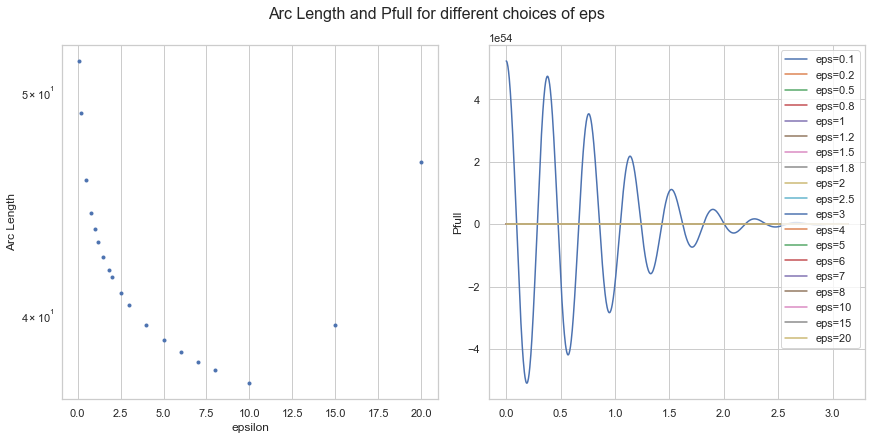

In [29]:
# Arc length of argument of cosine part of Pfull
def f(eps, rho, beta, x, phi):
    """Argument of cosine of Pfull."""
    eps_rho = np.power(1.*eps, -rho)
    return eps*np.sin(phi) - x * eps_rho * np.sin(rho*phi) + (1-beta)*phi


def fp(eps, rho, beta, x, phi):
    """Derivative w.r.t. phi"""
    eps_rho = np.power(1.*eps, -rho)
    return eps*np.cos(phi) - rho* x * eps_rho * np.cos(rho*phi) + (1-beta)

def arclength(eps, rho, beta, x, epsrel=1e-2, limit=100):
    return quad(lambda phi: np.sqrt(1 + fp(eps, rho, beta, x, phi)**2), 0, np.pi,  epsrel=epsrel, limit=100)[0]


eps = 1
rho = 1e-1
beta = 5
x = 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
eps_list = [0.1, 0.2, 0.5, 0.8, 1, 1.2, 1.5, 1.8, 2, 2.5, 3, 4, 5, 6, 7, 8, 10, 15, 20]
phi = np.linspace(0, np.pi, 1_000)
res = []
for eps in eps_list:
    res.append(arclength(eps, rho, beta, x))
    # leave out np.power(eps, 1.-beta) as we are only interested in oscillation
    y2 =  Pfull(eps, rho, beta, x, phi)
    axes[1].plot(phi, y2, label=f"eps={eps}")

axes[0].plot(eps_list, res, ".")
axes[0].set_xlabel("epsilon")
axes[0].set_ylabel("Arc Length")
axes[0].set_yscale('log')
axes[1].legend(loc='upper right')
axes[1].set_ylabel("Pfull")
fig.suptitle("Arc Length and Pfull for different choices of eps", fontsize=16);

In [30]:
rho = 4.999
beta = 0
x = 1e5

eps_opt = sp.optimize.minimize_scalar(
            lambda eps: arclength(eps, rho, beta, x),
            bounds=(1e-3, 1000),
            method='Bounded', options={'xatol':1e-3}).x

y1 = Wright_Series_MPMATH(rho, beta, x, steps=[300])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y3 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=eps_opt)
{'value': y1,
 'abs_rel_fit_esp': y2/y1-1,
 'abs_rel_opt_esp': y3/y1-1,
 'eps': eps_select(rho, beta, x),
 'eps_opt': eps_opt, 'Z': np.power(rho*x, 1/(1+rho))}

{'value': 19975.784421040304722,
 'abs_rel_fit_esp': -7.7728026685668864110e-14,
 'abs_rel_opt_esp': -1.5385395577314315771e-13,
 'eps': 10.275686364581858,
 'eps_opt': 10.063596956686323,
 'Z': 8.911938581802515}

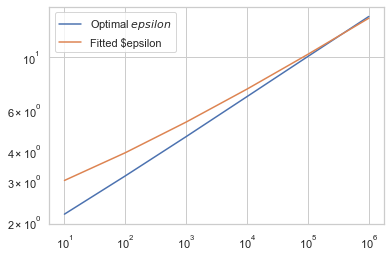

In [31]:
rho = 4.999
beta = 0
x_list = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
res = []
for x in x_list:
    res.append(
        sp.optimize.minimize_scalar(
            lambda eps: arclength(eps, rho, beta, x),
            bounds=(1e-3, 1000),
            method='Bounded', options={'xatol':1e-3}).x
    )

plt.plot(x_list, res, label='Optimal $epsilon$')
plt.plot(x_list, [eps_select(rho, beta, x) for x in x_list], label='Fitted $epsilon')

plt.xscale('log')
plt.yscale('log')
plt.legend()

In [32]:
%%time
# grid of minimal arc length values
data_rho = [1e-3, 0.1, 0.5, 0.9, 1, 2, 4, 5, 6, 8]
data_beta = [0, 1, 4, 7, 10]
data_x = [1, 1.5, 2, 4, 10, 20, 50, 100, 200, 500, 1e3, 5e3, 1e4]
data_rho, data_beta, data_x = np.meshgrid(data_rho, data_beta, data_x)
data_rho, data_beta, data_x = data_rho.flatten(), data_beta.flatten(), data_x.flatten()
best_eps = []
for i in range(data_x.size):
    best_eps.append(
        sp.optimize.minimize_scalar(lambda eps: arclength(eps, data_rho[i], data_beta[i], data_x[i]),
                                    bounds=(1e-3, 1000),
                                    method='Bounded', options={'xatol':1e-3}).x
    )
best_eps = np.array(best_eps)
df = pd.DataFrame({'rho': data_rho,
                   'beta': data_beta,
                    'x': data_x,
                    'eps': best_eps})

#with pd.option_context("display.max_rows", 200):
#    display(df.query("eps>=1 and beta <= 8"))

CPU times: user 7.43 s, sys: 63.2 ms, total: 7.49 s
Wall time: 7.45 s


In [33]:
#def func(data, a1, a2, a3, a4, a5, a6):
#    rho = data['rho']
#    beta = data['beta']
#    x = data['x']
#    return (a1 * beta + a2 * np.power(x, a3/(1+rho))) * np.power(rho, a4) * (np.exp(-a5 * np.sqrt(rho)) + a6)
#
#func_params = list(sp.optimize.curve_fit(func, df, df['eps'])[0])
#func_params

In [34]:
def func(data, a1, a2, a3, a4, a5, a6):
    rho = data['rho']
    beta = data['beta']
    x = data['x']
    return a1 * beta * np.exp(-0.5*rho) + np.exp(a2 + 1/(1+rho) * np.log(x) - a3 * np.exp(-a4*rho) + a5 / (1 + np.exp(a6*rho)))

func_params = list(sp.optimize.curve_fit(func, df, df['eps'], method='trf')[0])
func_params

[0.4103693659175029,
 0.3083321005977907,
 6.995192749826073,
 18.382036035631888,
 -2.8566178486683196,
 2.112188746374454]

In [35]:
print("Mean Squared Error")
np.square(func(pd.DataFrame({'rho': data_rho,
                   'beta': data_beta,
                    'x': data_x}), *func_params)
          - best_eps).mean()

Mean Squared Error


1.3893483489263565

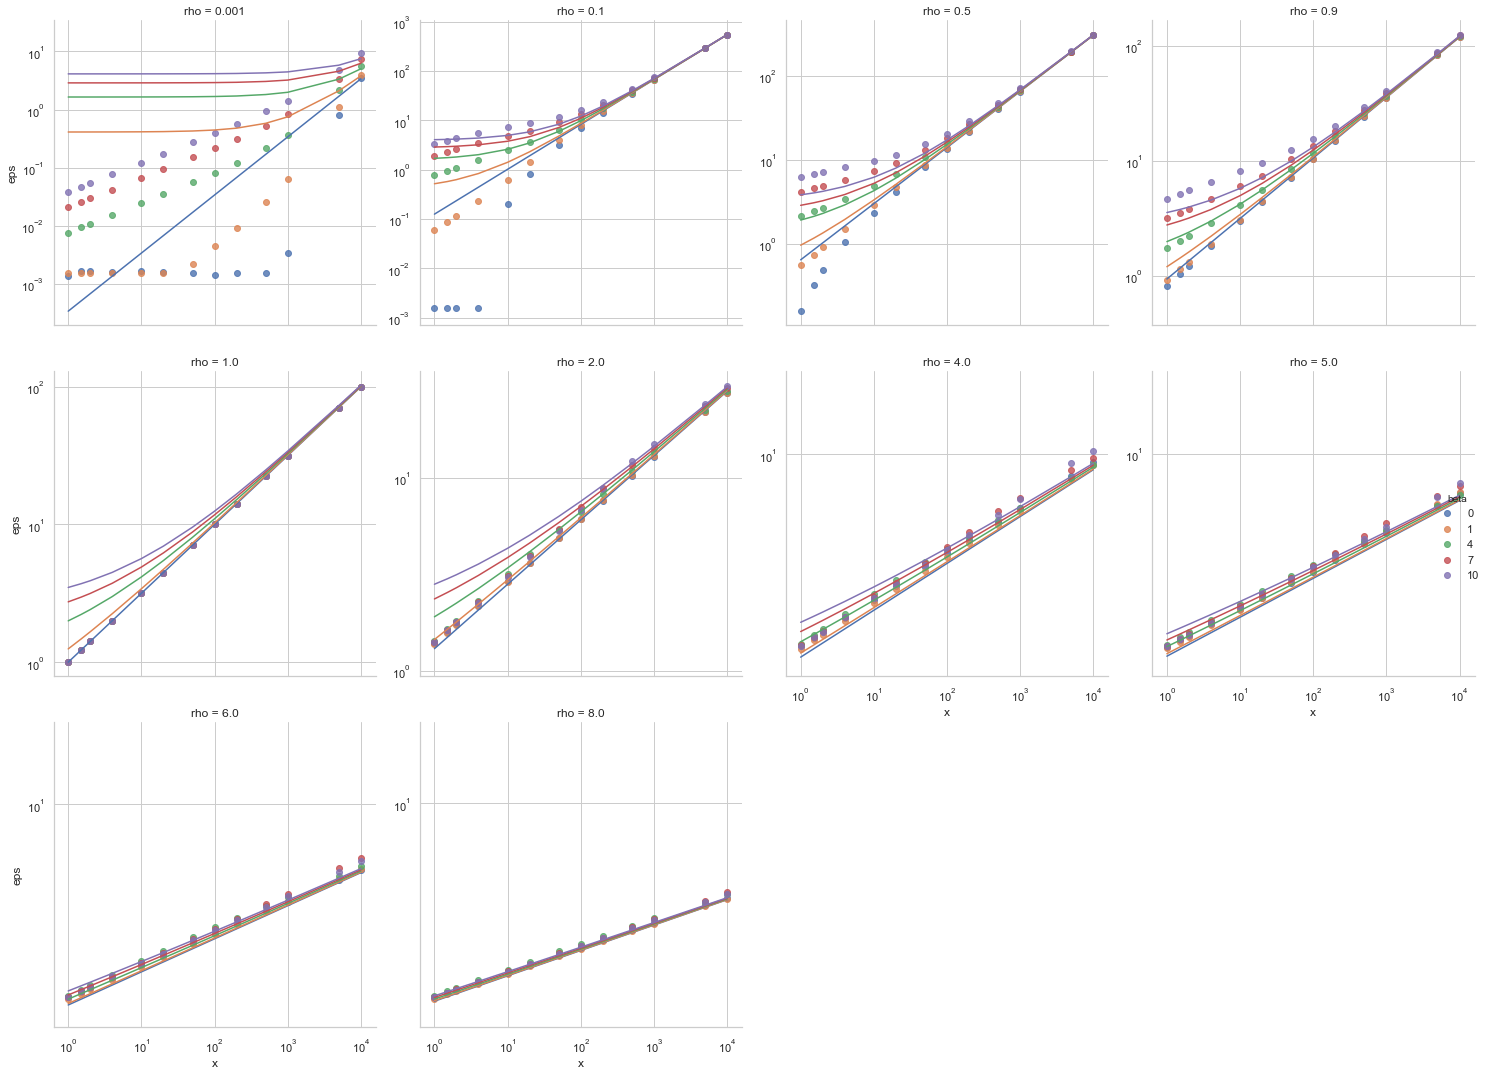

In [36]:
g = sns.lmplot(x = 'x', y = 'eps',
              hue='beta', col='rho',
              data = df,
              fit_reg=False,
              col_wrap=4,
              sharey=False)

#g = sns.FacetGrid(df, hue='beta', col='rho')
#g.map(plt.scatter, "x", "eps")

def my_fit(*args, **kwargs):
    x = args[0]
    rho = args[2].iloc[0]
    beta = args[3].iloc[0]
    y = func(pd.DataFrame({'x': x, 'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(x, y, **kwargs)

g.map(my_fit, 'x', 'eps', 'rho', 'beta')
g.set(xscale = 'log')
g.set(yscale = 'log')

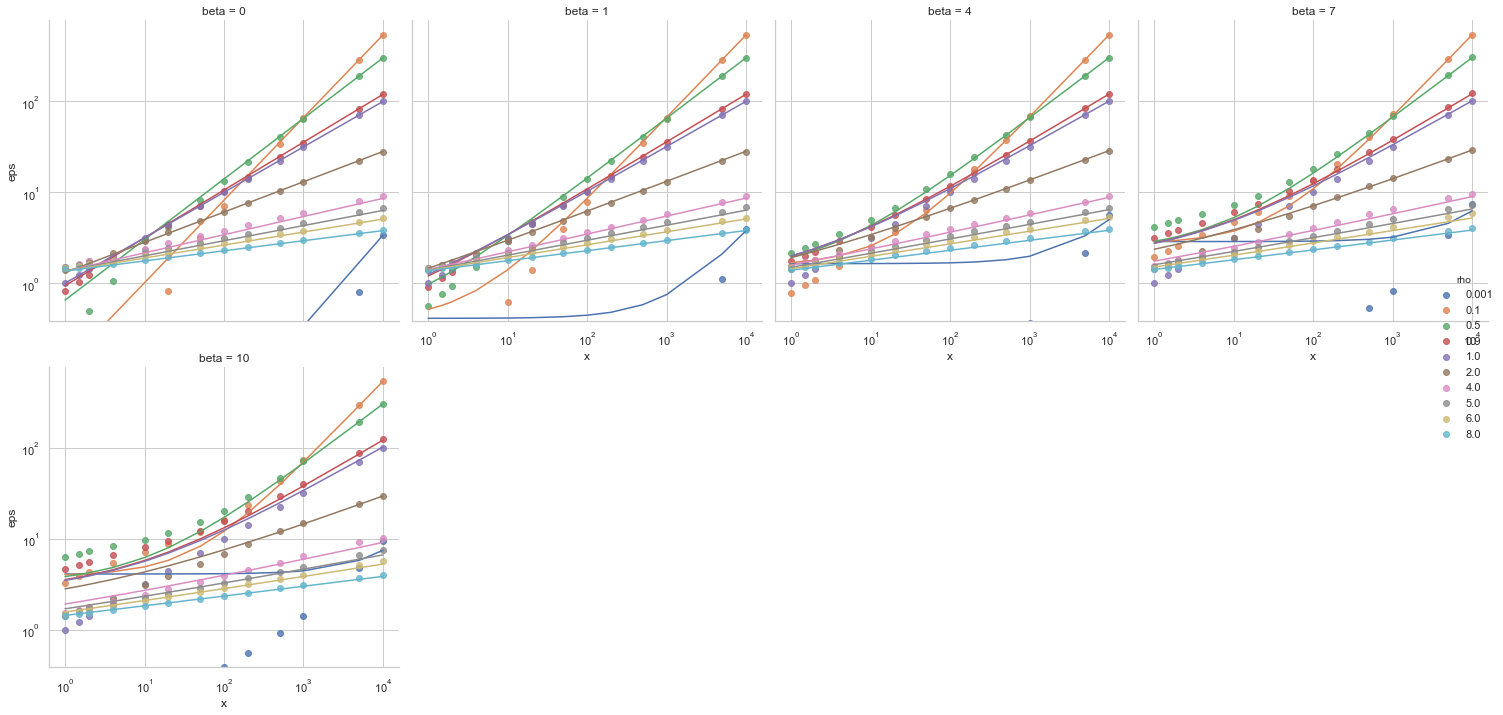

In [37]:
g = sns.lmplot(x = 'x', y = 'eps',
              col='beta', hue='rho',
              data = df,
              fit_reg=False,
              col_wrap=4)

#g = sns.FacetGrid(df, hue='beta', col='rho')
#g.map(plt.scatter, "x", "eps")

def my_fit(*args, **kwargs):
    x = args[0]
    rho = args[2].iloc[0]
    beta = args[3].iloc[0]
    y = func(pd.DataFrame({'x': x, 'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(x, y, **kwargs)

g.map(my_fit, 'x', 'eps', 'rho', 'beta')
g.set(xscale = 'log')
g.set(yscale = 'log')

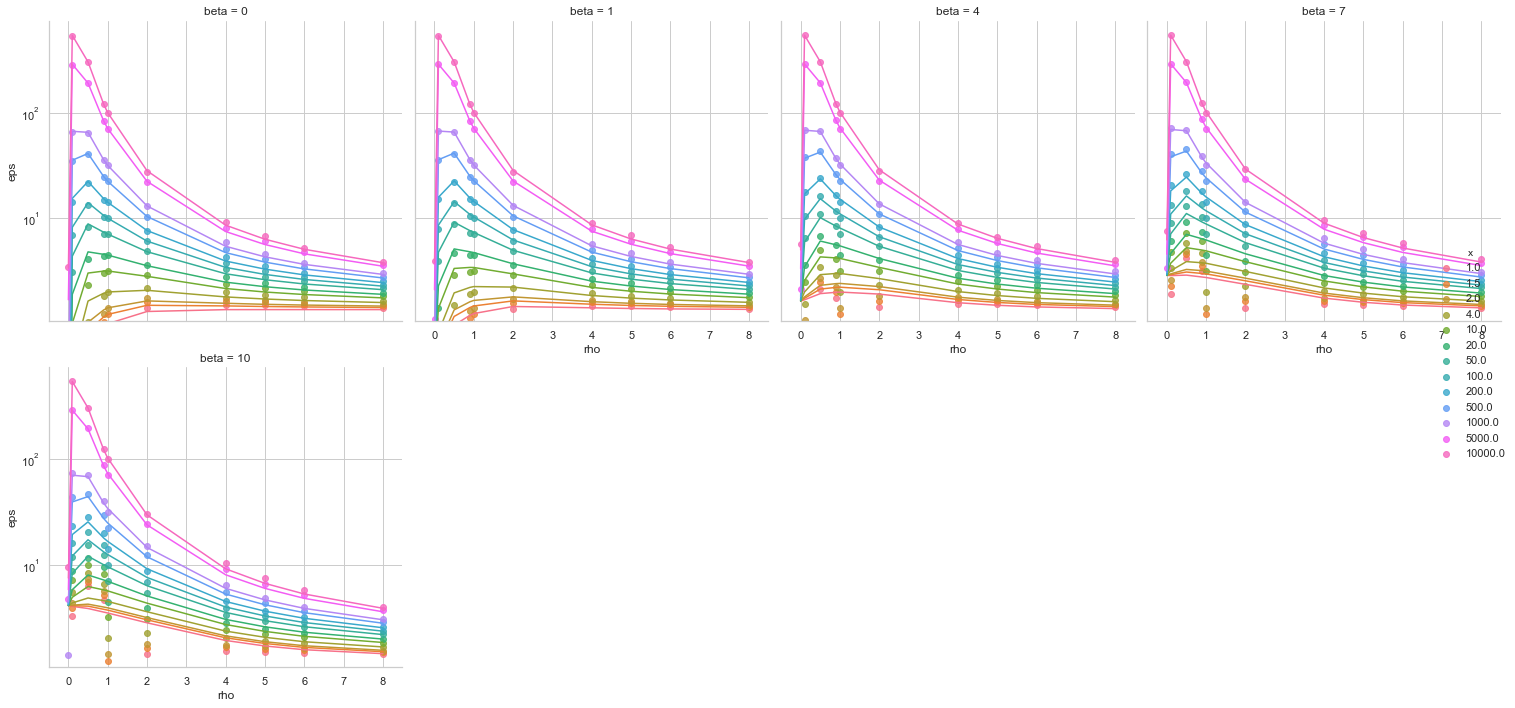

In [38]:
g = sns.lmplot(x = 'rho', y = 'eps',
              col='beta', hue='x',
              data = df,
              fit_reg=False,
              col_wrap=4)

#g = sns.FacetGrid(df, hue='beta', col='rho')
#g.map(plt.scatter, "x", "eps")

def my_fit(*args, **kwargs):
    x = args[2]
    rho = args[0]
    beta = args[3]
    y = func(pd.DataFrame({'x': x, 'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(rho, y, **kwargs)

g.map(my_fit, 'rho', 'eps', 'x' , 'beta')
g.set(yscale="log")

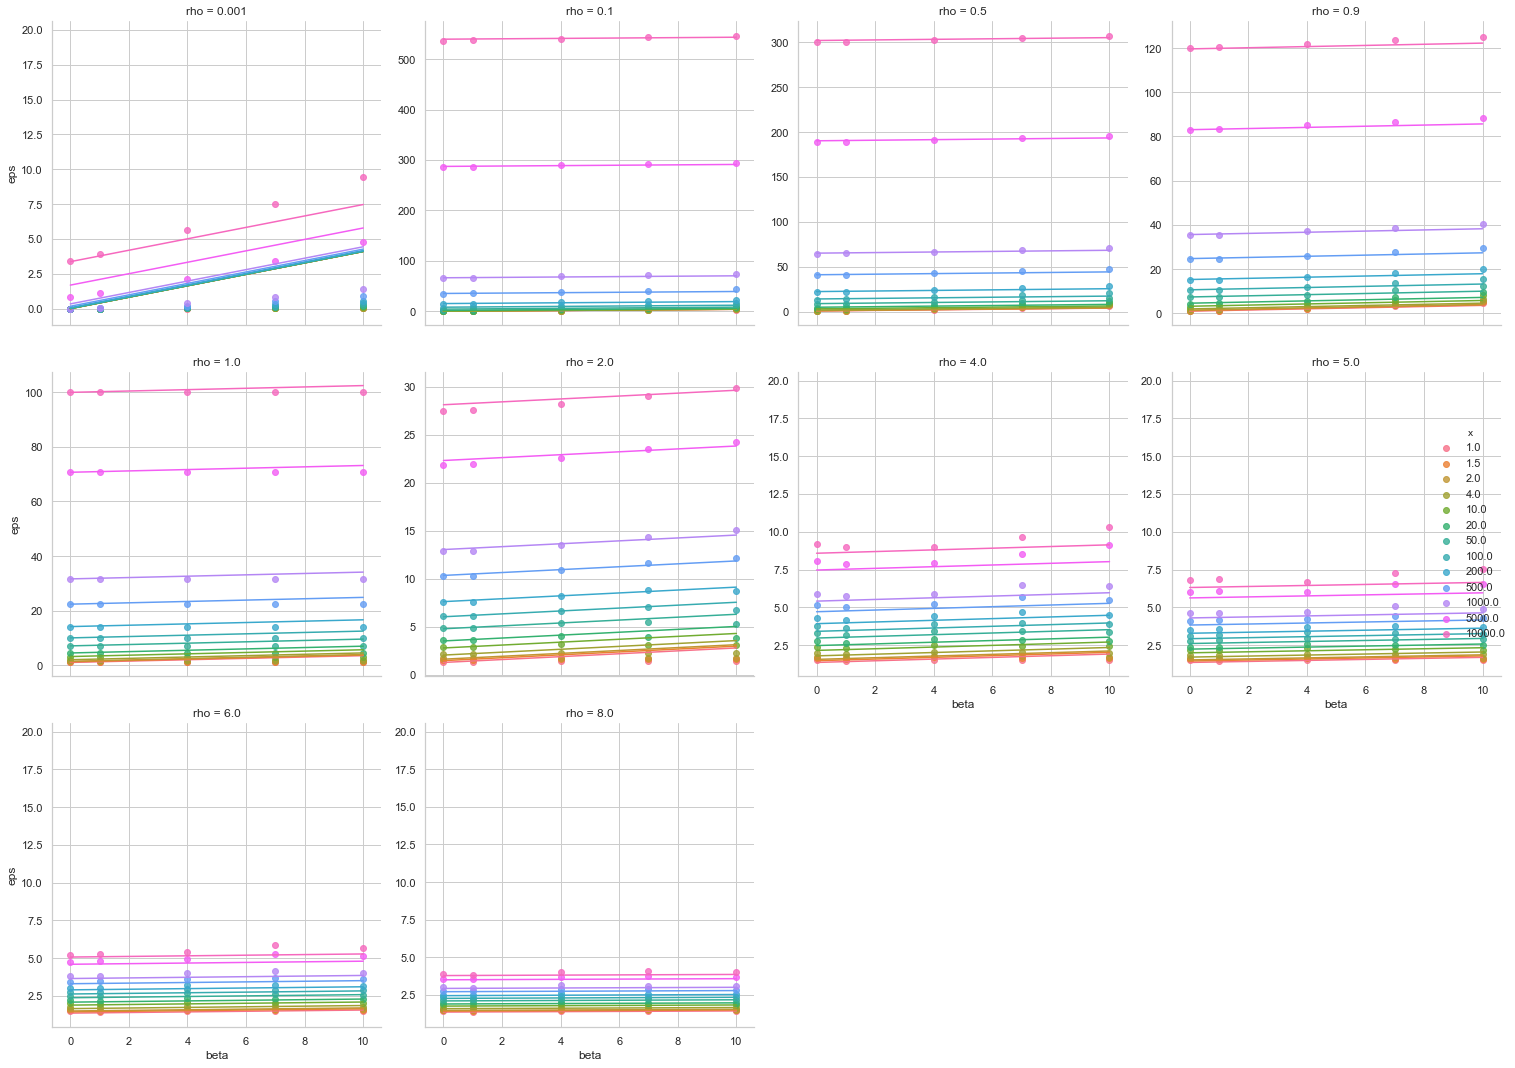

In [39]:
g = sns.lmplot(x = 'beta', y = 'eps',
              col='rho', hue='x',
              data = df,
              fit_reg=False,
              col_wrap=4,
              sharey=False)

#g = sns.FacetGrid(df, hue='beta', col='rho')
#g.map(plt.scatter, "x", "eps")

def my_fit(*args, **kwargs):
    x = args[2]
    rho = args[3]
    beta = args[0]
    y = func(pd.DataFrame({'x': x, 'rho':rho, 'beta': beta}), *func_params)
    kwargs['marker'] = None
    return plt.plot(beta, y, **kwargs)

g.map(my_fit, 'beta', 'eps', 'x' , 'rho')

#### Integrand K
Potentially probematic is the behaviour for $r \rightarrow 0$ of the term $(r+\epsilon)^{-\beta}$.

Text(0, 0.5, '$\\sin(x \\cdot (r+\\epsilon)^{-\\rho} \\cdot \\sin(\\pi\\rho) + \\pi\\beta)$')

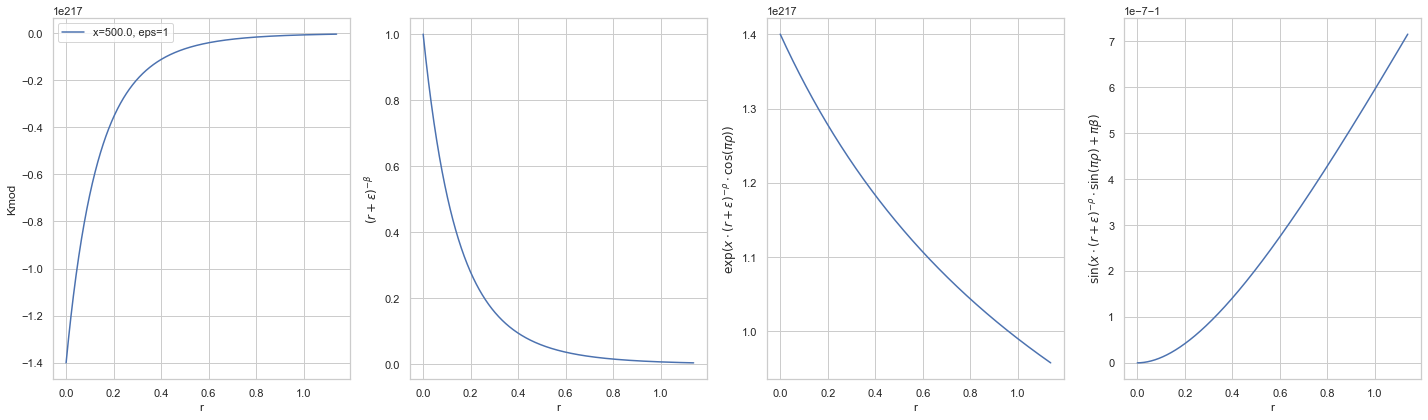

In [40]:
rho = 0.001
beta = 7
x = 500.

fig, axes = plt.subplots(1, 4, figsize=(4*5, 6), tight_layout=True)

eps = 1.
r = np.linspace(0, 1 + np.power(1e-6, 1./beta), 1_000)
y1 = Kmod(eps, rho, beta, x, r)
y2 = np.power(r+eps, -beta)

r_rho = np.power(r+eps, -rho)
y3 = np.exp(x * r_rho * np.cos(np.pi*rho))
y4 = np.sin(x * r_rho * np.sin(np.pi * rho) + np.pi * beta)

axes[0].plot(r, y1, label=f"x={x}, eps={1}")
axes[0].set_xlabel("r")
axes[0].set_ylabel("Kmod")
axes[0].legend()

axes[1].plot(r, y2)
axes[1].set_xlabel("r")
axes[1].set_ylabel(r"$(r+\epsilon)^{-\beta}$")

axes[2].plot(r, y3)
axes[2].set_xlabel("r")
axes[2].set_ylabel(r"$\exp(x \cdot (r+\epsilon)^{-\rho} \cdot \cos(\pi\rho))$")

axes[3].plot(r, y4)
axes[3].set_xlabel("r")
axes[3].set_ylabel(r"$\sin(x \cdot (r+\epsilon)^{-\rho} \cdot \sin(\pi\rho) + \pi\beta)$")

In [41]:
rho = 0.001
x = 100.

for beta in range(9):
    y1 = Wright_Series_MPMATH(rho, beta, x, steps=[2000], method='s')
    for eps in range(1, 10):
        y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=eps)
        print(f"beta={beta} and eps={eps} with precision {y2/y1-1}")
    print("\n")

beta=0 and eps=1 with precision -7.5474841118941277812E-14
beta=0 and eps=2 with precision -2.2876124077171079707E-13
beta=0 and eps=3 with precision -7.4686927090350475542E-13
beta=0 and eps=4 with precision -2.3484931633812244564E-12
beta=0 and eps=5 with precision -7.2041683353907324909E-12
beta=0 and eps=6 with precision -1.7231069679825641860E-11
beta=0 and eps=7 with precision -7.0092322467709008114E-11
beta=0 and eps=8 with precision -2.5053275055794905005E-10
beta=0 and eps=9 with precision -6.9638091485725475520E-10


beta=1 and eps=1 with precision 3.4532722140807534106E-13
beta=1 and eps=2 with precision -1.4829176061203434150E-14
beta=1 and eps=3 with precision -2.0963226034893204380E-14
beta=1 and eps=4 with precision -5.8819081705664254950E-14
beta=1 and eps=5 with precision -1.5118035726150716100E-13
beta=1 and eps=6 with precision -3.3835652819326229174E-13
beta=1 and eps=7 with precision -1.0246691572017856305E-12
beta=1 and eps=8 with precision -3.0536378259311087666E

Starting with $\beta >= 2$, setting $\epsilon = 2$ instead of $1$ is beneficial. For larger $\rho$, this starts earlier.

#### Look at K and P at the same time

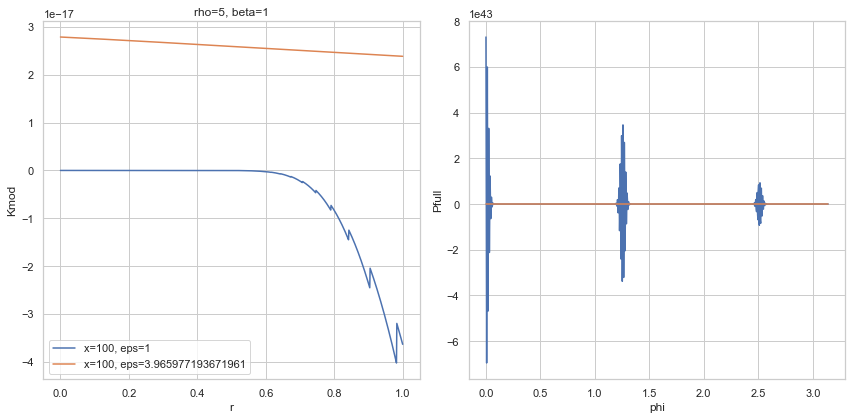

In [42]:
# look at special case
rho = 5 #0.001
beta = 1 #7
x = 100 #500.

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

eps = 1.
r = np.linspace(0, 1 + np.power(1e-6, 1./beta), 1_000)
y1 = Kmod(eps, rho, beta, x, r)
phi = np.linspace(0, np.pi, 1_000)
y2 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
        
# modified eps
eps = eps_select(rho, beta, x)   
y3 = Kmod(eps, rho, beta, x, r)
y4 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
    
axes[0].plot(r, y1, label=f"x={x}, eps={1}")
axes[0].plot(r, y3, label=f"x={x}, eps={eps}")
axes[1].plot(phi, y2, label=f"rho={x}, eps={1}")
axes[1].plot(phi, y4, label=f"rho={x}, eps={eps}")
axes[0].set_xlabel("r")
axes[0].set_ylabel("Kmod")
#axes[i, 0].set_yscale("log")
axes[0].legend()
axes[0].set_title(f"rho={rho}, beta={beta}")
axes[1].set_xlabel("phi")
axes[1].set_ylabel("Pfull")

fig.tight_layout()
#fig.subplots_adjust()

#fig.suptitle(f'Determin good eps for Kmod and Pfull')

#### Look at several cases for $K$ and $P$ at the same time

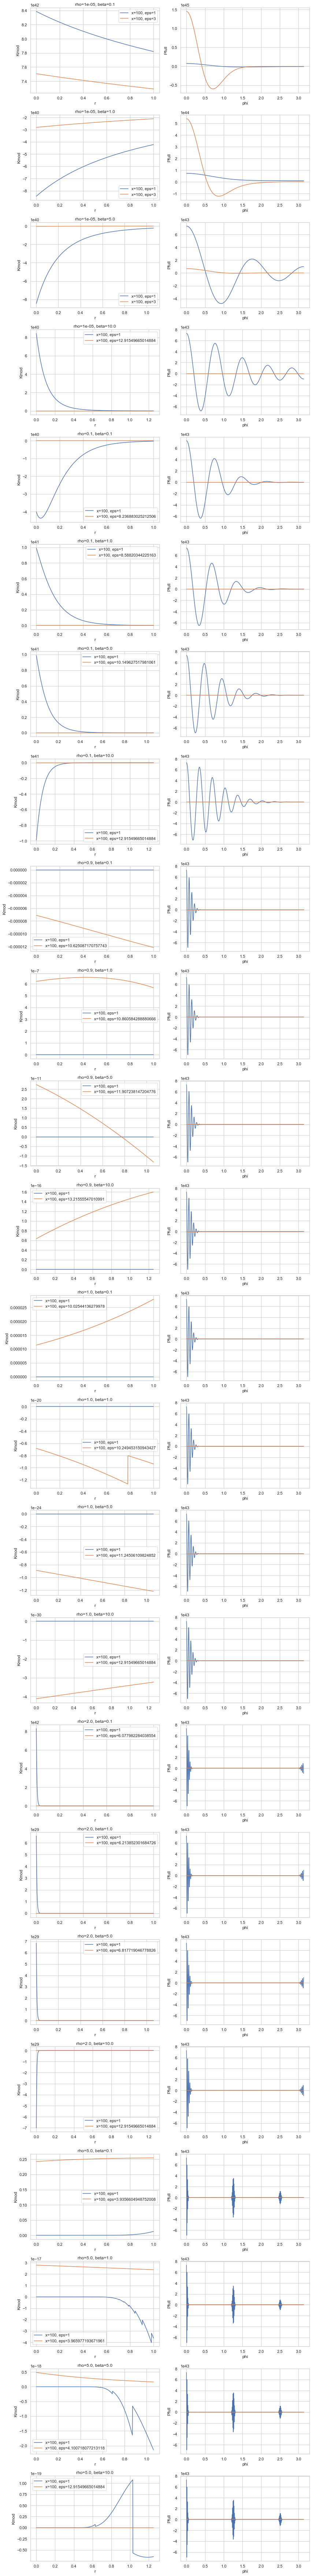

In [43]:
# Which epsilon ?

data_rho = np.array([1e-5, 0.1, 0.9, 1, 2, 5])
data_beta = np.array([0.1, 1, 5, 10])
grid = np.asarray(np.meshgrid(data_rho, data_beta)).T.reshape(-1, 2)

data_x = np.array([100])

fig, axes = plt.subplots(grid.shape[0], 2, figsize=(12, 4 * grid.shape[0] + 2))

for i in range(grid.shape[0]):
    rho, beta = grid[i, :]
    for x in data_x:
        eps = 1.
        r = np.linspace(0, 1 + np.power(1e-6, 1./beta), 1_000)
        y1 = Kmod(eps, rho, beta, x, r)
        phi = np.linspace(0, np.pi, 1_000)
        y2 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
        
        # modified eps
        eps = eps_select(rho, beta, x)
        
        y3 = Kmod(eps, rho, beta, x, r)
        y4 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
    
        axes[i, 0].plot(r, y1, label=f"x={x}, eps={1}")
        axes[i, 0].plot(r, y3, label=f"x={x}, eps={eps}")
        axes[i, 1].plot(phi, y2, label=f"rho={x}, eps={1}")
        axes[i, 1].plot(phi, y4, label=f"rho={x}, eps={eps}")
    axes[i, 0].set_xlabel("r")
    axes[i, 0].set_ylabel("Kmod")
    #axes[i, 0].set_yscale("log")
    axes[i, 0].legend()
    axes[i, 0].set_title(f"rho={rho}, beta={beta}")
    axes[i, 1].set_xlabel("phi")
    axes[i, 1].set_ylabel("Pfull")

fig.tight_layout()
#fig.subplots_adjust()

#fig.suptitle(f'Determin good eps for Kmod and Pfull')

In [44]:
# special case rho = 5
rho = 5.
beta = 1
z = 100
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='s')
y2 = Wright_Integral(rho, beta, z, n_laguerre=50, n_legendre=50)
y2/y1-1

-4.6620827248082356842e-14

In [45]:
# special case rho = 0
# This is a hard one for the integral!!!
rho = 0.
beta = 0.5
z = 1
y1 = np.exp(z)*ss.rgamma(beta)
y2 = Wright_Series_MPMATH(rho, beta, z, steps=[100])
y3 = Wright_Integral(rho, beta, z, n_laguerre=100, n_legendre=50)
y4 = Wright_Integral_quad(rho, beta, z)

y2/y1-1, y3/y1-1, y4/y1-1

(1.0008541304756812806e-16, -0.0490587907684068, -2.4313884239290928e-14)

In [46]:
# special case rho = 0
rho = 0.
beta = 1.5
z = 1
y1 = np.exp(z)*ss.rgamma(beta)
y2 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
y3 = Wright_Integral(rho, beta, z)
y2/y1-1, y3/y1-1

(1.0008541304756812806e-16, -1.3877787807814457e-14)

In [47]:
# special case rho = 0, beta=1
rho = 0.
beta = 1
z = 1
y1 = np.exp(z)*ss.rgamma(beta)
y2 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
y3 = Wright_Integral(rho, beta, z)
y2/y1-1, y3/y1-1

(5.3181810626308501089e-17, -2.9753977059954195e-14)

In [48]:
rho = -0.5
beta = 1.
z = 2
y1 = ss.erfc(-z/2.)
y2 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
y3 = Wright_Integral(rho, beta, z, n_laguerre=100, n_legendre=100)
y2/y1-1, y3/y1-1

(4.6790100006327550730e-17, -0.030064949146606623)

In [49]:
rho = -0.5
beta = 0.99
z = 2.
Wright_Series_MPMATH(rho, beta, z), Wright_Integral(rho, beta, z)

(1.8013566827720609548, 0.7782455056728405)

Text(0, 0.5, 'K')

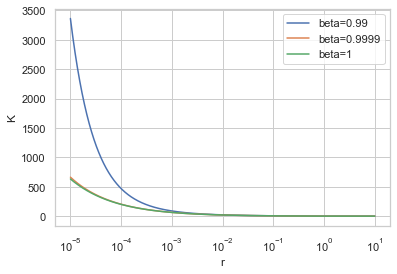

In [50]:
x = np.power(10, np.linspace(-5, 1, 10_000))
y1 = K(-0.5, 0.99, 2., x)
y2 = K(-0.5, 0.9999, 2., x)
y3 = K(-0.5, 1.0, 2., x)
plt.plot(x, y1, label="beta=0.99")
plt.plot(x, y2, label="beta=0.9999")
plt.plot(x, y3, label="beta=1")
plt.legend()
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("r")
plt.ylabel("K")

Text(0, 0.5, 'K')

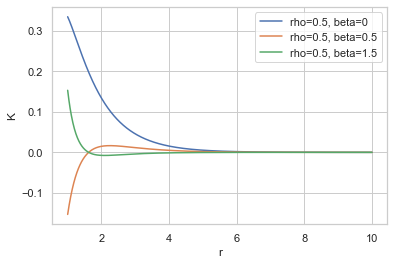

In [51]:
x = np.linspace(1, 10, 1_000)
y1 = K(0.5, 0, 2., x)
plt.plot(x, y1, label="rho=0.5, beta=0")
y2 = K(0.5, 0.5, 2., x)
plt.plot(x, y2, label="rho=0.5, beta=0.5")
y3 = K(0.5, 1.5, 2., x)
plt.plot(x, y3, label="rho=0.5, beta=1.5")
plt.legend()
plt.xlabel("r")
plt.ylabel("K")

Text(0, 0.5, 'P')

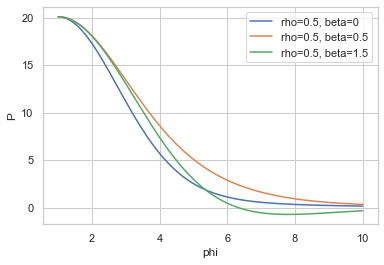

In [52]:
phi = np.linspace(0, np.pi, 1_000)
y1 = P(0.5, 0, 2., phi)
plt.plot(x, y1, label="rho=0.5, beta=0")
y2 = P(0.5, 0.5, 2., phi)
plt.plot(x, y2, label="rho=0.5, beta=0.5")
y3 = P(0.5, 1.5, 2., phi)
plt.plot(x, y3, label="rho=0.5, beta=1.5")
plt.legend()
plt.xlabel("phi")
plt.ylabel("P")

In [53]:
# special case rho=1 => Modified Bessel function of the first kind of real order 
# iv(v, z) = (1/2*z)**v * Phi(rho=1, beta=v+1, 1/4*z**2)
v = -0.5
x = 1.5
[np.power(0.5*x, v) * Wright_Series_MPMATH(1, 1+v, 1/4*x**2),
 np.power(0.5*x, v) * Wright_Integral(1, 1+v, 1/4*x**2),
 ss.iv(v, x)
]

[1.5325243293765750491, 1.5325243293765025, 1.532524329376576]

In [54]:
rho = 0.5
beta = 0.
x = 1.1
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x)
y2/y1-1

-1.1298149390467958700e-13

In [55]:
rho = 2.3
beta = 0.
x = 50.5
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[1000])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=3)
y2/y1-1

3.6046342573683477772e-14

In [56]:
rho = 0.1
beta = 2
x = 100
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y2/y1-1

0.000065798802950610526112

In [57]:
rho = 1
beta = 0
x = 100
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y2/y1-1

-1.5145713967658260696e-14

Text(0.5, 0.98, 'K and P for x=100.0 and eps=8.236883025212506')

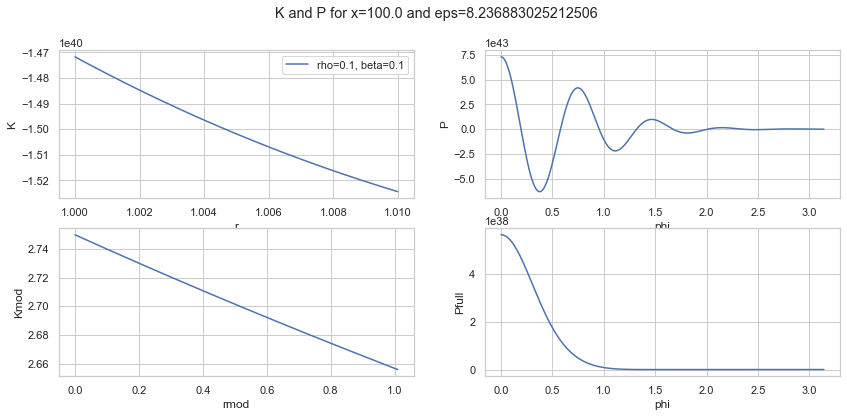

In [58]:
rho = 0.1
beta = 0.1
x = 100.

eps = eps_select(rho, beta, x)

r = np.linspace(1, 1.01, 1_000)
y1 = K(rho, beta, x, r)

r2 = np.linspace(0, 1.01, 1_000)
y2 = Kmod(eps, rho, beta, z, r2)

phi = np.linspace(0, np.pi, 1_000)
y3 = P(rho, beta, x, phi)
y4 = Pfull(eps, rho, beta, x, phi)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))
ax1.plot(r, y1, label=f"rho={rho}, beta={beta}")
ax1.legend()
ax1.set(xlabel="r", ylabel="K")
ax3.plot(r2, y2, label=f"rho={rho}, beta={beta}")
ax3.set(xlabel="rmod", ylabel="Kmod")

ax2.plot(phi, y3, label=f"rho={rho}, beta={beta}")
ax2.set(xlabel="phi", ylabel="P")
ax4.plot(phi, y4, label=f"rho={rho}, beta={beta}")
ax4.set(xlabel="phi", ylabel="Pfull")
fig.suptitle(f'K and P for x={x} and eps={eps}')

In [59]:
fixed_laguerre(lambda r: Kmod(eps, rho, beta, x, r), n=50)[0], \
np.power(eps, 1.-beta) * fixed_quad(lambda phi: Pfull(eps, rho, beta, x, phi), 0, np.pi, n=50)[0]

(6.496749014286437e+31, 1.5417289007523538e+39)

In [60]:
fixed_quad(lambda phi: P(rho, beta, x, phi), 0, np.pi, n=100), \
quad(lambda phi: P(rho, beta, x, phi), 0, np.pi, limit=1000, )

((5.1091032367569883e+39, None),
 (5.1091032367250945e+39, 4.727212154768601e+29))

Text(0, 0.5, '$\\Phi(2, 0, x)$')

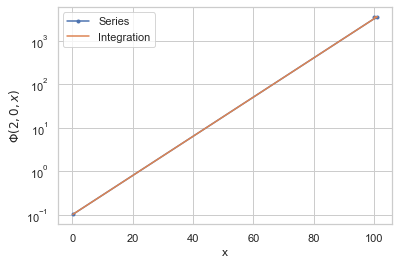

In [61]:
rho = 2.
beta = 0
x = [0.1, 101, 100]
y1 = np.array([Wright_Series_MPMATH(rho, beta, z, nstep=[100]) for z in x])
y2 = np.array([Wright_Integral(rho, beta, z) for z in x])

plt.plot(x, y1, '.-', label="Series")
plt.plot(x, y2, '-', label="Integration")
plt.yscale('log')
plt.legend()
plt.xlabel("x")
plt.ylabel(r"$\Phi(2, 0, x)$")

In [62]:
rho, beta = 10, 10
x = np.array([1, 2, 10, 100, 500])
y1 = np.array([Wright_Series_MPMATH(rho, beta, z, nstep=[100]) for z in x])
y2 = np.array([Wright_Integral(rho, beta, z) for z in x])
y2/y1 - 1

array([-1.9208767538278319342e-14, -1.9274265207957705370e-14,
       -1.8722444418645210057e-14, -1.8930850946086499875e-14,
       -1.9310660519635328147e-14], dtype=object)

In [63]:
z = 2
y1 = Wright_Series_MPMATH(rho, beta, z, nstep=[1000])
y2 = Wright_Integral(rho, beta, z, n_legendre=50)


eps = 2*np.power(z, 1/rho)
K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=50)
P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=50)
res = 1./np.pi * (K_int[0] + np.power(eps, 1.-beta) * P_int[0])
y2/y1 - 1, res/y1 - 1

(-1.9274265207957705370e-14, -4.0129497726919868134e-12)

Text(0.5, 0.98, 'K and P for x=1 and eps=12.91549665014884')

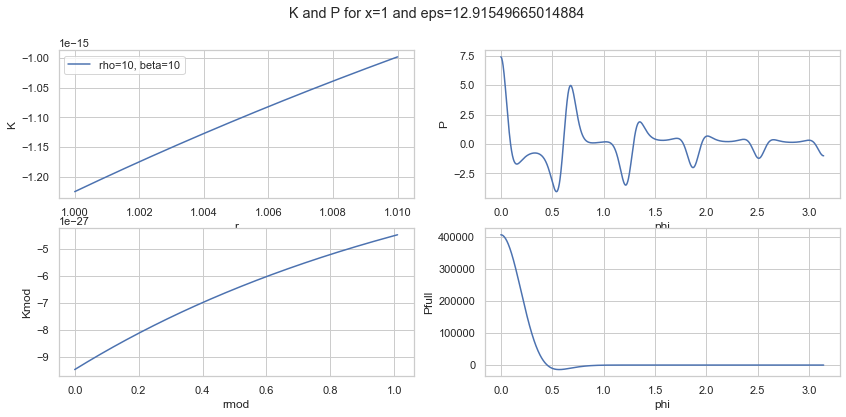

In [64]:
rho = 10
beta = 10
x = 1

eps = eps_select(rho, beta, x)

r = np.linspace(1, 1.01, 1_000)
y1 = K(rho, beta, x, r)

r2 = np.linspace(0, 1.01, 1_000)
y2 = Kmod(eps, rho, beta, z, r2)

phi = np.linspace(0, np.pi, 1_000)
y3 = P(rho, beta, x, phi)
y4 = Pfull(eps, rho, beta, x, phi)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))
ax1.plot(r, y1, label=f"rho={rho}, beta={beta}")
ax1.legend()
ax1.set(xlabel="r", ylabel="K")
ax3.plot(r2, y2, label=f"rho={rho}, beta={beta}")
ax3.set(xlabel="rmod", ylabel="Kmod")

ax2.plot(phi, y3, label=f"rho={rho}, beta={beta}")
ax2.set(xlabel="phi", ylabel="P")
ax4.plot(phi, y4, label=f"rho={rho}, beta={beta}")
ax4.set(xlabel="phi", ylabel="Pfull")
fig.suptitle(f'K and P for x={x} and eps={eps}')

In [65]:
rho = 0.1
beta = 10.
x = 2.1
y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y2/y1-1

-1.8437624507933268042e-14

Text(0.5, 0.98, 'K and P for x=2.1 and eps=12.91549665014884')

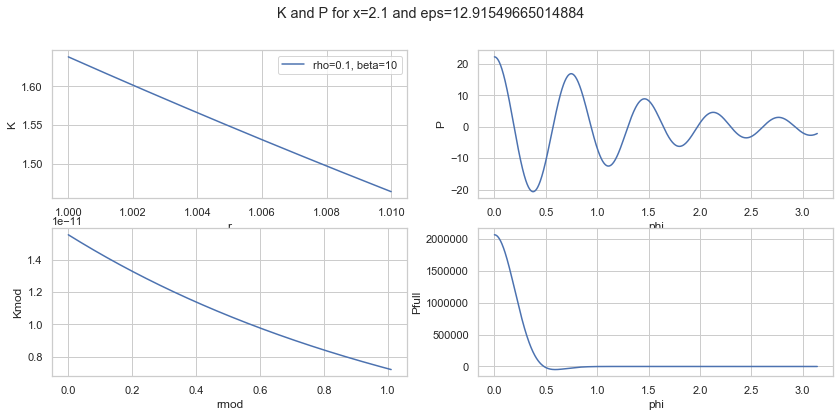

In [66]:
rho = 0.1
beta = 10
x = 2.1

eps = eps_select(rho, beta, x)

r = np.linspace(1, 1.01, 1_000)
y1 = K(rho, beta, x, r)

r2 = np.linspace(0, 1.01, 1_000)
y2 = Kmod(eps, rho, beta, z, r2)

phi = np.linspace(0, np.pi, 1_000)
y3 = P(rho, beta, x, phi)
y4 = Pfull(eps, rho, beta, x, phi)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))
ax1.plot(r, y1, label=f"rho={rho}, beta={beta}")
ax1.legend()
ax1.set(xlabel="r", ylabel="K")
ax3.plot(r2, y2, label=f"rho={rho}, beta={beta}")
ax3.set(xlabel="rmod", ylabel="Kmod")

ax2.plot(phi, y3, label=f"rho={rho}, beta={beta}")
ax2.set(xlabel="phi", ylabel="P")
ax4.plot(phi, y4, label=f"rho={rho}, beta={beta}")
ax4.set(xlabel="phi", ylabel="Pfull")
fig.suptitle(f'K and P for x={x} and eps={eps}')

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


(3.7622588069752322333e+31,
 3.76225877893833e+31,
 -7.4521460653801237196e-9,
 2.3264286557709039013e-11)

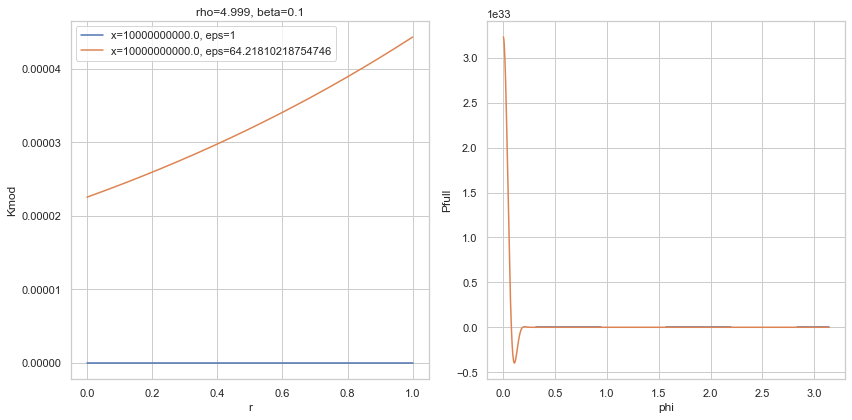

In [67]:
# look at special case
rho = 4.999
beta = 0.1
x = 1e10

fig, axes = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

eps = 1.
r = np.linspace(0, 1 + np.power(1e-6, 1./beta), 1_000)
y1 = Kmod(eps, rho, beta, x, r)
phi = np.linspace(0, np.pi, 1_000)
y2 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
        
# modified eps
eps = eps_select(rho, beta, x)   
y3 = Kmod(eps, rho, beta, x, r)
y4 = np.power(eps, 1.-beta) * Pfull(eps, rho, beta, x, phi)
    
axes[0].plot(r, y1, label=f"x={x}, eps={1}")
axes[0].plot(r, y3, label=f"x={x}, eps={eps}")
axes[1].plot(phi, y2, label=f"rho={x}, eps={1}")
axes[1].plot(phi, y4, label=f"rho={x}, eps={eps}")
axes[0].set_xlabel("r")
axes[0].set_ylabel("Kmod")
#axes[i, 0].set_yscale("log")
axes[0].legend()
axes[0].set_title(f"rho={rho}, beta={beta}")
axes[1].set_xlabel("phi")
axes[1].set_ylabel("Pfull")

y1 = Wright_Series_MPMATH(rho, beta, x, steps=[100])
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=eps)
y3 = Wright_Asymptotic(rho, beta, x)
y1, y2, y2/y1-1, y3/y1-1

In [68]:
rho = 1
beta = 10
x = 1000
np.power(rho*x, 1/(1+rho))
y1 = float(Wright_Series_MPMATH(rho, beta, x, steps=[2000], dps=50))
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50)
y3 = Wright_Asymptotic(rho, beta, x)
y2/y1-1, y3/y1-1

(-3.47499806707674e-14, 2.773311231107911e-06)

In [69]:
rho = 1
beta = 100
x = 100_000
np.power(rho*x, 1/(1+rho))
y1 = float(Wright_Series_MPMATH(rho, beta, x, steps=[2000], dps=50))
y2 = Wright_Integral(rho, beta, x, n_laguerre=50, n_legendre=50, eps=100_000)
y3 = Wright_Asymptotic(rho, beta, x)
y2/y1-1, y3/y1-1

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(nan, 372436.10590366233)

In [70]:
K(rho, beta, x, 5.)

0.0

## 5. Taylor Series in rho - For small rho<a id="series_rho_small"></a>
[back to TOC](#toc)
$$\Phi(\rho, \beta, z) = \Phi(0, \beta, z)
    + \rho \frac{\partial}{\partial\rho}\Phi(\rho, \beta, z|_{\rho=0}
    + \frac{\rho^2}{2} \frac{\partial^2}{\partial\rho^2}\Phi(\rho, \beta, z|_{\rho=0} + O(\rho^3)$$
This gives:
$$\Phi(\rho, \beta, z) = \frac{e^z}{\Gamma(\beta)}
\left[1 - \rho \cdot z\cdot  \Psi(\beta) + \frac{\rho^2}{2}z(1+z)\left(\Psi(\beta)^2 - \Psi^\prime(\beta)\right)
-\frac{\rho^3}{6} z (z^2+3z+1) (\Psi(\beta)^3 - 3 \Psi(\beta) \Psi^\prime(\beta)) + \Psi^{\prime\prime}(\beta)\right]$$
For small $\beta$, one needs as series expression in $\beta=0$. The Laurent series of $\Psi$ follows from:
$$\Psi(\beta+1) = \Psi(\beta)+\frac{1}{\beta}$$ and
$$\Psi(\beta+1) = -\gamma_E + \sum_{k=2}(-1)^k \zeta(k) \beta^{k-1}$$

### Expansion of $\Phi(\rho, \beta, z)$ in $\rho=0$

In [95]:
rho, beta, z, k = symbols("rho beta z k")
expression = sympy.Sum(z**k/sympy.factorial(k)/gamma(rho*k+beta), (k, 0, S.Infinity))

In [62]:
# 1. term
expression.diff(rho, 1).subs(rho, 0).simplify().doit()

-z*exp(z)*polygamma(0, beta)/gamma(beta)

In [63]:
# 2. term
expression.diff(rho, 2).subs(rho, 0).simplify().doit()

z*(z + 1)*(polygamma(0, beta)**2 - polygamma(1, beta))*exp(z)/gamma(beta)

In [64]:
# 3. term
expression.diff(rho, 3).subs(rho, 0).simplify().doit().simplify()

-z*(z**2 + 3*z + 1)*(polygamma(0, beta)**3 - 3*polygamma(0, beta)*polygamma(1, beta) + polygamma(2, beta))*exp(z)/gamma(beta)

In [65]:
print(pycode(expression.diff(rho, 3).subs(rho, 0).simplify().doit().simplify() * gamma(beta)/sympy.exp(z)))

  # Not supported in Python:
  # polygamma
  # polygamma
  # polygamma
-z*(z**2 + 3*z + 1)*(polygamma(0, beta)**3 - 3*polygamma(0, beta)*polygamma(1, beta) + polygamma(2, beta))


In [115]:
# 4. term
term4 = expression.diff(rho, 4).subs(rho, 0).simplify().doit().simplify()
term4

z*(z**3 + 6*z**2 + 7*z + 1)*(polygamma(0, beta)**4 - 6*polygamma(0, beta)**2*polygamma(1, beta) + 4*polygamma(0, beta)*polygamma(2, beta) + 3*polygamma(1, beta)**2 - polygamma(3, beta))*exp(z)/gamma(beta)

In [116]:
print(pycode(term4 * gamma(beta)/sympy.exp(z)))

  # Not supported in Python:
  # polygamma
  # polygamma
  # polygamma
  # polygamma
z*(z**3 + 6*z**2 + 7*z + 1)*(polygamma(0, beta)**4 - 6*polygamma(0, beta)**2*polygamma(1, beta) + 4*polygamma(0, beta)*polygamma(2, beta) + 3*polygamma(1, beta)**2 - polygamma(3, beta))


In [68]:
# 5. term
term5 = expression.diff(rho, 5).subs(rho, 0).simplify().doit().simplify()
term5

-z*(z**4 + 10*z**3 + 25*z**2 + 15*z + 1)*(polygamma(0, beta)**5 - 10*polygamma(0, beta)**3*polygamma(1, beta) + 10*polygamma(0, beta)**2*polygamma(2, beta) + 15*polygamma(0, beta)*polygamma(1, beta)**2 - 5*polygamma(0, beta)*polygamma(3, beta) - 10*polygamma(1, beta)*polygamma(2, beta) + polygamma(4, beta))*exp(z)/gamma(beta)

In [69]:
print(pycode(term5 * gamma(beta)/sympy.exp(z)))

  # Not supported in Python:
  # polygamma
  # polygamma
  # polygamma
  # polygamma
  # polygamma
-z*(z**4 + 10*z**3 + 25*z**2 + 15*z + 1)*(polygamma(0, beta)**5 - 10*polygamma(0, beta)**3*polygamma(1, beta) + 10*polygamma(0, beta)**2*polygamma(2, beta) + 15*polygamma(0, beta)*polygamma(1, beta)**2 - 5*polygamma(0, beta)*polygamma(3, beta) - 10*polygamma(1, beta)*polygamma(2, beta) + polygamma(4, beta))


In [70]:
# 6. term
term6 = expression.diff(rho, 6).subs(rho, 0).simplify().doit().simplify()
term6

z*(z**5 + 15*z**4 + 65*z**3 + 90*z**2 + 31*z + 1)*(polygamma(0, beta)**6 - 15*polygamma(0, beta)**4*polygamma(1, beta) + 20*polygamma(0, beta)**3*polygamma(2, beta) + 45*polygamma(0, beta)**2*polygamma(1, beta)**2 - 15*polygamma(0, beta)**2*polygamma(3, beta) - 60*polygamma(0, beta)*polygamma(1, beta)*polygamma(2, beta) + 6*polygamma(0, beta)*polygamma(4, beta) - 15*polygamma(1, beta)**3 + 15*polygamma(1, beta)*polygamma(3, beta) + 10*polygamma(2, beta)**2 - polygamma(5, beta))*exp(z)/gamma(beta)

In [71]:
print(pycode(term6 * gamma(beta)/sympy.exp(z)))

  # Not supported in Python:
  # polygamma
  # polygamma
  # polygamma
  # polygamma
  # polygamma
  # polygamma
z*(z**5 + 15*z**4 + 65*z**3 + 90*z**2 + 31*z + 1)*(polygamma(0, beta)**6 - 15*polygamma(0, beta)**4*polygamma(1, beta) + 20*polygamma(0, beta)**3*polygamma(2, beta) + 45*polygamma(0, beta)**2*polygamma(1, beta)**2 - 15*polygamma(0, beta)**2*polygamma(3, beta) - 60*polygamma(0, beta)*polygamma(1, beta)*polygamma(2, beta) + 6*polygamma(0, beta)*polygamma(4, beta) - 15*polygamma(1, beta)**3 + 15*polygamma(1, beta)*polygamma(3, beta) + 10*polygamma(2, beta)**2 - polygamma(5, beta))


### Expansion of $\Phi(\rho, \beta, z)$ in $\rho=0$ and $\beta=0$

In [96]:
# Note that polygamma(2, 1) = -2*zeta(3)
tmp = sympy.expand_func(polygamma(2, 1)+2*zeta(3), deep=True)
tmp, tmp.n()

(polygamma(2, 1) + 2*zeta(3), 0.e-125)

In [97]:
# expansion of digamma
def dg_series(z, n):
    return -1/z - EulerGamma + sympy.summation((-1)**k*sympy.zeta(k)*z**(k-1), (k, 2, n+1))

def pg_series(k, z, n):
    return sympy.diff(dg_series(z, n+k), z, k)

In [98]:
dg_series(beta, 3)

pi**4*beta**3/90 - beta**2*zeta(3) + pi**2*beta/6 - EulerGamma - 1/beta

In [99]:
pg_series(1, beta, 1)

-2*beta*zeta(3) + pi**2/6 + beta**(-2)

In [100]:
[(dg_series(z, n) / digamma(z) - 1).evalf(subs={z: 1e-3}) for n in range(4)]

[1.64278754882936e-6,
 -1.20028476561603e-9,
 1.08066532166488e-12,
 -1.03531552087320e-15]

In [101]:
# digamma / gamma
tmp = (dg_series(beta, 10) / gamma(beta)).series(beta, 0, n=5).removeO()
tmp.subs(polygamma(2, 1), -2*zeta(3))

beta**4*(-5*EulerGamma*zeta(3)/3 - pi**4/288 - 5*EulerGamma**4/24 + 5*EulerGamma**2*pi**2/24) + beta**3*(-4*zeta(3)/3 - 2*EulerGamma**3/3 + EulerGamma*pi**2/3) + beta**2*(-3*EulerGamma**2/2 + pi**2/4) - 2*EulerGamma*beta - 1

In [102]:
(tmp / (digamma(beta)/gamma(beta)) - 1).evalf(subs={beta: 1e-3})

2.52962173713632e-16

In [103]:
# precision of this series
((-1 - 2*EulerGamma*z + z**2*(-3/2*EulerGamma**2 + pi**2/4) \
 +z**3*(-zeta(3) + polygamma(2,1)/6 - 2*EulerGamma**2/3 + EulerGamma*pi**2/3)) \
 /(digamma(z)/gamma(z)) - 1).evalf(20, subs={z: 1e-3})

9.2968688498369478994e-11

In [104]:
# (digamma(beta)**2 −polygamma(1, beta)) / gamma(beta)
tmp = (dg_series(beta, 6)**2 - sympy.diff(dg_series(beta, 7), beta)) / gamma(beta)
tmp = tmp.series(beta, 0, n=3).removeO()
tmp

beta**2*(-EulerGamma*pi**2 + 2*EulerGamma**3 + 4*zeta(3)) + beta*(-pi**2/2 + 3*EulerGamma**2) + 2*EulerGamma

In [105]:
(tmp / ((digamma(beta)**2 - polygamma(1, beta))/gamma(beta)) - 1).evalf(subs={beta: 1e-3})

-2.89397543606885e-9

In [106]:
# precision of this series
((2*EulerGamma + z*(3*EulerGamma**2 - pi**2/2) \
 +z**2*(2*EulerGamma**3 - EulerGamma*pi**2 + 4*zeta(3))) \
 /((digamma(z)**2 - polygamma(1, z))/gamma(z)) - 1).evalf(20, subs={z: 1e-3})

-2.8939754360688517690e-9

In [107]:
# (digamma(beta)**3 - 3*digamma(beta)*polygamma(1, beta) + polygamma(2, beta)) / gamma(beta)
dg, dg1, dg2 = symbols("dg dg1 dg2")
tmp = (dg**3 - 3*dg*dg1 + dg2) / gamma(beta)
tmp = tmp.subs({dg: dg_series(beta, 8),
                dg1: sympy.diff(dg_series(beta, 9), beta),
                dg2: sympy.diff(dg_series(beta, 10), beta, 2)})
tmp = tmp.series(beta, 0, n=3).removeO()
tmp

beta**2*(-20*EulerGamma*zeta(3) - pi**4/24 - 5*EulerGamma**4/2 + 5*EulerGamma**2*pi**2/2) + beta*(-8*zeta(3) - 4*EulerGamma**3 + 2*EulerGamma*pi**2) - 3*EulerGamma**2 + pi**2/2

In [108]:
(tmp / ((digamma(beta)**3 - 3*digamma(beta)*polygamma(1, beta) \
         + polygamma(2, beta))/gamma(beta)) - 1).evalf(subs={beta: 1e-3})

-1.28694191034336e-9

In [109]:
# precision of this series
((pi**2/2 - 3*EulerGamma**2 + z*(-8*zeta(3) - 4*EulerGamma**3 + 2*EulerGamma*pi**2) \
 +0) \
 /((digamma(z)**3 - 3*digamma(z)*polygamma(1, z) \
         + polygamma(2, z))/gamma(z)) - 1).evalf(20, subs={z: 1e-3})

2.5372395196394660908e-6

In [110]:
# (dg**4 - 6*dg**2*dg1 + 4*dg*dg2 + 3*dg1**2 - dg3) / gamma(beta)
dg, dg1, dg2, dg3 = symbols("dg dg1 dg2 dg3")
tmp = (dg**4 - 6*dg**2*dg1 + 4*dg*dg2 + 3*dg1**2 - dg3) / gamma(beta)
tmp = tmp.subs({dg: dg_series(beta, 8),
                dg1: sympy.diff(dg_series(beta, 9), beta),
                dg2: sympy.diff(dg_series(beta, 10), beta, 2),
                dg3: sympy.diff(dg_series(beta, 10), beta, 3)})
tmp = tmp.series(beta, 0, n=2).removeO()
tmp

beta*(-5*EulerGamma**2*pi**2 + 5*EulerGamma**4 + pi**4/12 + 40*EulerGamma*zeta(3)) - 2*EulerGamma*pi**2 + 4*EulerGamma**3 + 8*zeta(3)

In [111]:
((tmp / ((dg**4 - 6*dg**2*dg1 + 4*dg*dg2 + 3*dg1**2 - dg3)/gamma(beta)) - 1)
 .subs({dg: digamma(beta),
        dg1: polygamma(1, beta),
        dg2: polygamma(2, beta),
        dg3: polygamma(3, beta)}
      ).evalf(subs={beta: 1e-3}))

-1.53824006067103e-5

In [112]:
# precision of this series
(((8*zeta(3) + 4*EulerGamma**3 - 2*EulerGamma*pi**2 \
  +z*(40*EulerGamma*zeta(3)+5*EulerGamma**4-5*EulerGamma**2*pi**2+pi**4/12)) \
 /((dg**4 - 6*dg**2*dg1 + 4*dg*dg2 + 3*dg1**2 - dg3)/gamma(z)) - 1)
 .subs({dg: digamma(z),
        dg1: polygamma(1, z),
        dg2: polygamma(2, z),
        dg3: polygamma(3, z)}
      ).evalf(20, subs={z: 1e-3}))

-0.000015382400606710321729

In [113]:
# term 5
tmp = term5/(z*(z**4+10*z**3+25*z**2+15*z+1)*sympy.exp(z))
tmp = tmp.replace(polygamma, lambda n, x: pg_series(n, x, 6)).series(beta, 0, n=1).removeO()
tmp

-5*EulerGamma**2*pi**2 + 5*EulerGamma**4 + pi**4/12 + 40*EulerGamma*zeta(3)

In [119]:
# term 6
tmp = term6/(z*(z**5 + 15*z**4 + 65*z**3 + 90*z**2 + 31*z + 1) * sympy.exp(z))
tmp = tmp.replace(polygamma, lambda n, x: pg_series(n, x, 7)).series(beta, 0, n=1).removeO()
tmp

-20*pi**2*zeta(3) - 10*EulerGamma**3*pi**2 + 6*EulerGamma**5 + EulerGamma*pi**4/2 + 120*EulerGamma**2*zeta(3) + 144*zeta(5)

In [71]:
def Wright_small_rho(rho, beta, z, order=2):
    if beta <= 1e-3:
        M_EG = float(sympy.EulerGamma.evalf())
        M_PI = float(sympy.pi.evalf())
        M_Z3 = ss.zeta(3)
        M_Z5 = ss.zeta(5)
        # First term of expansion in beta at 0
        # digamma(z)/Gamma(z) = −1 − 2*EulerGamma*z  + z**2*(-3/2*EulerGamma**2 + pi**2/4) + O(z^3)
        # digamma(z)^2/Gamma(z) = 1/z + 3*EulerGamma
        #                       + z*(−5/12*PI^2+7/2*EulerGamma^2) + O(z^2)
        # polygamma(1, z)/Gamma(z) = 1/z + EulerGamma
        #                          + z*(1/12*PI^2 + 1/2*EulerGamma^2)+ O(z)
        C0 = 1
        C1 = 2*M_EG
        C2 = 3*M_EG**2 - M_PI**2/2
        C3 = 8*M_Z3 + 4*M_EG**3 - 2*M_EG*M_PI**2
        C4 = 40*M_EG*M_Z3 + 5*M_EG**4 - 5*M_EG**2*M_PI**2 + M_PI**4/12
        C5 = 144*M_Z5 + (120*M_EG**2 - 20*M_PI**2)*M_Z3 + 6*M_EG**5 - 10*M_EG**3*M_PI**2 + 1/2*M_EG*M_PI**4
        res = ss.rgamma(beta)
        res += rho*z*(C0 + C1*beta + C2*beta**2/2 + C3*beta**3/6 + C4*beta**4/24)
        res += rho**2/2*z*(1+z) * (C1 + C2*beta + C3*beta**2/2 + C4*beta**3/6)
        res += rho**3/6 * z*(z**2+3*z+1) * (C2 + C3*beta + C4*beta**2/2)
        res += rho**4/24 * z*(z**3+6*z**2+7*z+1) *(C3 + C4*beta)
        res += rho**5/120 * z*(z**4+10*z**3+25*z**2+15*z+1) * C4
        #res += rho**6/720 * z*(z**5 + 15*z**4 + 65*z**3 + 90*z**2 + 31*z + 1) * C5
        res *= np.exp(z)
    else:
        dg = ss.digamma(beta)
        pg1 = ss.polygamma(1, beta)
        if order <= 2:
            res = 1 + rho*z*(-dg + rho/2*(1+z)*(dg**2 - pg1))
        else:
            if order > 5:
                order = 5
            Z1 = z
            Z2 = z*(z + 1)
            Z3 = z*(z*(z + 3) + 1)
            Z4 = z*(z*(z*(z + 6) + 7) + 1)
            Z5 = z*(z*(z*(z*(z + 10) + 25) + 15) + 1)
            
            pg2 = ss.polygamma(2, beta)
            B0 = 1
            B1 = -dg
            B2 = dg**2 - pg1
            B3 = (-dg**2 + 3*pg1)*dg - pg2
            
            A = np.zeros(order+1)
            A[order] = 1
            A[order-1] = Z1 * B1
            A[order-2] = Z2 * B2 / 2.
            A[order-3] = Z3 * B3 / 6.
            if order >= 4:
                pg3 = ss.polygamma(3, beta)
                B4 = ((dg**2 - 6*pg1)*dg + 4*pg2)*dg + 3*pg1**2 - pg3
                A[order-4] = Z4 * B4 / 24.
            if order >= 5:
                pg4 = ss.polygamma(4, beta)
                B5 = ((((-dg**2 + 10*pg1)*dg - 10*pg2)*dg - 15*pg1**2
                      + 5*pg3)*dg + 10*pg1*pg2 - pg4)
                A[order-5] = Z5 * B5 / 120.
            res = np.polyval(A, rho)
            
        res *= np.exp(z) * ss.rgamma(beta)
    return res

In [257]:
z = 8
rho = 1e-3
beta = 2e-3
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='d', dpi=50)
for order in [3, 4, 5]:
    y2 = Wright_small_rho(rho, beta, z, order=order)
    print(f"order={order} accuracy = {y2/y1-1}")

order=3 accuracy = 2.9127683001962584633E-8
order=4 accuracy = -1.4393247716373017619E-9
order=5 accuracy = 4.4939765460777795700E-12


Small beta

In [258]:
# values rho, beta, z
values = [[1e-3, 2e-3, 1],
          [1e-3, 1e-3, 1],
          [1e-3, 1e-4, 1],
          [1e-3, 1e-5, 1]]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='d') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=4) for rho, beta, z in values]
np.array(y2)/np.array(y1)-1

array([-2.8695721742810070820e-12, 1.8473744533903033171e-14,
       8.9708903689865102105e-15, 8.2525251145519271101e-15], dtype=object)

In [259]:
# values rho, beta, z
values = [[1e-3, 1e-3, 8],
          [1e-4, 1e-3, 100],
          [1e-5, 1e-3, 700]]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='d') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=4) for rho, beta, z in values]
np.array(y2)/np.array(y1)-1

array([8.0564697877664060571e-12, 7.6419673405081142703e-12,
       1.4016114725551483133e-12], dtype=object)

In [260]:
z = 1
rho = 1e-3
beta = 1e-10
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='d', dpi=50)
y2 = Wright_small_rho(rho, beta, z)
y2/y1-1

8.7200822192386173715e-15

#### order = 2
rho=1e-3 and z<=1e-5 => 1e-11 precision

rho=1e-4 and z<=1e-2 => 1e-11 precision

rho=1e-5 and z<=1 => 1e-11 precision

In [261]:
# values rho, beta, z
values = [[1E-3, 2e-3, 1e-5],
          [1E-3, 2e-3, 1e-4],
          [1e-3, 2e-3, 1e-3],
          [1E-4, 2e-3, 1e-3],
          [1E-4, 2e-3, 1e-2],
          [1e-4, 2e-3, 1e-1],
          [1E-5, 2e-3, 1e-1],
          [1E-5, 2e-3, 1e+0],
          [1e-5, 2e-3, 1e+1],
         ]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='r') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=2) for rho, beta, z in values]
for i, [rho, beta, z] in enumerate(values):
    print(f"rho={rho} z={z} accuracy={(np.array(y2)/np.array(y1)-1)[i]}")

rho=0.001 z=1e-05 accuracy=3.2774608781728541487E-12
rho=0.001 z=0.0001 accuracy=3.2782914839325359886E-11
rho=0.001 z=0.001 accuracy=3.2856548861856516019E-10
rho=0.0001 z=0.001 accuracy=3.2893974104611627823E-13
rho=0.0001 z=0.01 accuracy=3.3741242069627473341E-12
rho=0.0001 z=0.1 accuracy=4.2718832164294904055E-11
rho=1e-05 z=0.1 accuracy=4.2920509607893321535E-14
rho=1e-05 z=1.0 accuracy=1.6303656168848270139E-12
rho=1e-05 z=10.0 accuracy=4.0885737922371589818E-10


order 4: rho=1e-3 and z<=1 => 1e-11 precision

#### order = 3
rho=1e-3 and z<=1e-1 => 1e-11 precision

rho=1e-4 and z<=1 => 1e-11 precision

rho=1e-5 and z<=10 => 1e-11 precision

In [262]:
# values rho, beta, z
values = [[1E-3, 2e-3, 1e-2],
          [1E-3, 2e-3, 1e-1],
          [1e-3, 2e-3, 1e-0],
          [1E-4, 2e-3, 1e0],
          [1E-4, 2e-3, 1e1],
          [1e-4, 2e-3, 1e2],
          [1E-5, 2e-3, 1e1],
          [1E-5, 2e-3, 1e2],
          [1e-5, 2e-3, 709.7827128933840],
         ]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='r') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=3) for rho, beta, z in values]
for i, [rho, beta, z] in enumerate(values):
    print(f"rho={rho} z={z} accuracy={(np.array(y2)/np.array(y1)-1)[i]}")

rho=0.001 z=0.01 accuracy=2.1360055210857802760E-13
rho=0.001 z=0.1 accuracy=3.3567311680493235396E-12
rho=0.001 z=1.0 accuracy=1.9844359543195327911E-10
rho=0.0001 z=1.0 accuracy=2.8656393460967967413E-14
rho=0.0001 z=10.0 accuracy=2.2305193411416898014E-11
rho=0.0001 z=100.0 accuracy=3.3902508577106414776E-8
rho=1e-05 z=10.0 accuracy=3.4477205568565413851E-15
rho=1e-05 z=100.0 accuracy=1.4177427537414633886E-11
rho=1e-05 z=709.782712893384 accuracy=1.0959241678743845516E-8


#### order = 4
rho=1e-3 and z<=1 => 1e-11 precision

rho=1e-4 and z<=10 => 1e-11 precision

rho=1e-5 and z<=100 => 1e-11 precision

In [263]:
# values rho, beta, z
values = [[1E-3, 2e-3, 1e0],
          [1E-3, 2e-3, 1e1],
          [1e-3, 2e-3, 1e2],
          [1E-4, 2e-3, 1e0],
          [1E-4, 2e-3, 1e1],
          [1e-4, 2e-3, 1e2],
          [1E-5, 2e-3, 1e1],
          [1E-5, 2e-3, 1e2],
          [1e-5, 2e-3, 709.7827128933840],
         ]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='r') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=4) for rho, beta, z in values]
for i, [rho, beta, z] in enumerate(values):
    print(f"rho={rho} z={z} accuracy={(np.array(y2)/np.array(y1)-1)[i]}")

rho=0.001 z=1.0 accuracy=-2.8695721742810070820E-12
rho=0.001 z=10.0 accuracy=-3.0999049728297183178E-9
rho=0.001 z=100.0 accuracy=-0.000016586761169705798902
rho=0.0001 z=1.0 accuracy=-1.7821403803641028274E-16
rho=0.0001 z=10.0 accuracy=-1.2485441740678121167E-13
rho=0.0001 z=100.0 accuracy=-1.5109579828230710837E-9
rho=1e-05 z=10.0 accuracy=2.2575799736579416077E-16
rho=1e-05 z=100.0 accuracy=-6.0877796978031726433E-14
rho=1e-05 z=709.782712893384 accuracy=-3.3107980090819178311E-10


#### order = 5
rho=1e-3 and z<=10 => 1e-11 precision

rho=1e-4 and z<=100 => 1e-11 precision

rho=1e-5 and z<=709. => 1e-11 precision

In [264]:
# values rho, beta, z
values = [[1E-3, 2e-3, 1e0],
          [1E-3, 2e-3, 1e1],
          [1e-3, 2e-3, 1e2],
          [1E-4, 2e-3, 1e1],
          [1E-4, 2e-3, 1e2],
          [1e-4, 2e-3, 709.7827128933840],
          [1E-5, 2e-3, 1e1],
          [1E-5, 2e-3, 1e2],
          [1e-5, 2e-3, 709.7827128933840],
         ]
y1 = [Wright_Series_MPMATH(rho, beta, z, steps=[1000], method='r') for rho, beta, z in values]
y2 = [Wright_small_rho(rho, beta, z, order=5) for rho, beta, z in values]
for i, [rho, beta, z] in enumerate(values):
    print(f"rho={rho} z={z} accuracy={(np.array(y2)/np.array(y1)-1)[i]}")

rho=0.001 z=1.0 accuracy=2.8542994384055456192E-15
rho=0.001 z=10.0 accuracy=1.1370932473535907796E-11
rho=0.001 z=100.0 accuracy=4.6599564988755676025E-7
rho=0.0001 z=10.0 accuracy=3.0559254671040647633E-16
rho=0.0001 z=100.0 accuracy=4.0485051376999920195E-12
rho=0.0001 z=709.782712893384 accuracy=7.4013592581913983156E-8
rho=1e-05 z=10.0 accuracy=2.2575799736579416077E-16
rho=1e-05 z=100.0 accuracy=1.7994029118291454683E-16
rho=1e-05 z=709.782712893384 accuracy=6.0207821699434244805E-13


In [265]:
df = pd.DataFrame({'order': [2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
                  'rho': [1e-3, 1e-4, 1e-5, 1e-3, 1e-4, 1e-5, 1e-3, 1e-4, 1e-5, 1e-3, 1e-4, 1e-5],
                  'z': [1e-5, 1e-2, 1, 1e-1, 1, 1e1, 1, 1e1, 1e2, 1e1, 1e2, 709.7827128933840]})
df['rho*z'] = df['rho'] * df['z']
df

,order,rho,z,rho*z
0,2,0.00100,0.000010,1.000000e-08
1,2,0.00010,0.010000,1.000000e-06
2,2,0.00001,1.000000,1.000000e-05
3,3,0.00100,0.100000,1.000000e-04
4,3,0.00010,1.000000,1.000000e-04
5,3,0.00001,10.000000,1.000000e-04
6,4,0.00100,1.000000,1.000000e-03
7,4,0.00010,10.000000,1.000000e-03
8,4,0.00001,100.000000,1.000000e-03
9,5,0.00100,10.000000,1.000000e-02


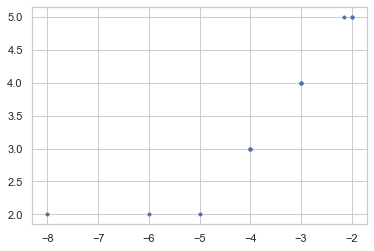

In [266]:
plt.plot(np.log10(df['rho']*df['z']), df['order'], '.')

#### search beta <= limit

In [353]:
rho = 1e-5
beta = 173
z = 709
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[2000], method='r')
y2 = Wright_small_rho(rho, beta, z, order=5)
y1, y2, y2/y1-1

(0.00037121252675391608485, 0.0003712125267526788, -3.3330959359247351766e-12)

In [363]:
rho = 1e-4
beta = 70
z = 100
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[2000], method='r')
y2 = Wright_small_rho(rho, beta, z, order=5)
y1, y2, y2/y1-1

(1.5056530199528238559e-55, 1.5056530199383544e-55, -9.6100749758884647898e-12)

In [313]:
rho = 1e-3
beta = 50.
z = 9
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z, order=5)
y1, y2/y1-1

(1.2862437599334149479e-59, -9.4200810626132746618e-12)

Test some values

In [208]:
rho = 1E-2
beta = 0.1
z = 1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(0.000028228800904533011296,
 -5.0917098383208495146e-8,
 -6.1672277249135150725e-9)

In [209]:
rho = 1E-2
beta = 50.1
z = 1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(0.000049858448682023658057,
 -1.4572186534442560811e-6,
 3.9297720196126219609e-8)

In [210]:
rho = 1E-3
beta = 0.1
z = 1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(3.0919532727669181427e-8,
 -4.9619255652858678708e-12,
 -6.8368705641796371358e-14)

In [211]:
rho = 1E-4
beta = 0.1
z = 1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(3.1213761984526786943e-11,
 -6.0241999648262545275e-16,
 -2.1426630137039506807e-16)

In [212]:
rho = 1E-4
beta = 0.1
z = 10
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(8.1016953561552064672e-9,
 -5.4808301672241164018e-13,
 -2.8355622225793332414e-15)

In [213]:
rho = 1E-4
beta = 0.1
z = 100
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(5.8246448849020611557e-6,
 -3.2974472990223105558e-9,
 -1.3207877855447185990e-10)

In [214]:
rho = 1E-5
beta = 0.1
z = 1
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(3.0888569222471858045e-14,
 -3.8713132634489444417e-16,
 -3.8713132634489444417e-16)

In [215]:
rho = 1E-5
beta = 0.1
z = 10
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(8.1781675818882147710e-12,
 -1.1481277490147864806e-16,
 -1.1481277490147864806e-16)

In [216]:
rho = 1E-5
beta = 0.1
z = 100
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y3 = Wright_small_rho(rho, beta, z, order=3)
y4 = Wright_small_rho(rho, beta, z, order=4)
y2/y1-1, y3/y1-1, y4/y1-1

(6.3707393800267357120e-9,
 -3.4744784462449173484e-13,
 -1.2200721864557249885e-15)

In [217]:
rho = 1E-6
beta = 0.1
z = 10
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z)
y2/y1-1

8.0717056031697625995e-15

In [174]:
rho = 1e-3
beta = 2e-3
z = 1e-5
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100], method='r')
y2 = Wright_small_rho(rho, beta, z, order=2)
y2/y1-1

3.2774608781728541487e-12

## 6. Taylor Series for large rho and large z<a id="series_rho_large"></a>
[back to TOC](#toc)

For $\rho >= 1$ we can use a Stirling approximation to find the largest term in $k$.

In [72]:
def Wright_large_rho(rho, beta, z, n=20):
    k_max = int(np.power(np.power(1.*rho, -rho) * z, 1/(1+rho)))
    #print(k_max)
    k_start = max(0, k_max - n//2)
    
    res = 0
    lnz = np.log(z)
    for k in range(k_start, k_start + n):
        exponent = k * lnz - ss.loggamma(k+1) - ss.loggamma(rho*k+beta)
        #print(k, " ", exponent)
        #print(k, " ", np.exp(exponent))
        res += np.exp(exponent)
    return res

In [8]:
rho = 10
beta = 10.3
z = 1E20
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1_000], method='r')
y2 = Wright_large_rho(rho, beta, z)
y3 = Wright_Series(rho, beta, z, nstop=5)
y4 = Wright_Asymptotic(rho, beta, z)
y1, y2/y1-1, y3/y1-1, y4/y1-1

(13105081926519195809.,
 7.9219242588870163180e-14,
 -0.99983781142514353881,
 -3.2676784069786812267e-7)

In [172]:
rho = 10
beta = 100
z = 1e20
order = int(np.fmin(np.log10(z) - 5 + beta/10, 30))
print(f"order={order}")
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1_000], method='r')
y2 = Wright_large_rho(rho, beta, z, n=order)
y1, y2/y1-1

order=25


(1.8571851438779072711e-156, -1.0494570503957224850e-14)

In [9]:
# Hardest is low rho, start with rho = 5
rho = 5
beta = 0
z = 1e10
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1_000], method='r')
y2 = Wright_large_rho(rho, beta, z, n=20)
y3 = Wright_Asymptotic(rho, beta, z)
y2/y1-1, y3/y1-1

(-1.1719041877700797920e-9, 2.3225026292612600126e-11)

In [15]:
# Hardest is low rho, start with rho = 5
rho = 10.
beta = 0
z = 1e20
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1_000], method='r')
y2 = Wright_large_rho(rho, beta, z, n=20)
y3 = Wright_Asymptotic(rho, beta, z)
y2/y1-1, y3/y1-1

(6.1502955573983393578e-14, 2.3129853414516513097e-7)

In [451]:
%%time
# Grid search for region of convergence, hardest is low rho, start with rho=5
rho = np.array([4, 5., 6, 10])
beta = np.array([0., 5])
x = np.power(10., range(1, 16))
n = np.arange(3, 21) * 2
df = pd.DataFrame(np.asarray(np.meshgrid(rho, beta, x, n)).T.reshape(-1, 4), columns=['rho', 'beta', 'x', 'n'])

df['n'] = df['n'].astype('int')
df['Wright_large_rho'] = 0.
df['MPMATH'] = 0.

for index, row in df.iterrows():
    # Note: itterrows gives back a copy not a view
    # row[..] = does not work
    df.at[index , 'Wright_large_rho'] = Wright_large_rho(row['rho'], row['beta'], row['x'], n=int(row['n']))
    df.at[index , 'MPMATH'] = float(Wright_Series_MPMATH(row['rho'], row['beta'], row['x'], dps=30,
                                                         steps=[200], maxterms=1000, method='s'))

df['rel_error'] = df['Wright_large_rho']/df['MPMATH'] - 1

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


CPU times: user 1min 46s, sys: 173 ms, total: 1min 46s
Wall time: 1min 46s


In [452]:
with pd.option_context("display.max_rows", 150, "display.float_format", '{:.4g}'.format):
    display(df.query("rho >= 10 and abs(rel_error) > 1e-14").sort_values(by=['rho', 'beta', 'x']))

,rho,beta,x,n,Wright_large_rho,MPMATH,rel_error
102,10,0,1e+13,6,4.575e+08,4.575e+08,-2.343e-14
110,10,0,1e+14,6,6.043e+10,6.043e+10,-1.657e-10
118,10,0,1e+15,6,2.502e+13,2.502e+13,-4.003e-07
111,10,5,1e+14,6,9772,9772,-1.119e-12
119,10,5,1e+15,6,1.398e+06,1.398e+06,-7.832e-09


In [453]:
with pd.option_context("display.max_rows", 150, "display.float_format", '{:.4g}'.format):
    display(df.query("5 <= rho < 10 and abs(rel_error) > 1e-11").sort_values(by=['rho', 'beta', 'x']))

,rho,beta,x,n,Wright_large_rho,MPMATH,rel_error
34,5,0,1e+05,6,1.989e+04,1.989e+04,-7.9e-09
42,5,0,1e+06,6,3.687e+06,3.687e+06,-4.278e-05
162,5,0,1e+06,8,3.687e+06,3.687e+06,-3.3e-10
50,5,0,1e+07,6,6.818e+09,6.982e+09,-0.02348
170,5,0,1e+07,8,6.982e+09,6.982e+09,-1.756e-05
...,...,...,...,...,...,...,...
1077,6,5,1e+15,22,9.441e+79,9.441e+79,-1.031e-06
1197,6,5,1e+15,24,9.441e+79,9.441e+79,-1.074e-07
1317,6,5,1e+15,26,9.441e+79,9.441e+79,-9.504e-09
1437,6,5,1e+15,28,9.441e+79,9.441e+79,-7.154e-10


In [454]:
with pd.option_context("display.max_rows", 150, "display.float_format", '{:.4g}'.format):
    display(df.query("abs(rel_error) <= 1e-12").groupby(['rho', 'beta', 'x']).agg({'n': 'min'}))

n
rho beta x        
4   0    10      6
         100     6
         1000    8
         1e+04  10
         1e+05  12
         1e+06  16
         1e+07  20
         1e+08  28
         1e+09  36
    5    10      6
         100     6
         1000    6
         1e+04   8
         1e+05  10
         1e+06  14
         1e+07  20
         1e+08  26
         1e+09  34
5   0    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   8
         1e+06  10
         1e+07  12
         1e+08  16
         1e+09  20
         1e+10  24
         1e+11  30
         1e+12  34
         1e+13  40
    5    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   8
         1e+06   8
         1e+07  12
         1e+08  14
         1e+09  18
         1e+10  24
         1e+11  28
         1e+12  32
         1e+13  40
6   0    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   6
         1e+06   8
         1e+07   8
         1e+08  10
         1e+09  12
         1e+10  14
         1e+11  18
         1e+12  22
         1e+13  26
         1e+14  30
         1e+15  36
    5    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   6
         1e+06   6
         1e+07   8
         1e+08  10
         1e+09  12
         1e+10  14
         1e+11  18
         1e+12  20
         1e+13  24
         1e+14  28
         1e+15  34
10  0    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   6
         1e+06   6
         1e+07   6
         1e+08   6
         1e+09   6
         1e+10   6
         1e+11   6
         1e+12   6
         1e+13   6
         1e+14   8
         1e+15   8
    5    10      6
         100     6
         1000    6
         1e+04   6
         1e+05   6
         1e+06   6
         1e+07   6
         1e+08   6
         1e+09   6
         1e+10   6
         1e+11   6
         1e+12   6
         1e+13   6
         1e+14   8
         1e+15   8

## 7. Check Precision on Data Grid <a id="grid"></a>
[back to TOC](#toc)

In [362]:
rho = 1.8
beta = 100
z = 1e5
y1 = float(Wright_Series_MPMATH(rho, beta, z, dps=50, steps=[1000], maxterms=2000, method='s'))
y2 = Wright_Series(rho, beta, z, nstart=0, nstop=40)
y3 = Wright_Asymptotic(rho, beta, z, order=8)
y4 = Wright_Integral(rho, beta, z)
y5 = Wright_small_rho(rho, beta, z)
y6 = Wright_large_rho(rho, beta, z)

{'Phi':y1,
 'Z': (rho*z)**(1/(1+rho)),
 'Z_limit': 14 + beta**2 / (2 * (1 + rho)),
 'eps_select': eps_select(rho, beta, z),
 'precision Series': y2/y1-1,
 'precision Asympt': y3/y1-1,
 'precision Integral': y4/y1-1,
 'precision small rho': y5/y1-1,
 'precision large rho': y6/y1-1,
}

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


{'Phi': 2.7844296176636242e-148,
 'Z': 75.31527003270547,
 'Z_limit': 1799.7142857142858,
 'eps_select': 114.76157527896652,
 'precision Series': -4.588940338834391e-10,
 'precision Asympt': 1.1640425329444341e+17,
 'precision Integral': -1.7853196698780494e-10,
 'precision small rho': inf,
 'precision large rho': -0.9999619112654368}

In [282]:
A = [0.41037, 0.30833, 6.9952, 18.382, -2.8566, 2.1122]
(A[0] * beta * np.exp(-0.5*rho)
 + np.exp(A[1] + 1/(1+rho) * np.log(z) - A[2] * np.exp(-A[3]*rho) + A[4] / (1 + np.exp(A[5]*rho))),
np.power(beta, -beta / (1. - beta)) + 0.1 * beta)

(75.72552478146449, 114.76157527896652)

In [278]:
beta = 100
z = 1000
0.1 * beta * (1 + 0.5*np.log(1+0.001*z))

13.465735902799727

In [73]:
rho = 1
beta = 10
z = 1000
y1 = float(Wright_Series_MPMATH(rho, beta, z, dps=50, steps=[1000], maxterms=2000, method='s'))
y2 = Wright_Series(rho, beta, z, nstart=0, nstop=30)
y3 = Wright_Asymptotic(rho, beta, z, order=7)
y4 = Wright_Integral(rho, beta, z, eps=30)
y5 = Wright_small_rho(rho, beta, z)
y6 = Wright_large_rho(rho, beta, z)

{'Phi':y1,
 'Z': (rho*z)**(1/(1+rho)),
 'Z_limit': 15 + beta**2 / (10 * (1 + rho)),
 'eps_select': eps_select(rho, beta, z),
 'precision Series': y2/y1-1,
 'precision Asympt': y3/y1-1,
 'precision Integral': y4/y1-1,
 'precision small rho': y5/y1-1,
 'precision large rho': y6/y1-1,
}

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


{'Phi': 2446819552254.583,
 'Z': 31.622776601683793,
 'Z_limit': 20.0,
 'eps_select': 34.11353940392128,
 'precision Series': -0.27494552817797435,
 'precision Asympt': -6.897911397629741e-08,
 'precision Integral': -9.43689570931383e-14,
 'precision small rho': inf,
 'precision large rho': -0.04148817263384408}

In [74]:
rho = 1
beta = 100
z = 100_000
y1 = float(Wright_Series_MPMATH(rho, beta, z, dps=50, steps=[1000], maxterms=2000, method='s'))
y2 = Wright_Series(rho, beta, z, nstart=0, nstop=30)
y3 = Wright_Asymptotic(rho, beta, z, order=7)
y4 = Wright_Integral(rho, beta, z, eps=30)
y5 = Wright_small_rho(rho, beta, z)
y6 = Wright_large_rho(rho, beta, z)

{'Phi':y1,
 'Z': (rho*z)**(1/(1+rho)),
 'Z_limit': 15 + beta**2 / (10 * (1 + rho)),
 'eps_select': eps_select(rho, beta, z),
 'precision Series': y2/y1-1,
 'precision Asympt': y3/y1-1,
 'precision Integral': y4/y1-1,
 'precision small rho': y5/y1-1,
 'precision large rho': y6/y1-1,
}

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


{'Phi': 1.0269334596230763e+22,
 'Z': 316.22776601683796,
 'Z_limit': 515.0,
 'eps_select': 100,
 'precision Series': -1.0,
 'precision Asympt': -382299.31505776744,
 'precision Integral': nan,
 'precision small rho': inf,
 'precision large rho': -0.9971996509519786}

In [75]:
eps = 1e-6
data_rho = np.array([eps, 0.1, 0.5, 1-eps, 1, 2, 5, 10, 100])
data_beta = np.array([eps, 0.5, 1-eps, 1, 2, 5, 10, 100])
data_z = np.array([eps, 0.1, 0.5, 1-eps, 1, 2, 5, 10, 100, 500])

grid = np.asarray(np.meshgrid(data_rho, data_beta, data_z)).T.reshape(-1, 3)

# add manually
grid = np.concatenate((grid,
                      [[2, 1, 1000],
                       [5, 1, 1000],
                       [10, 1, 1000]]))
grid.shape

(723, 3)

In [76]:
%%time
#rgrid_MPMATH = [Wright_Series_MPMATH(rho, beta, z, dps=40, steps=[200], maxterms=1000, method='s') \
#                for rho, beta, z in grid]
rgrid_MPMATH = []
for i in range(grid.shape[0]):
    rho, beta, z = grid[i, :]
    if z >= 50 and rho < 10:
        steps = 1000
        maxterms = 2000
    else:
        steps = 100
        maxterms = 1000

    rgrid_MPMATH.append(Wright_Series_MPMATH(rho, beta, z, dps=40,
                                             steps=[steps], maxterms=maxterms, method='s'))

rgrid_MPMATH = np.asarray(rgrid_MPMATH)

CPU times: user 59.9 s, sys: 408 ms, total: 1min
Wall time: 1min


In [77]:
%%time
rgrid_Series18 = np.asarray([Wright_Series(rho, beta, z, nstart=0, nstop=18, tol=0) for rho, beta, z in grid])
rgrid_Series20 = np.asarray([Wright_Series(rho, beta, z, nstart=0, nstop=20, tol=0) for rho, beta, z in grid])
rgrid_Asymptotic = np.asarray([Wright_Asymptotic(rho, beta, z, order=6) for rho, beta, z in grid])
rgrid_Integral = np.asarray([Wright_Integral(rho, beta, z) for rho, beta, z in grid])
rgrid_small_rho = np.asarray([Wright_small_rho(rho, beta, z) for rho, beta, z in grid])
rgrid_large_rho = np.asarray([Wright_large_rho(rho, beta, z) for rho, beta, z in grid])

/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in exp
/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in double_scalars


CPU times: user 517 ms, sys: 3.37 ms, total: 520 ms
Wall time: 521 ms


/Users/lorentzen/github/python3_scipy/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


In [78]:
df = pd.DataFrame(grid, columns=['rho', 'beta', 'z'])

df['MPMATH'] = rgrid_MPMATH
df['Series18'] = rgrid_Series18
df['Series20'] = rgrid_Series20
df['Asympt'] = rgrid_Asymptotic
df['Integral'] = rgrid_Integral
df['small_rho'] = rgrid_small_rho
df['large_rho'] = rgrid_large_rho

df['prec_Series18'] = (df['Series18'] / df['MPMATH'] - 1).astype(np.float).abs()
df['prec_Series20'] = (df['Series20'] / df['MPMATH'] - 1).astype(np.float).abs()
df['prec_Asympt'] = (df['Asympt'] / df['MPMATH'] - 1).astype(np.float).abs()
df['prec_Integral'] = (df['Integral'] / df['MPMATH'] - 1).astype(np.float).abs()
df['prec_small_rho'] = (df['small_rho'] / df['MPMATH'] - 1).astype(np.float).abs()
df['prec_large_rho'] = (df['large_rho'] / df['MPMATH'] - 1).astype(np.float).abs()

### Taylor Series

In [79]:
# worst precision of series for z <= 1
idx = df.loc[(df['z'] <= 1), 'prec_Series18'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                         100
z                                                              1
MPMATH            2.912653546540608349972994089760195499317e-156
Series18                                            2.91265e-156
Series20                                            2.91265e-156
Asympt                                                       inf
Integral                                            2.91265e-156
small_rho                                           2.91265e-156
large_rho                                           2.91265e-156
prec_Series18                                        4.44747e-14
prec_Series20                                        4.44747e-14
prec_Asympt                                                  inf
prec_Integral                                        3.77921e-14
prec_small_rho                                       1.29791e-15
prec_large_rho           

In [80]:
rho = 1e-5
beta = 100
z = 1

y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100])
y2 = Wright_Series(rho, beta, z, nstart=0, nstop=18, tol=0)
y3 = Wright_small_rho(rho, beta, z)
y2/y1 - 1, y3/y1 - 1

(1.2633667508953234926e-14, 8.2287927760291666723e-14)

In [81]:
# worst precision of series for z <= 1 and rho > 1e-6
idx = df.loc[(df['z'] <= 1) & (df['rho'] > 1e-6), 'prec_Series18'].idxmax()
df.iloc[idx]

rho                                                          0.1
beta                                                         100
z                                                              1
MPMATH            2.014338509398109100293351206148654413321e-156
Series18                                            2.01434e-156
Series20                                            2.01434e-156
Asympt                                              1.63863e+115
Integral                                            2.01434e-156
small_rho                                           2.18886e-156
large_rho                                           2.01434e-156
prec_Series18                                        3.80357e-14
prec_Series20                                        3.80357e-14
prec_Asympt                                         8.13485e+270
prec_Integral                                        3.41592e-14
prec_small_rho                                         0.0866416
prec_large_rho           

In [82]:
#with pd.option_context('display.max_rows', 1000):
#    print(df.loc[(df['z'] <= 1), ['rho', 'beta', 'z', 'MPMATH']].to_numpy())
#with np.printoptions(precision=20, threshold=10_000):
#    with mpmath.workdps(20):
#        df_tmp = df.loc[(df['z'] <= 1), ['rho', 'beta', 'z', 'MPMATH']].copy()
#        df_tmp['MPMATH'] = df_tmp['MPMATH'].astype(np.float64)
#        print(repr(df_tmp.to_numpy()))

In [83]:
# worst precision of series for z <= 2
idx = df.loc[(df['z'] <= 2), 'prec_Series20'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                       1e-06
z                                                              2
MPMATH            0.00002216721521243239310329838655352902434539
Series18                                             2.21672e-05
Series20                                             2.21672e-05
Asympt                                                4.5413e+27
Integral                                             2.21672e-05
small_rho                                            2.21672e-05
large_rho                                            2.21672e-05
prec_Series18                                        3.94371e-11
prec_Series20                                        4.53408e-13
prec_Asympt                                          2.04866e+32
prec_Integral                                        3.13066e-08
prec_small_rho                                       7.15743e-17
prec_large_rho           

In [84]:
rho = 1e-6
beta = 1e-6
z = 2

y1 = Wright_Series_MPMATH(rho, beta, z, steps=[100])
y2 = Wright_Series(rho, beta, z, nstart=0, nstop=20, tol=0)
y3 = Wright_small_rho(rho, beta, z)
y2/y1 - 1, y3/y1 - 1

(-4.5340767425972429774e-13, -7.1574284042988378651e-17)

In [85]:
# worst precision of series for z <= 5 & rho >= 1
idx = df.loc[(df['z'] <= 5) & (df['rho'] >= 1) , 'prec_Series20'].idxmax()
df.iloc[idx]

rho                                                            1
beta                                                         100
z                                                              5
MPMATH            1.126433863380004396007515798109053161921e-156
Series18                                            1.12643e-156
Series20                                            1.12643e-156
Asympt                                               9.87026e-19
Integral                                            1.12643e-156
small_rho                                           4.69558e-152
large_rho                                           1.12643e-156
prec_Series18                                        2.07203e-15
prec_Series20                                        2.07203e-15
prec_Asympt                                         8.76239e+137
prec_Integral                                        3.29601e-14
prec_small_rho                                           41684.4
prec_large_rho           

### Series small rho

In [86]:
# worst precision of small rho series for rho <= 1e-3 and z <= 100
idx = df.loc[(df['rho'] <= 1e-3) & (df['z'] <= 100), 'prec_small_rho'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                         100
z                                                            100
MPMATH            2.879020475358926022697194662161724289679e-113
Series18                                            3.62056e-137
Series20                                            1.08433e-135
Asympt                                                       inf
Integral                                            2.87902e-113
small_rho                                           2.87902e-113
large_rho                                           1.96665e-113
prec_Series18                                                  1
prec_Series20                                                  1
prec_Asympt                                                  inf
prec_Integral                                        3.44262e-14
prec_small_rho                                        1.6696e-11
prec_large_rho           

### Series large rho

In [87]:
# worst precision of large rho series for rho >= 1
idx = df.loc[(df['rho'] >= 1), 'prec_large_rho'].idxmax()
df.iloc[idx]

rho                                                            1
beta                                                         100
z                                                            500
MPMATH            1.415608181830990498307985973573740034485e-154
Series18                                            1.41561e-154
Series20                                            1.41561e-154
Asympt                                              8.98056e-107
Integral                                            1.41561e-154
small_rho                                            3.98087e+67
large_rho                                           4.32263e-157
prec_Series18                                        1.35843e-06
prec_Series20                                        6.17762e-08
prec_Asympt                                          6.34396e+47
prec_Integral                                        3.94611e-14
prec_small_rho                                      2.81213e+221
prec_large_rho           

In [88]:
# worst precision of large rho series for rho >= 5
idx = df.loc[(df['rho'] >= 5), 'prec_large_rho'].idxmax()
df.iloc[idx]

rho                                                          10
beta                                                      1e-06
z                                                           100
MPMATH            0.0002765725723362120068937494521631770267046
Series18                                            0.000276573
Series20                                            0.000276573
Asympt                                                 -20.8696
Integral                                            0.000276573
small_rho                                           4.93447e+57
large_rho                                           0.000276573
prec_Series18                                       1.93712e-15
prec_Series20                                       1.93712e-15
prec_Asympt                                             75458.9
prec_Integral                                       3.73395e-10
prec_small_rho                                      1.78415e+61
prec_large_rho                          

In [89]:
rho = 5
beta = 1
z = 1e9
print("Z = {}".format(np.power(rho*z, 1/(1+rho))))
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
print(f"Phi = {y1}")
y2 = Wright_large_rho(rho, beta, z)
y3 = Wright_Asymptotic(rho, beta, z)
y4 = Wright_Integral(rho, beta, z)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

Z = 41.351855420001364
Phi = 89731607525854102066


(-1.0231244054281860706e-14,
 2.0591267362229449030e-10,
 2.1401427156196800930e-11)

In [90]:
rho = 10
beta = 1
z = 1e20

y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
y2 = Wright_large_rho(rho, beta, z)
y3 = Wright_Asymptotic(rho, beta, z)
y4 = Wright_Integral(rho, beta, z)
y1, y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

(7.4576280919632674035e+36,
 9.5368727021441501712e-15,
 9.5128861940007908207e-7,
 -0.015169941356521301079)

For $\rho >= 10$ the large-rho-series is even better than the asymptotic series.

### Asymptotic Series

In [91]:
# worst precision of asymptotic for z >= 100
idx = df.loc[(df['z'] >= 100), 'prec_Asympt'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                         100
z                                                            100
MPMATH            2.879020475358926022697194662161724289679e-113
Series18                                            3.62056e-137
Series20                                            1.08433e-135
Asympt                                                       inf
Integral                                            2.87902e-113
small_rho                                           2.87902e-113
large_rho                                           1.96665e-113
prec_Series18                                                  1
prec_Series20                                                  1
prec_Asympt                                                  inf
prec_Integral                                        3.44262e-14
prec_small_rho                                        1.6696e-11
prec_large_rho           

In [92]:
# worst precision of asymptotic for z >= 100 and 0.1 <= rho <= 5
idx = df.loc[(df['z'] >= 500) & (df['rho'] >= 0.1) & (df['rho'] <= 5), 'prec_Asympt'].idxmax()
df.iloc[idx]

rho                                                            5
beta                                                         100
z                                                            500
MPMATH            1.071510336673791611741081962632298914999e-156
Series18                                            1.07151e-156
Series20                                            1.07151e-156
Asympt                                               2.91542e-45
Integral                                            1.07151e-156
small_rho                                            9.95909e+68
large_rho                                           1.07151e-156
prec_Series18                                        1.28258e-15
prec_Series20                                        1.28258e-15
prec_Asympt                                         2.72085e+111
prec_Integral                                        3.43378e-14
prec_small_rho                                      9.29444e+224
prec_large_rho           

In [93]:
rho = 5
beta = 100
z = 500
print("Z = {}".format(np.power(rho*z, 1/(1+rho))))

Z = 3.6840314986403864


In [94]:
# worst precision of asymptotic for z >= 100 & rho + beta <= 0.5
idx = df.loc[(df['z'] >= 500) & (df['rho']<= 0.5) & (df['beta'] <= 0.5), 'prec_Asympt'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                       1e-06
z                                                            500
MPMATH            7.034033446103676460268167396650062895267e+213
Series18                                             3.98881e+26
Series20                                             3.25316e+29
Asympt                                              5.57942e+230
Integral                                            7.03403e+213
small_rho                                           7.03403e+213
large_rho                                           2.42667e+213
prec_Series18                                                  1
prec_Series20                                                  1
prec_Asympt                                          7.93204e+16
prec_Integral                                        2.69933e-10
prec_small_rho                                       4.43231e-16
prec_large_rho           

In [95]:
rho = 1e-6
beta = 1e-6
z = 500

y1 = Wright_Series_MPMATH(rho, beta, z, dps=40, steps=[500], maxterms=2000, method='s')
y2 = Wright_Asymptotic(rho, beta, z, order=5)
y3 = Wright_small_rho(rho, beta, z)
y4 = Wright_Integral(rho, beta, z)
y2/y1 - 1, y3/y1 - 1, y4/y1 - 1

(-448579052279504.1240256377905184250768176,
 4.432307363698025847022530470366158925976e-16,
 -0.0000000002699330950418051811163929301444261014965)

In [96]:
# worst precision of asymptotic for z >= 100
idx = df.loc[(df['z'] >= 100), 'prec_Asympt'].idxmax()
df.iloc[idx]

rho                                                        1e-06
beta                                                         100
z                                                            100
MPMATH            2.879020475358926022697194662161724289679e-113
Series18                                            3.62056e-137
Series20                                            1.08433e-135
Asympt                                                       inf
Integral                                            2.87902e-113
small_rho                                           2.87902e-113
large_rho                                           1.96665e-113
prec_Series18                                                  1
prec_Series20                                                  1
prec_Asympt                                                  inf
prec_Integral                                        3.44262e-14
prec_small_rho                                        1.6696e-11
prec_large_rho           

### Integral

In [97]:
# worst precision of integral for beta < 50 and z >= 100
idx = df.loc[(df['beta'] <= 50), 'prec_Integral'].idxmax()
df.iloc[idx]

rho                                                         1e-06
beta                                                        1e-06
z                                                           1e-06
MPMATH            0.000001000002577218817838843927401023796398533
Series18                                                    1e-06
Series20                                                    1e-06
Asympt                                                2.78116e+61
Integral                                                    1e-06
small_rho                                                   1e-06
large_rho                                                   1e-06
prec_Series18                                         1.26373e-16
prec_Series20                                         1.26373e-16
prec_Asympt                                           2.78115e+67
prec_Integral                                         9.40402e-08
prec_small_rho                                        1.26373e-16
prec_large

In [98]:
rho = 1e-6
beta = 2.
z = 500.
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000], maxterms=200, method='s')
y2 = Wright_Integral(rho, beta, z, n_legendre=1_000)
y1, y2/y1 - 1

(1.4032954275295532301e+217, -4.5845047813493919678e-13)

In [99]:
eps = np.power(z, 1/(1+rho))
#eps = 20
eps

499.9968927087136

In [100]:
eps = 1
z = 500.
K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=50)
P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=50)
y2 = 1./np.pi * (K_int[0] + np.power(eps, 1-beta) * P_int[0])
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000], maxterms=1000, method='s')
y1, y2/y1 - 1

(1.4032954275295532301e+217, 0.00012758369126284745588)

In [101]:
eps = 1
rho = 1e-1
beta = 0.1
z = 100.
K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=50)
P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=50)
y2 = 1./np.pi * (K_int[0] + np.power(eps, 1-beta) * P_int[0])
y1 = Wright_Series_MPMATH(rho, beta, z, steps=[1000])
y1, y2/y1 - 1

(4.9074755093021763476e+38, -3.9760640874827699883)

In [102]:
rho = 0.5
beta = 10.
z = 500.
Wright_Integral(rho, beta, z, n_legendre=50), Wright_Series_MPMATH(rho, beta, z, steps=[1000])

(5.322458641324036e+35, 5.3224586413241018583e+35)

In [103]:
np.power(z, 1/(1+rho))

62.996052494743644

In [104]:
# worst precision of integral for rho > 1e-6 and z>=2
idx = df.loc[(df['rho'] > 51e-6) & (df['z'] >= 2), 'prec_Integral'].idxmax()
df.iloc[idx]

rho                                                           100
beta                                                        1e-06
z                                                               2
MPMATH            0.000001000000577215008978167397469913343926818
Series18                                                    1e-06
Series20                                                    1e-06
Asympt                                               -3.07854e+06
Integral                                                    1e-06
small_rho                                             5.58373e+12
large_rho                                                   1e-06
prec_Series18                                          2.1631e-16
prec_Series20                                          2.1631e-16
prec_Asympt                                           3.07854e+12
prec_Integral                                         9.38452e-08
prec_small_rho                                        5.58373e+18
prec_large

In [105]:
rho = 100.
beta = 100.
z = 2
Wright_Integral(rho, beta, z, n_legendre=1000), Wright_Series_MPMATH(rho, beta, z, steps=[1000])

(1.0715102881229886e-156, 1.0715102881254669232e-156)

In [106]:
eps = np.power(z, 1/rho)
eps = 20
eps

20

In [107]:
K_int = fixed_laguerre(lambda r: Kmod(eps, rho, beta, z, r), n=100)
P_int = fixed_quad(lambda phi: Pfull(eps, rho, beta, z, phi), 0, np.pi, n=10)
1./np.pi * (K_int[0] + np.power(eps, 1-beta) * P_int[0]), Wright_Series_MPMATH(rho, beta, z, steps=[1000])

(-4.826648189985485e-122, 1.0715102881254669232e-156)

In [108]:
df[(df['z'] <=2) & (np.abs(df['prec_Series18']) > 1e-14)]

,rho,beta,z,MPMATH,Series18,Series20,Asympt,Integral,small_rho,large_rho,prec_Series18,prec_Series20,prec_Asympt,prec_Integral,prec_small_rho,prec_large_rho
151,0.000001,100.000000,0.500000,1.766617740447377647406003359758460955454e-156,1.766618e-156,1.766618e-156,inf,1.766618e-156,1.766618e-156,1.766618e-156,3.008231e-14,3.008231e-14,inf,3.158315e-14,1.226973e-15,2.891052e-14
159,0.100000,100.000000,0.500000,1.469151460530944557177165646484615266997e-156,1.469151e-156,1.469151e-156,6.466958e+143,1.469151e-156,1.500409e-156,1.469151e-156,2.609097e-14,2.609097e-14,4.401832e+299,3.185614e-14,2.127606e-02,2.556257e-14
223,0.000001,100.000000,0.999999,2.912650633901916685459994838965809685530e-156,2.912651e-156,2.912651e-156,inf,2.912651e-156,2.912651e-156,2.912651e-156,4.437959e-14,4.437959e-14,inf,3.611047e-14,1.380485e-15,3.638389e-14
231,0.100000,100.000000,0.999999,2.014337237944559066153032406495121506025e-156,2.014337e-156,2.014337e-156,1.638790e+115,2.014337e-156,2.188862e-156,2.014337e-156,3.802036e-14,3.802036e-14,8.135628e+270,3.186227e-14,8.664138e-02,3.223963e-14
295,0.000001,100.000000,1.000000,2.912653546540608349972994089760195499317e-156,2.912654e-156,2.912654e-156,inf,2.912654e-156,2.912654e-156,2.912654e-156,4.447466e-14,4.447466e-14,inf,3.779214e-14,1.297914e-15,4.411930e-14
303,0.100000,100.000000,1.000000,2.014338509398109100293351206148654413321e-156,2.014339e-156,2.014339e-156,1.638635e+115,2.014339e-156,2.188864e-156,2.014339e-156,3.803569e-14,3.803569e-14,8.134853e+270,3.415918e-14,8.664158e-02,3.790723e-14
360,0.000001,0.000001,2.000000,0.00002216721521243239310329838655352902434539,2.216722e-05,2.216722e-05,4.541301e+27,2.216721e-05,2.216722e-05,2.216722e-05,3.943710e-11,4.534077e-13,2.048657e+32,3.130661e-08,7.157435e-17,4.540191e-13
361,0.000001,0.500000,2.000000,4.168844854326239591887808194361726379328,4.168845e+00,4.168845e+00,1.610753e+30,4.168845e+00,4.168845e+00,4.168845e+00,6.189054e-12,6.425128e-14,3.863786e+29,9.578290e-14,1.227968e-16,6.425128e-14
362,0.000001,0.999999,2.000000,7.389060363995040281180224082073815746676,7.389060e+00,7.389060e+00,2.270165e+33,7.389060e+00,7.389060e+00,7.389060e+00,6.188979e-12,6.433648e-14,3.072333e+32,2.947795e-14,2.851163e-17,6.445668e-14
363,0.000001,1.000000,2.000000,7.389064629059430579178797141845769376775,7.389065e+00,7.389065e+00,2.270336e+33,7.389065e+00,7.389065e+00,7.389065e+00,6.189182e-12,6.454251e-14,3.072562e+32,2.956380e-14,5.828882e-18,6.490311e-14


In [109]:
df[(df['z'] >=1) & (np.abs(df['prec_Series18']) > 1e-14)]

,rho,beta,z,MPMATH,Series18,Series20,Asympt,Integral,small_rho,large_rho,prec_Series18,prec_Series20,prec_Asympt,prec_Integral,prec_small_rho,prec_large_rho
295,0.000001,100.000000,1.0,2.912653546540608349972994089760195499317e-156,2.912654e-156,2.912654e-156,inf,2.912654e-156,2.912654e-156,2.912654e-156,4.447466e-14,4.447466e-14,inf,3.779214e-14,1.297914e-15,4.411930e-14
303,0.100000,100.000000,1.0,2.014338509398109100293351206148654413321e-156,2.014339e-156,2.014339e-156,1.638635e+115,2.014339e-156,2.188864e-156,2.014339e-156,3.803569e-14,3.803569e-14,8.134853e+270,3.415918e-14,8.664158e-02,3.790723e-14
360,0.000001,0.000001,2.0,0.00002216721521243239310329838655352902434539,2.216722e-05,2.216722e-05,4.541301e+27,2.216721e-05,2.216722e-05,2.216722e-05,3.943710e-11,4.534077e-13,2.048657e+32,3.130661e-08,7.157435e-17,4.540191e-13
361,0.000001,0.500000,2.0,4.168844854326239591887808194361726379328,4.168845e+00,4.168845e+00,1.610753e+30,4.168845e+00,4.168845e+00,4.168845e+00,6.189054e-12,6.425128e-14,3.863786e+29,9.578290e-14,1.227968e-16,6.425128e-14
362,0.000001,0.999999,2.0,7.389060363995040281180224082073815746676,7.389060e+00,7.389060e+00,2.270165e+33,7.389060e+00,7.389060e+00,7.389060e+00,6.188979e-12,6.433648e-14,3.072333e+32,2.947795e-14,2.851163e-17,6.445668e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,1.000000,10.000000,500.0,454308.6292213986445404969728192688995617,2.007631e+05,3.069093e+05,4.543271e+05,4.543086e+05,2.401089e+217,4.458204e+05,5.580908e-01,3.244475e-01,4.058306e-05,2.671207e-14,5.285149e+211,1.868374e-02
687,1.000000,100.000000,500.0,1.415608181830990498307985973573740034485e-154,1.415606e-154,1.415608e-154,8.980555e-107,1.415608e-154,3.980869e+67,4.322631e-157,1.358430e-06,6.177619e-08,6.343955e+47,3.946114e-14,2.812126e+221,9.969464e-01
688,2.000000,0.000001,500.0,2313565.628264446320317587583786919889431,2.313566e+06,2.313566e+06,2.313566e+06,2.313566e+06,2.383902e+231,2.313566e+06,2.397029e-14,1.390271e-15,4.053803e-08,1.974353e-14,1.030402e+225,1.792819e-15
689,2.000000,0.500000,500.0,747360.0162723390279256173686484890885028,7.473600e+05,7.473600e+05,7.473600e+05,7.473600e+05,-4.266954e+222,7.473600e+05,1.322613e-14,1.421703e-17,2.546545e-08,1.945687e-14,5.709369e+216,1.231933e-15


### Output for Test

In [ ]:
df_out = df.loc[:, ['rho', 'beta', 'z', 'MPMATH']].copy()
df_out['MPMATH'] = df_out['MPMATH'].astype(np.float)
#pd.w (df_out)

## OLD
### Stirling approximation

In [ ]:
# Sterling approximation of summand
z, rho = symbols("z rho", positive=True)
beta = symbols("beta", real=True)
k = symbols("k", integer=True, nonnegative=True)

summand = z**k/gamma(k+1)/gamma(rho*k+beta)
summand = summand.replace(gamma, lambda x: sympy.sqrt(2*pi) * sympy.exp(-x) * x**(x-Rational(1,2)))
log_summand = sympy.expand_log(sympy.log(summand))

# find maximum of integrand for large k ~ large z
diff_log_summand = sympy.expand_log(sympy.diff(log_summand, k))
sympy.powsimp(diff_log_summand).series(k, S.Infinity, n=2)

In [ ]:
kmax = sympy.solve(sympy.powsimp(diff_log_summand).series(k, S.Infinity, n=1).removeO(), k)[0]
kmax

In [ ]:
sympy.powsimp(diff_log_summand.series(k, S.Infinity, n=2).removeO(), deep=True)

In [ ]:
tmp = -beta/(1+rho) / sympy.LambertW(-beta/(1+rho)/(rho**(-rho)*z)**(1/(1+rho)), 0)

sympy.powsimp(diff_log_summand.series(k, S.Infinity, n=2).removeO(), deep=True).subs(k, tmp).subs([(z,2),(beta,1), (rho,5)]).evalf()

In [ ]:
tmp.subs([(z,200),(beta,1), (rho,5)]).evalf()

In [ ]:
# check 
sympy.powsimp(diff_log_summand.series(k, S.Infinity, n=1).removeO().subs(k, kmax)).simplify()

In [ ]:
sum_max = sympy.exp(sympy.expand_log(log_summand, force=True).series(k, S.Infinity, n=1).removeO().subs(k, kmax))
sum_max = sympy.expand_log(sum_max).simplify()
sum_max

In [ ]:
sum_max_simplified = sympy.sqrt(rho)/(2*pi) * (rho*z)**(-beta/(1+rho)) \
    * sympy.exp((1+rho) * (z/rho**rho)**(1/(1+rho)))

sympy.expand(sum_max_simplified/sum_max).simplify()

In [ ]:
sum_max_simplified

In [ ]:
for n in [10, 100, 1000, 10_000]:
    print(Wright_Series(1, 1, 1, n))

In [ ]:
for n in [10, 100, 1000, 10_000]:
    print(Wright_Series(0.01, 0, 100.1, n))

In [ ]:
beta, z = 10, 100.1
Wright_Series(1e-20, beta, z, n=1000) / (np.exp(z)*ss.rgamma(beta)) - 1

### Stirling approximation for large $\beta$

In [ ]:
# Sterling approximation for large beta
z, rho, beta = symbols("z rho beta", positive=True)
k = symbols("k", integer=True, nonnegative=True)

expression = z**k/gamma(rho*k+beta)
expression = expression.replace(gamma, lambda x: sympy.sqrt(2*pi) * sympy.exp(-x) * x**(x-Rational(1,2)))
log_expression = sympy.expand_log(sympy.log(expression))
log_expression

## XX. Check Transformation of arguments
### XX.1 Recurrence in $\beta$
$\Phi(\rho, \beta-1, z) =  \rho z \Phi(\rho, \beta+\rho, z) + (\beta-1) \Phi(\rho, \beta+\rho, z)$

In [ ]:
rho = Rational(1, 3)
beta = Rational(7, 2)
z = 5

[Wright_Series_MPMATH(rho, beta - 1, z),
 rho * z * Wright_Series_MPMATH(rho, beta + rho, z) + (beta-1)*Wright_Series_MPMATH(rho, beta, z)
]

### XX.2 Transformation of z - DOES NOT WORK
$\Phi(\rho, \beta, z) = \rho z^{\rho(\beta-1)} \Phi(-\rho, \rho(\beta-1)+1, z^{-\rho})$

In [ ]:
rho = Rational(1, 1)
beta = Rational(1, 2)
z = 2

[Wright_Series_MPMATH(rho, beta, z),
 (rho*z**(rho*(beta-1)) * Wright_Series_MPMATH(-rho, rho*(beta-1)+1, z**(-rho))).evalf()
]

In [ ]:
rho = 1
beta = 0
x = np.linspace(0, 10, 10)
y1 = np.array([Wright_Series_MPMATH(rho, beta, z) for z in x])
y2 = np.array([Wright_Series_MPMATH(rho, beta, 2*z) for z in x])

plt.plot(x, y1, label="z")
plt.plot(x, y2, label="2z")
plt.show()

plt.plot(x, y2/y1)

In [ ]:
from sympy.integrals.quadrature import gauss_laguerre, gauss_legendre

x1 = gauss_laguerre(50, 16)
x2 = ss.roots_laguerre(50)

In [ ]:
(x1[0]-x2[0]).max(), (x1[1]-x2[1]).max()

In [ ]:
pycode(x1[1])

In [ ]:
pycode(gauss_legendre(50, 16)[1])

In [22]:
from scipy.special import wright_bessel

In [117]:
a = 0.5
b = 20
x = 500
y = Wright_Series_MPMATH(a, b, x, steps=[2000], method='d')
print(f"value = {y}")
print(f"precision Series (nstop=20) = {Wright_Series(a, b, x, nstop=20) / y - 1}")
print(f"precision Asymptotic (order=8) = {Wright_Asymptotic(a, b, x, order=8) / y - 1}")
print(f"precision Integral (order=8) = {Wright_Integral(a, b, x) / y - 1}")
print(f"precision wright_bessel = {wright_bessel(a, b, x) / y - 1}")

value = 5764406939978069271.9
precision Series (nstop=20) = -0.99999999999999791836
precision Asymptotic (order=8) = 2.5101950882393187567
precision Integral (order=8) = 67.524609567833775525
precision wright_bessel = 67.524659058958383285


In [116]:
np.power(a * x, 1 / (1. + a)), 14 + b * b / (10 * (1 + a))

(39.68502629920498, 40.66666666666667)

In [108]:
Wright_Integral(a, b, x, eps=40) / y - 1, eps_select(a, b, x)

(-4.7097714166573169045e-13, 23.415598274455583)

In [109]:
A = [0.41037, 0.30833, 6.9952, 18.382, -2.8566, 2.1122]
A[0] * b * np.exp(-0.5*a) + np.exp(A[1] + 1/(1+a) * np.log(x) - A[2] * np.exp(-A[3]*a) + A[4] / (1 + np.exp(A[5]*a)))

47.39010942448267

In [110]:
a = 1e-3
b = 20
x = 500
y = Wright_Series_MPMATH(a, b, x, steps=[2000], method='d')
print(f"value = {y}")
print(f"precision Series (nstop=20) = {Wright_Series(a, b, x, nstop=20) / y - 1}")
print(f"precision Asymptotic (order=8) = {Wright_Asymptotic(a, b, x, order=8) / y - 1}")
print(f"precision Integral (order=8) = {Wright_Integral(a, b, x) / y - 1}")
print(f"precision wright_bessel = {wright_bessel(a, b, x) / y - 1}")

value = 2.6020368003887236798E+199
precision Series (nstop=20) = -1.0000000000000000000
precision Asymptotic (order=8) = 2.0952760078479274752E+40
precision Integral (order=8) = -3.4577713651053661875E-14
precision wright_bessel = -1.4002020436122350477E-14


In [111]:
eps_select(a, b, x)

23.415598274455583

In [112]:
A = [0.41037, 0.30833, 6.9952, 18.382, -2.8566, 2.1122]
A[0] * b * np.exp(-0.5*a) + np.exp(A[1] + 1/(1+a) * np.log(x) - A[2] * np.exp(-A[3]*a) + A[4] / (1 + np.exp(A[5]*a)))

8.372298311499055